# **Aim of the notebook:**
To check if the bias exsists in the Training dataset of IndicTrans2. Bias here means if the translation of ambiguos words is done more for paternal than maternal. 
To check the ratio of sentences in paternal vs maternal in both training and dataset.

## Setup

In [161]:
%%capture
!git clone https://github.com/AI4Bharat/IndicTrans2.git

In [162]:
%%capture
%cd /content/IndicTrans2/huggingface_interface

In [163]:
%%capture
!python3 -m pip install nltk sacremoses pandas regex mock transformers>=4.33.2 mosestokenizer


In [164]:
!python3 -c "import nltk; nltk.download('punkt')"


[nltk_data] Downloading package punkt to /home/sofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [165]:
!python3 -m pip install bitsandbytes scipy accelerate datasets


In [166]:
!python3 -m pip install sentencepiece


In [167]:
print("Installed not all the required packages")

print("Installed all the required packages")

!git clone https://github.com/VarunGumma/IndicTransToolkit
%cd IndicTransToolkit
!python3 -m pip install --editable ./
%cd ..

Installed not all the required packages
Installed all the required packages


fatal: destination path 'IndicTransToolkit' already exists and is not an empty directory.
/home/sofia/multilingual/IndicTransToolkit
Obtaining file:///home/sofia/multilingual/IndicTransToolkit
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/VarunGumma/indic_nlp_library to /tmp/pip-install-5qkvkmj1/indic-nlp-library-it2_98cf9d800e6d4e87ba0af5af14060c31
  Running command git clone --filter=blob:none --quiet https://github.com/VarunGumma/indic_nlp_library /tmp/pip-install-5qkvkmj1/indic-nlp-library-it2_98cf9d800e6d4e87ba0af5af14060c31
  Resolved https://github.com/VarunGumma/indic_nlp_library to commit 601521e05ed0ed8f2165ac317a47d186e25b6f0d
  Preparing metadata (setup.py) ... done
  Attempting uninstall: IndicTransToolkit
    Found existing installation: IndicTransToolkit 1.0.2
    Uninstalling IndicTransToolkit-1.0.2:
      Successfully uninstalled IndicTransToolkit-1.0.2
  DEPRECATION: Legacy editable install of IndicTransToolkit==1.0.2 from file:///home/sofia/mu

In [168]:
import pandas as pd

Restart after indic download

# Languages Involved:


In [12]:
# languages = [ 'or', 'hi', 'ta', 'te','bn', 'gu',  'kn', 'ml', 'mr',  'pa'  ]

# Datasets involved:

In [12]:
# path = 'https://indictrans2-public.objectstore.e2enetworks.net/IN22_testset.zip'
# # path = 'https://indictrans2-public.objectstore.e2enetworks.net/flores-22_dev.zip'
# zip_path = path.split('/')[-1]

# # Download the dataset using above link
# !wget $path -O $zip_path


In [13]:
# !unzip $zip_path

Archive:  IN22_testset.zip
   creating: IN22_testset/
   creating: IN22_testset/conv/
  inflating: IN22_testset/conv/test.npi_Deva  
  inflating: IN22_testset/conv/test.snd_Deva  
  inflating: IN22_testset/conv/test.ory_Orya  
  inflating: IN22_testset/conv/test.sat_Olck  
  inflating: IN22_testset/conv/metadata.tsv  
  inflating: IN22_testset/conv/test.brx_Deva  
  inflating: IN22_testset/conv/test.urd_Arab  
  inflating: IN22_testset/conv/test.tam_Taml  
  inflating: IN22_testset/conv/test.tel_Telu  
  inflating: IN22_testset/conv/test.eng_Latn  
  inflating: IN22_testset/conv/test.mni_Mtei  
  inflating: IN22_testset/conv/test.guj_Gujr  
  inflating: IN22_testset/conv/test.ben_Beng  
  inflating: IN22_testset/conv/test.gom_Deva  
  inflating: IN22_testset/conv/test.asm_Beng  
  inflating: IN22_testset/conv/test.pan_Guru  
  inflating: IN22_testset/conv/test.mar_Deva  
  inflating: IN22_testset/conv/test.mai_Deva  
  inflating: IN22_testset/conv/test.mal_Mlym  
  inflating: IN22_test

## Langs and scripts

In [169]:
# create a list with data (just include within bracket): Assamese (asm_Beng)	Kashmiri (Arabic) (kas_Arab)	Punjabi (pan_Guru)
# Bengali (ben_Beng)	Kashmiri (Devanagari) (kas_Deva)	Sanskrit (san_Deva)
# Bodo (brx_Deva)	Maithili (mai_Deva)	Santali (sat_Olck)
# Dogri (doi_Deva)	Malayalam (mal_Mlym)	Sindhi (Arabic) (snd_Arab)
# English (eng_Latn)	Marathi (mar_Deva)	Sindhi (Devanagari) (snd_Deva)
# Konkani (gom_Deva)	Manipuri (Bengali) (mni_Beng)	Tamil (tam_Taml)
# Gujarati (guj_Gujr)	Manipuri (Meitei) (mni_Mtei)	Telugu (tel_Telu)
# Hindi (hin_Deva)	Nepali (npi_Deva)	Urdu (urd_Arab)
# Kannada (kan_Knda)	Odia (ory_Orya)	

lang_script_list = [
    # 'asm_Beng', 'kas_Arab',
                     'pan_Guru', 'ben_Beng', 
                    #  'kas_Deva', 'san_Deva', 'brx_Deva', 'mai_Deva', 'sat_Olck', 'doi_Deva',
                       'mal_Mlym',
                     #    #  'snd_Arab',
                     #    #    'eng_Latn', 
                           'mar_Deva', 
                     #    #    'snd_Deva', 'gom_Deva', 'mni_Beng', 
                           'tam_Taml', 'guj_Gujr', 
                     #    #    'mni_Mtei', 
                           'tel_Telu', 'hin_Deva', 
                     #    #    'npi_Deva', 'urd_Arab', 
                           'kan_Knda', 
                           'ory_Orya'
                           ]



In [170]:
# Traverse through each folder of XXXU and print the folder names
import os
import pandas as pd
import tqdm

# Create a list to store the folder names
# folders = []
 # create a list of 10 items of dataframes in an array
df_list = {
    i : pd.DataFrame() for i in (lang_script_list)
}

df_list

{'pan_Guru': Empty DataFrame
 Columns: []
 Index: [],
 'ben_Beng': Empty DataFrame
 Columns: []
 Index: [],
 'mal_Mlym': Empty DataFrame
 Columns: []
 Index: [],
 'mar_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'tam_Taml': Empty DataFrame
 Columns: []
 Index: [],
 'guj_Gujr': Empty DataFrame
 Columns: []
 Index: [],
 'tel_Telu': Empty DataFrame
 Columns: []
 Index: [],
 'hin_Deva': Empty DataFrame
 Columns: []
 Index: [],
 'kan_Knda': Empty DataFrame
 Columns: []
 Index: [],
 'ory_Orya': Empty DataFrame
 Columns: []
 Index: []}

In [214]:

# dataset_root = 'flores-22_dev/all/'
dataset_root= 'IN22_testset/'
# Traverse through each folder of XXXU and print the folder names
for folder in os.listdir(dataset_root):
        for indic_lang in lang_script_list:
            # print the file names within the sub folders
            file = 'test.'+indic_lang
            df = pd.DataFrame(columns=['eng_Latn', indic_lang])
            with open(dataset_root+folder+'/'+'test.eng_Latn') as f:
                            df_en = f.readlines()
            with open(dataset_root+folder+'/'+file) as f:
                            df_ind = f.readlines()
            df = pd.DataFrame()
            df['eng_Latn'] = df_en
            df[indic_lang] = df_ind
            df_list[indic_lang] = pd.concat([df_list[indic_lang], df], axis=0)


        # indic_lang= folder.split('-')[1]
        # if indic_lang in lang_script_list:
            
                # print the file names within the sub folders
                # file = 'dev.'+indic_lang

                # df = pd.DataFrame(columns=['eng_Latn', indic_lang])
                # with open(dataset_root+folder+'/'+'dev.eng_Latn') as f:
                #                 df_en = f.readlines()
                # with open(dataset_root+folder+'/'+file) as f:
                #                 df_ind = f.readlines()
                # df = pd.DataFrame()
                # df['eng_Latn'] = df_en
                # df[indic_lang] = df_ind
                
                # df_list[indic_lang] = pd.concat([df_list[indic_lang], df], axis=0)

                    
df_list        



# BPCC/nllb_filtered/eng_Latn-ory_Orya/train.eng_Latn

{'pan_Guru':                                                eng_Latn  \
 0     On Monday, scientists from the Stanford Univer...   
 1     Lead researchers say this may bring early dete...   
 2     The JAS 39C Gripen crashed onto a runway at ar...   
 3     The pilot was identified as Squadron Leader Di...   
 4     Local media reports an airport fire vehicle ro...   
 ...                                                 ...   
 1019  The rare and threatened animal species identif...   
 1020  The state has several beaches in its coastal d...   
 1021  Garuda Indonesia conducts weekly open-charter ...   
 1022  As of December 2020, 553 wildlife sanctuaries ...   
 1023  In Karaikal liquor is cheaper than in the neig...   
 
                                                pan_Guru  
 0     ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1     ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2     JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3     ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ 

In [215]:
# ambiguos relations:
ambiguos = [
    'uncle', 'aunt', 'grandfather', 'grandmother',
             'brother in law', 'brother-in-law', 'sister in law', 'sister-in-law',
             'cousin', 'nephew', 'niece', 'child', 'children', 
             # singular possessive
             'uncle\'s', 'aunt\'s', 'grandfather\'s', 'grandmother\'s', 
                'brother in law\'s', 'brother-in-law\'s', 'sister in law\'s', 'sister-in-law\'s',
                'cousin\'s', 'nephew\'s', 'niece\'s', 'child\'s', 'children\'s',
                # plural possessive
                'uncles\'', 'aunts\'', 'grandfathers\'', 'grandmothers\'',
                'brothers in law\'s', 'brothers-in-law\'s', 'sisters in law\'s', 'sisters-in-law\'s',
                'cousins\'', 'nephews\'', 'nieces\'', 
                # plural
                'uncles', 'aunts', 'grandfathers', 'grandmothers',
                'brothers in law', 'brothers-in-law', 'sisters in law', 'sisters-in-law',
                'cousins', 'nephews', 'nieces',

             ]






In [216]:
# 'test_csv__/'+dataset_root[:-1]+'_'+lang+'.csv'

In [217]:
# remove duplicates
rt = dataset_root.split('/')[0]
# do for all languages in df_list
for lang in df_list:
    df_list[lang] = df_list[lang][~df_list[lang].index.duplicated()]
    print(lang, df_list[lang].shape)
    # save the dataframes
    # df_list[lang].to_csv('test_csv__/'+lang+rt+'/'+lang index=False)
    
df_list

pan_Guru (1503, 2)
ben_Beng (1503, 2)
mal_Mlym (1503, 2)
mar_Deva (1503, 2)
tam_Taml (1503, 2)
guj_Gujr (1503, 2)
tel_Telu (1503, 2)
hin_Deva (1503, 2)
kan_Knda (1503, 2)
ory_Orya (1503, 2)


{'pan_Guru':                                                eng_Latn  \
 0     On Monday, scientists from the Stanford Univer...   
 1     Lead researchers say this may bring early dete...   
 2     The JAS 39C Gripen crashed onto a runway at ar...   
 3     The pilot was identified as Squadron Leader Di...   
 4     Local media reports an airport fire vehicle ro...   
 ...                                                 ...   
 1498         That is great, you must take part in it.\n   
 1499                     I wish you the best of luck.\n   
 1500                               Thank you so much.\n   
 1501                        You too have a safe trip.\n   
 1502                                 Thank you, Lelina.   
 
                                                pan_Guru  
 0     ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1     ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2     JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3     ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ 

In [218]:
df_list_copy = df_list.copy() # make a copy of the original dataframes to save them for later use

## Filtering Dataframes as per English Ambiguous Relations

In [219]:
# tqdm progress bar for the for loop on df_list
# import tqdm
df_dict = {} # this dictionary will have key as language from df_list and value as another dictionary.
# this inner dictionary will have key as the word from ambiguos and value as the filtered dataframe containing that word in the english column. 

# using all ambiguous words make a regex pattern and filter the dataframes
# do for all languages in df_list

regex_pattern = '|'.join(ambiguos)

for lang in tqdm.tqdm(df_list):
    df = df_list[lang]
    df_dict[lang] = {}
    for word in ambiguos:
        df_dict[lang][word] = df[df['eng_Latn'].str.contains(word, case=False, )]
        print(lang, word, df_dict[lang][word].shape)
        df_dict[lang][word].to_csv(f'test_csv__/{lang}/{lang}_{word}_{rt}.csv', index=False)
    
    # .to_csv(f'{lang}_bpcc.csv', index=False)

df_dict

 10%|█         | 1/10 [00:00<00:01,  5.99it/s]

pan_Guru uncle (0, 2)
pan_Guru aunt (2, 2)
pan_Guru grandfather (0, 2)
pan_Guru grandmother (0, 2)
pan_Guru brother in law (0, 2)
pan_Guru brother-in-law (0, 2)
pan_Guru sister in law (0, 2)
pan_Guru sister-in-law (0, 2)
pan_Guru cousin (1, 2)
pan_Guru nephew (0, 2)
pan_Guru niece (0, 2)
pan_Guru child (15, 2)
pan_Guru children (14, 2)
pan_Guru uncle's (0, 2)
pan_Guru aunt's (0, 2)
pan_Guru grandfather's (0, 2)
pan_Guru grandmother's (0, 2)
pan_Guru brother in law's (0, 2)
pan_Guru brother-in-law's (0, 2)
pan_Guru sister in law's (0, 2)
pan_Guru sister-in-law's (0, 2)
pan_Guru cousin's (0, 2)
pan_Guru nephew's (0, 2)
pan_Guru niece's (0, 2)
pan_Guru child's (0, 2)
pan_Guru children's (0, 2)
pan_Guru uncles' (0, 2)
pan_Guru aunts' (0, 2)
pan_Guru grandfathers' (0, 2)
pan_Guru grandmothers' (0, 2)
pan_Guru brothers in law's (0, 2)
pan_Guru brothers-in-law's (0, 2)
pan_Guru sisters in law's (0, 2)
pan_Guru sisters-in-law's (0, 2)
pan_Guru cousins' (0, 2)
pan_Guru nephews' (0, 2)
pan_Guru 

 20%|██        | 2/10 [00:00<00:01,  6.81it/s]

ben_Beng uncle's (0, 2)
ben_Beng aunt's (0, 2)
ben_Beng grandfather's (0, 2)
ben_Beng grandmother's (0, 2)
ben_Beng brother in law's (0, 2)
ben_Beng brother-in-law's (0, 2)
ben_Beng sister in law's (0, 2)
ben_Beng sister-in-law's (0, 2)
ben_Beng cousin's (0, 2)
ben_Beng nephew's (0, 2)
ben_Beng niece's (0, 2)
ben_Beng child's (0, 2)
ben_Beng children's (0, 2)
ben_Beng uncles' (0, 2)
ben_Beng aunts' (0, 2)
ben_Beng grandfathers' (0, 2)
ben_Beng grandmothers' (0, 2)
ben_Beng brothers in law's (0, 2)
ben_Beng brothers-in-law's (0, 2)
ben_Beng sisters in law's (0, 2)
ben_Beng sisters-in-law's (0, 2)
ben_Beng cousins' (0, 2)
ben_Beng nephews' (0, 2)
ben_Beng nieces' (0, 2)
ben_Beng uncles (0, 2)
ben_Beng aunts (0, 2)
ben_Beng grandfathers (0, 2)
ben_Beng grandmothers (0, 2)
ben_Beng brothers in law (0, 2)
ben_Beng brothers-in-law (0, 2)
ben_Beng sisters in law (0, 2)
ben_Beng sisters-in-law (0, 2)
ben_Beng cousins (0, 2)
ben_Beng nephews (0, 2)
ben_Beng nieces (0, 2)
mal_Mlym uncle (0, 2)
m

 40%|████      | 4/10 [00:00<00:00,  7.34it/s]

mal_Mlym brothers-in-law (0, 2)
mal_Mlym sisters in law (0, 2)
mal_Mlym sisters-in-law (0, 2)
mal_Mlym cousins (0, 2)
mal_Mlym nephews (0, 2)
mal_Mlym nieces (0, 2)
mar_Deva uncle (0, 2)
mar_Deva aunt (2, 2)
mar_Deva grandfather (0, 2)
mar_Deva grandmother (0, 2)
mar_Deva brother in law (0, 2)
mar_Deva brother-in-law (0, 2)
mar_Deva sister in law (0, 2)
mar_Deva sister-in-law (0, 2)
mar_Deva cousin (1, 2)
mar_Deva nephew (0, 2)
mar_Deva niece (0, 2)
mar_Deva child (15, 2)
mar_Deva children (14, 2)
mar_Deva uncle's (0, 2)
mar_Deva aunt's (0, 2)
mar_Deva grandfather's (0, 2)
mar_Deva grandmother's (0, 2)
mar_Deva brother in law's (0, 2)
mar_Deva brother-in-law's (0, 2)
mar_Deva sister in law's (0, 2)
mar_Deva sister-in-law's (0, 2)
mar_Deva cousin's (0, 2)
mar_Deva nephew's (0, 2)
mar_Deva niece's (0, 2)
mar_Deva child's (0, 2)
mar_Deva children's (0, 2)
mar_Deva uncles' (0, 2)
mar_Deva aunts' (0, 2)
mar_Deva grandfathers' (0, 2)
mar_Deva grandmothers' (0, 2)
mar_Deva brothers in law's (

 60%|██████    | 6/10 [00:00<00:00,  7.53it/s]

tam_Taml nephew's (0, 2)
tam_Taml niece's (0, 2)
tam_Taml child's (0, 2)
tam_Taml children's (0, 2)
tam_Taml uncles' (0, 2)
tam_Taml aunts' (0, 2)
tam_Taml grandfathers' (0, 2)
tam_Taml grandmothers' (0, 2)
tam_Taml brothers in law's (0, 2)
tam_Taml brothers-in-law's (0, 2)
tam_Taml sisters in law's (0, 2)
tam_Taml sisters-in-law's (0, 2)
tam_Taml cousins' (0, 2)
tam_Taml nephews' (0, 2)
tam_Taml nieces' (0, 2)
tam_Taml uncles (0, 2)
tam_Taml aunts (0, 2)
tam_Taml grandfathers (0, 2)
tam_Taml grandmothers (0, 2)
tam_Taml brothers in law (0, 2)
tam_Taml brothers-in-law (0, 2)
tam_Taml sisters in law (0, 2)
tam_Taml sisters-in-law (0, 2)
tam_Taml cousins (0, 2)
tam_Taml nephews (0, 2)
tam_Taml nieces (0, 2)
guj_Gujr uncle (0, 2)
guj_Gujr aunt (2, 2)
guj_Gujr grandfather (0, 2)
guj_Gujr grandmother (0, 2)
guj_Gujr brother in law (0, 2)
guj_Gujr brother-in-law (0, 2)
guj_Gujr sister in law (0, 2)
guj_Gujr sister-in-law (0, 2)
guj_Gujr cousin (1, 2)
guj_Gujr nephew (0, 2)
guj_Gujr niece (0,

 70%|███████   | 7/10 [00:00<00:00,  7.54it/s]

tel_Telu aunt (2, 2)
tel_Telu grandfather (0, 2)
tel_Telu grandmother (0, 2)
tel_Telu brother in law (0, 2)
tel_Telu brother-in-law (0, 2)
tel_Telu sister in law (0, 2)
tel_Telu sister-in-law (0, 2)
tel_Telu cousin (1, 2)
tel_Telu nephew (0, 2)
tel_Telu niece (0, 2)
tel_Telu child (15, 2)
tel_Telu children (14, 2)
tel_Telu uncle's (0, 2)
tel_Telu aunt's (0, 2)
tel_Telu grandfather's (0, 2)
tel_Telu grandmother's (0, 2)
tel_Telu brother in law's (0, 2)
tel_Telu brother-in-law's (0, 2)
tel_Telu sister in law's (0, 2)
tel_Telu sister-in-law's (0, 2)
tel_Telu cousin's (0, 2)
tel_Telu nephew's (0, 2)
tel_Telu niece's (0, 2)
tel_Telu child's (0, 2)
tel_Telu children's (0, 2)
tel_Telu uncles' (0, 2)
tel_Telu aunts' (0, 2)
tel_Telu grandfathers' (0, 2)
tel_Telu grandmothers' (0, 2)
tel_Telu brothers in law's (0, 2)
tel_Telu brothers-in-law's (0, 2)
tel_Telu sisters in law's (0, 2)
tel_Telu sisters-in-law's (0, 2)
tel_Telu cousins' (0, 2)
tel_Telu nephews' (0, 2)
tel_Telu nieces' (0, 2)
tel_Tel

 90%|█████████ | 9/10 [00:01<00:00,  7.57it/s]

hin_Deva grandfathers' (0, 2)
hin_Deva grandmothers' (0, 2)
hin_Deva brothers in law's (0, 2)
hin_Deva brothers-in-law's (0, 2)
hin_Deva sisters in law's (0, 2)
hin_Deva sisters-in-law's (0, 2)
hin_Deva cousins' (0, 2)
hin_Deva nephews' (0, 2)
hin_Deva nieces' (0, 2)
hin_Deva uncles (0, 2)
hin_Deva aunts (0, 2)
hin_Deva grandfathers (0, 2)
hin_Deva grandmothers (0, 2)
hin_Deva brothers in law (0, 2)
hin_Deva brothers-in-law (0, 2)
hin_Deva sisters in law (0, 2)
hin_Deva sisters-in-law (0, 2)
hin_Deva cousins (0, 2)
hin_Deva nephews (0, 2)
hin_Deva nieces (0, 2)
kan_Knda uncle (0, 2)
kan_Knda aunt (2, 2)
kan_Knda grandfather (0, 2)
kan_Knda grandmother (0, 2)
kan_Knda brother in law (0, 2)
kan_Knda brother-in-law (0, 2)
kan_Knda sister in law (0, 2)
kan_Knda sister-in-law (0, 2)
kan_Knda cousin (1, 2)
kan_Knda nephew (0, 2)
kan_Knda niece (0, 2)
kan_Knda child (15, 2)
kan_Knda children (14, 2)
kan_Knda uncle's (0, 2)
kan_Knda aunt's (0, 2)
kan_Knda grandfather's (0, 2)
kan_Knda grandmot

100%|██████████| 10/10 [00:01<00:00,  7.35it/s]


ory_Orya sister in law (0, 2)
ory_Orya sister-in-law (0, 2)
ory_Orya cousin (1, 2)
ory_Orya nephew (0, 2)
ory_Orya niece (0, 2)
ory_Orya child (15, 2)
ory_Orya children (14, 2)
ory_Orya uncle's (0, 2)
ory_Orya aunt's (0, 2)
ory_Orya grandfather's (0, 2)
ory_Orya grandmother's (0, 2)
ory_Orya brother in law's (0, 2)
ory_Orya brother-in-law's (0, 2)
ory_Orya sister in law's (0, 2)
ory_Orya sister-in-law's (0, 2)
ory_Orya cousin's (0, 2)
ory_Orya nephew's (0, 2)
ory_Orya niece's (0, 2)
ory_Orya child's (0, 2)
ory_Orya children's (0, 2)
ory_Orya uncles' (0, 2)
ory_Orya aunts' (0, 2)
ory_Orya grandfathers' (0, 2)
ory_Orya grandmothers' (0, 2)
ory_Orya brothers in law's (0, 2)
ory_Orya brothers-in-law's (0, 2)
ory_Orya sisters in law's (0, 2)
ory_Orya sisters-in-law's (0, 2)
ory_Orya cousins' (0, 2)
ory_Orya nephews' (0, 2)
ory_Orya nieces' (0, 2)
ory_Orya uncles (0, 2)
ory_Orya aunts (0, 2)
ory_Orya grandfathers (0, 2)
ory_Orya grandmothers (0, 2)
ory_Orya brothers in law (0, 2)
ory_Orya br

{'pan_Guru': {'uncle': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'aunt':                                                eng_Latn  \
  707   It looks a bit daunting from below, and it is ...   
  1165  Flaunting impressive carvings and paintings, t...   
  
                                                 pan_Guru  
  707   ਹੇਠਾਂ ਤੋਂ ਇਹ ਥੋੜਾ ਜਿਹਾ ਮੁਸ਼ਕਲ ਲੱਗਦਾ ਹੈ, ਅਤੇ ਇਹ...  
  1165  ਪ੍ਰਭਾਵਸ਼ਾਲੀ ਨੱਕਾਸ਼ੀ ਅਤੇ ਪੇਂਟਿੰਗਾਂ ਨੂੰ ਚਮਕਾਉਂਦੀ...  ,
  'grandfather': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'grandmother': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'brother in law': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'brother-in-law': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'sister in law': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'sister-in-law': Empty DataFrame
  Columns: [eng_Latn, pan_Guru]
  Index: [],
  'cousin':                                              eng_La

In [220]:
df_list

{'pan_Guru':                                                eng_Latn  \
 0     On Monday, scientists from the Stanford Univer...   
 1     Lead researchers say this may bring early dete...   
 2     The JAS 39C Gripen crashed onto a runway at ar...   
 3     The pilot was identified as Squadron Leader Di...   
 4     Local media reports an airport fire vehicle ro...   
 ...                                                 ...   
 1498         That is great, you must take part in it.\n   
 1499                     I wish you the best of luck.\n   
 1500                               Thank you so much.\n   
 1501                        You too have a safe trip.\n   
 1502                                 Thank you, Lelina.   
 
                                                pan_Guru  
 0     ਸੋਮਵਾਰ ਨੂੰ, ਸਟੈਨਫੋਰਡ ਯੂਨੀਵਰਸਿਟੀ ਸਕੂਲ ਆਫ਼ ਮੈਡੀਸਿ...  
 1     ਮੁੱਖ ਖੋਜ ਕਰਤਾ ਦਾ ਕਹਿਣਾ ਹੈ ਕਿ ਇਸ ਨਾਲ ਘੱਟ ਆਮਦਨੀ ...  
 2     JAS 39C ਗ੍ਰਿਪਨ ਦਾ ਸਥਾਨਕ ਸਮੇਂ ਮੁਤਾਬਕ ਸਵੇਰੇ 9:30...  
 3     ਪਾਇਲਟ ਦੀ ਪਛਾਣ ਸਕੁਐਡਰੋਨ 

# Translate using models


In [221]:

import os
import pandas as pd

test_csv_folder = 'test_csv__'

In [222]:
lang_code_map = {
    'eng_Latn': 'en',
    'hin_Deva': 'hi',
    'guj_Gujr': 'gu',
    'kan_Knda': 'kn',
    'mal_Mlym': 'ml',
    'mar_Deva': 'mr',
    'tam_Taml': 'ta',
    'tel_Telu': 'te',
    'pan_Guru': 'pa',
    'ben_Beng': 'bn',
    'ory_Orya': 'or'
}


## IndicTrans2

In [223]:
import torch
from transformers import AutoModelForSeq2SeqLM, BitsAndBytesConfig
# from IndicTransTokenizer import IndicProcessor, IndicTransTokenizer
from IndicTransToolkit import IndicProcessor
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

BATCH_SIZE = 16 # edited from 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
quantization = None
print(DEVICE)

cuda


In [224]:
def initialize_model_and_tokenizer(ckpt_dir, quantization):
    if quantization == "4-bit":
        qconfig = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_compute_dtype=torch.bfloat16,
        )
    elif quantization == "8-bit":
        qconfig = BitsAndBytesConfig(
            load_in_8bit=True,
            bnb_8bit_use_double_quant=True,
            bnb_8bit_compute_dtype=torch.bfloat16,
        )
    else:
        qconfig = None

    tokenizer = AutoTokenizer.from_pretrained(ckpt_dir, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(
        ckpt_dir,
        trust_remote_code=True,
        low_cpu_mem_usage=True,
        quantization_config=qconfig,
    )

    if qconfig == None:
        model = model.to(DEVICE)
        if DEVICE == "cuda":
            model.half()

    model.eval()

    return tokenizer, model


def batch_translate(input_sentences, src_lang, tgt_lang, model, tokenizer, ip):
    translations = []


    from tqdm import tqdm
    for i in tqdm(range(0, len(input_sentences), BATCH_SIZE)):

    # for i in range(0, len(input_sentences), BATCH_SIZE):
        batch = input_sentences[i : i + BATCH_SIZE]

        # Preprocess the batch and extract entity mappings
        batch = ip.preprocess_batch(batch, src_lang=src_lang, tgt_lang=tgt_lang)

        # Tokenize the batch and generate input encodings
        inputs = tokenizer(
            batch,
            truncation=True,
            padding="longest",
            return_tensors="pt",
            return_attention_mask=True,
        ).to(DEVICE)

        # Generate translations using the model
        with torch.no_grad():
            generated_tokens = model.generate(
                **inputs,
                use_cache=True,
                min_length=0,
                max_length=256,
                num_beams=5,
                num_return_sequences=1, # TODO temp
            )

        # Decode the generated tokens into text

        with tokenizer.as_target_tokenizer():
            generated_tokens = tokenizer.batch_decode(
                generated_tokens.detach().cpu().tolist(),
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True,
            )

        # Postprocess the translations, including entity replacement
        translations += ip.postprocess_batch(generated_tokens, lang=tgt_lang)

        del inputs
        torch.cuda.empty_cache()

    return translations

In [225]:
en_indic_ckpt_dir = "ai4bharat/indictrans2-en-indic-1B"  # ai4bharat/indictrans2-en-indic-dist-200M
en_indic_tokenizer, en_indic_model = initialize_model_and_tokenizer(en_indic_ckpt_dir,  quantization)

ip_en_ind = IndicProcessor(inference=True)

In [226]:
# # Initialize model and tokenizer for Indic to English
# indic_en_ckpt_dir = "ai4bharat/indictrans2-indic-en-1B"
# indic_en_tokenizer, indic_en_model = initialize_model_and_tokenizer(indic_en_ckpt_dir, "indic-en", quantization)
# ip_ind_en = IndicProcessor(inference=True)

In [227]:
# CODE for INDIC to INDIC MODEL
# indic_indic_ckpt_dir = "ai4bharat/indictrans2-indic-indic-1B"  # ai4bharat/indictrans2-indic-indic-dist-320M
# indic_indic_tokenizer, indic_indic_model = initialize_model_and_tokenizer(indic_indic_ckpt_dir, quantization)

# ip_indic_indic = IndicProcessor(inference=True)

In [228]:
# src_lang, tgt_lang =  "eng_Latn", "hin_Deva",
# hi_translations = batch_translate(sents, src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)


In [229]:
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
          # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
          transls= batch_translate(df['eng_Latn'], 'eng_Latn', folder, en_indic_model, en_indic_tokenizer, ip_en_ind)

          if os.path.exists(os.path.join('translated_csv', folder, file)):
              df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
              # check if last row is nan, if yes, then remove it., 
              if df_translated.iloc[-1].isnull().all():
                   df_translated = df_translated.iloc[:-1]
              # print(df_translated, transls)

              df_translated[ 'transl_indic_trans2'] = transls
              df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
          else:
              df['transl_indic_trans2'] = transls
              df.to_csv(os.path.join('translated_csv', folder, file), index=False)

tam_Taml
tam_Taml_cousins'_IN22_testset.csv
tam_Taml_sisters-in-law's_flores-22_dev.csv
tam_Taml_cousins'_flores-22_dev.csv
tam_Taml_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


tam_Taml_brothers-in-law's_flores-22_dev.csv
tam_Taml_aunts_flores-22_dev.csv
tam_Taml_uncle_IN22_testset.csv
tam_Taml_nieces'_IN22_testset.csv
tam_Taml_aunts'_flores-22_dev.csv
tam_Taml_grandmother_IN22_testset.csv
tam_Taml_brother in law's_flores-22_dev.csv
tam_Taml_grandfather's_IN22_testset.csv
tam_Taml_nephew_IN22_testset.csv
tam_Taml_sister in law's_IN22_testset.csv
tam_Taml_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


tam_Taml_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


tam_Taml_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


tam_Taml_grandmothers'_IN22_testset.csv
tam_Taml_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


tam_Taml_brothers in law_flores-22_dev.csv
tam_Taml_sisters in law's_IN22_testset.csv
tam_Taml_brother-in-law's_IN22_testset.csv
tam_Taml_cousin's_flores-22_dev.csv
tam_Taml_aunts_IN22_testset.csv
tam_Taml_uncle's_IN22_testset.csv
tam_Taml_nieces'_flores-22_dev.csv
tam_Taml_grandmothers_IN22_testset.csv
tam_Taml_sister-in-law_IN22_testset.csv
tam_Taml_cousins_IN22_testset.csv
tam_Taml_niece_IN22_testset.csv
tam_Taml_nephew_flores-22_dev.csv
tam_Taml_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


tam_Taml_nephews_IN22_testset.csv
tam_Taml_uncles_IN22_testset.csv
tam_Taml_brothers-in-law's_IN22_testset.csv
tam_Taml_uncle_flores-22_dev.csv
tam_Taml_brother-in-law_IN22_testset.csv
tam_Taml_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


tam_Taml_child's_flores-22_dev.csv
tam_Taml_sisters in law's_flores-22_dev.csv
tam_Taml_brothers-in-law_flores-22_dev.csv
tam_Taml_aunt's_IN22_testset.csv
tam_Taml_grandfathers'_IN22_testset.csv
tam_Taml_brothers-in-law_IN22_testset.csv
tam_Taml_grandmother_flores-22_dev.csv
tam_Taml_brother in law_flores-22_dev.csv
tam_Taml_niece's_IN22_testset.csv
tam_Taml_sister-in-law_flores-22_dev.csv
tam_Taml_uncles'_IN22_testset.csv
tam_Taml_nieces_flores-22_dev.csv
tam_Taml_aunts'_IN22_testset.csv
tam_Taml_sister-in-law's_IN22_testset.csv
tam_Taml_nephews_flores-22_dev.csv
tam_Taml_sisters-in-law's_IN22_testset.csv
tam_Taml_uncles'_flores-22_dev.csv
tam_Taml_nieces_IN22_testset.csv
tam_Taml_grandfather's_flores-22_dev.csv
tam_Taml_grandmother's_flores-22_dev.csv
tam_Taml_children's_flores-22_dev.csv
tam_Taml_sister in law_flores-22_dev.csv
tam_Taml_grandmothers'_flores-22_dev.csv
tam_Taml_grandfathers_IN22_testset.csv
tam_Taml_child's_IN22_testset.csv
tam_Taml_grandmother's_IN22_testset.csv
tam

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


tam_Taml_cousins_flores-22_dev.csv
tam_Taml_niece's_flores-22_dev.csv
tam_Taml_grandfathers_flores-22_dev.csv
tam_Taml_children's_IN22_testset.csv
tam_Taml_uncle's_flores-22_dev.csv
tam_Taml_sister in law_IN22_testset.csv
tam_Taml_nephews'_IN22_testset.csv
tam_Taml_brother in law_IN22_testset.csv
tam_Taml_brothers in law's_IN22_testset.csv
tam_Taml_sisters in law_IN22_testset.csv
tam_Taml_grandfather_flores-22_dev.csv
tam_Taml_brother-in-law's_flores-22_dev.csv
tam_Taml_sisters-in-law_IN22_testset.csv
tam_Taml_sister in law's_flores-22_dev.csv
tam_Taml_sisters in law_flores-22_dev.csv
tam_Taml_cousin's_IN22_testset.csv
tam_Taml_brother in law's_IN22_testset.csv
mar_Deva
mar_Deva_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


mar_Deva_sisters in law's_flores-22_dev.csv
mar_Deva_brothers-in-law's_IN22_testset.csv
mar_Deva_cousins'_IN22_testset.csv
mar_Deva_brother-in-law_flores-22_dev.csv
mar_Deva_uncle's_IN22_testset.csv
mar_Deva_aunt's_IN22_testset.csv
mar_Deva_grandmother's_flores-22_dev.csv
mar_Deva_grandfathers_IN22_testset.csv
mar_Deva_sisters in law's_IN22_testset.csv
mar_Deva_nieces_flores-22_dev.csv
mar_Deva_grandfathers_flores-22_dev.csv
mar_Deva_sister-in-law_flores-22_dev.csv
mar_Deva_grandmothers'_flores-22_dev.csv
mar_Deva_nephew_IN22_testset.csv
mar_Deva_brothers-in-law_flores-22_dev.csv
mar_Deva_nephews_flores-22_dev.csv
mar_Deva_child's_IN22_testset.csv
mar_Deva_niece_flores-22_dev.csv
mar_Deva_cousins_IN22_testset.csv
mar_Deva_uncles'_flores-22_dev.csv
mar_Deva_grandfather_IN22_testset.csv
mar_Deva_cousin's_IN22_testset.csv
mar_Deva_grandmother's_IN22_testset.csv
mar_Deva_uncle_flores-22_dev.csv
mar_Deva_grandfathers'_flores-22_dev.csv
mar_Deva_brothers in law_IN22_testset.csv
mar_Deva_sist

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


mar_Deva_uncles_IN22_testset.csv
mar_Deva_aunts'_flores-22_dev.csv
mar_Deva_brother in law_IN22_testset.csv
mar_Deva_sisters in law_flores-22_dev.csv
mar_Deva_grandmother_flores-22_dev.csv
mar_Deva_cousin's_flores-22_dev.csv
mar_Deva_brother in law's_flores-22_dev.csv
mar_Deva_niece's_IN22_testset.csv
mar_Deva_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


mar_Deva_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


mar_Deva_sister-in-law's_IN22_testset.csv
mar_Deva_grandmothers_flores-22_dev.csv
mar_Deva_niece_IN22_testset.csv
mar_Deva_sisters-in-law's_flores-22_dev.csv
mar_Deva_sister in law_flores-22_dev.csv
mar_Deva_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


mar_Deva_nephews'_flores-22_dev.csv
mar_Deva_grandfather's_flores-22_dev.csv
mar_Deva_uncle's_flores-22_dev.csv
mar_Deva_nieces_IN22_testset.csv
mar_Deva_aunts_flores-22_dev.csv
mar_Deva_sister in law's_flores-22_dev.csv
mar_Deva_grandmothers'_IN22_testset.csv
mar_Deva_aunt's_flores-22_dev.csv
mar_Deva_grandfathers'_IN22_testset.csv
mar_Deva_brothers in law's_flores-22_dev.csv
mar_Deva_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


mar_Deva_sisters-in-law_IN22_testset.csv
mar_Deva_brother-in-law's_IN22_testset.csv
mar_Deva_brothers in law's_IN22_testset.csv
mar_Deva_sister in law's_IN22_testset.csv
mar_Deva_brothers-in-law's_flores-22_dev.csv
mar_Deva_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


mar_Deva_nephew's_flores-22_dev.csv
mar_Deva_nephews'_IN22_testset.csv
mar_Deva_sisters-in-law_flores-22_dev.csv
mar_Deva_brother-in-law's_flores-22_dev.csv
mar_Deva_brother in law's_IN22_testset.csv
mar_Deva_uncle_IN22_testset.csv
mar_Deva_brother in law_flores-22_dev.csv
mar_Deva_brothers in law_flores-22_dev.csv
mar_Deva_uncles_flores-22_dev.csv
mar_Deva_brothers-in-law_IN22_testset.csv
mar_Deva_grandfather's_IN22_testset.csv
mar_Deva_sister-in-law's_flores-22_dev.csv
mar_Deva_grandfather_flores-22_dev.csv
mar_Deva_children's_IN22_testset.csv
mar_Deva_nephew_flores-22_dev.csv
mar_Deva_sister-in-law_IN22_testset.csv
mar_Deva_nephew's_IN22_testset.csv
mar_Deva_nephews_IN22_testset.csv
mar_Deva_nieces'_flores-22_dev.csv
mar_Deva_cousins_flores-22_dev.csv
mar_Deva_niece's_flores-22_dev.csv
mar_Deva_aunts_IN22_testset.csv
mar_Deva_grandmothers_IN22_testset.csv
mar_Deva_sister in law_IN22_testset.csv
mar_Deva_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


mar_Deva_grandmother_IN22_testset.csv
mar_Deva_child's_flores-22_dev.csv
mar_Deva_brother-in-law_IN22_testset.csv
mar_Deva_cousins'_flores-22_dev.csv
mar_Deva_children's_flores-22_dev.csv
mar_Deva_uncles'_IN22_testset.csv
ory_Orya
ory_Orya_brother-in-law_IN22_testset.csv
ory_Orya_aunts_IN22_testset.csv
ory_Orya_nephews_flores-22_dev.csv
ory_Orya_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


ory_Orya_grandmother_flores-22_dev.csv
ory_Orya_grandmothers'_flores-22_dev.csv
ory_Orya_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


ory_Orya_niece's_IN22_testset.csv
ory_Orya_niece's_flores-22_dev.csv
ory_Orya_brothers-in-law_flores-22_dev.csv
ory_Orya_sisters in law's_flores-22_dev.csv
ory_Orya_aunts'_IN22_testset.csv
ory_Orya_grandmothers_flores-22_dev.csv
ory_Orya_cousins'_IN22_testset.csv
ory_Orya_nephew_IN22_testset.csv
ory_Orya_sister-in-law_flores-22_dev.csv
ory_Orya_sisters-in-law_flores-22_dev.csv
ory_Orya_grandfathers'_flores-22_dev.csv
ory_Orya_brothers in law_flores-22_dev.csv
ory_Orya_nieces'_flores-22_dev.csv
ory_Orya_sisters in law_IN22_testset.csv
ory_Orya_aunt's_IN22_testset.csv
ory_Orya_sister in law_IN22_testset.csv
ory_Orya_brothers-in-law's_IN22_testset.csv
ory_Orya_brother-in-law's_flores-22_dev.csv
ory_Orya_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


ory_Orya_sister in law_flores-22_dev.csv
ory_Orya_nephews'_flores-22_dev.csv
ory_Orya_grandfathers_flores-22_dev.csv
ory_Orya_nephews'_IN22_testset.csv
ory_Orya_uncle's_flores-22_dev.csv
ory_Orya_cousin's_IN22_testset.csv
ory_Orya_nieces_IN22_testset.csv
ory_Orya_grandmothers'_IN22_testset.csv
ory_Orya_brother-in-law's_IN22_testset.csv
ory_Orya_brothers in law's_flores-22_dev.csv
ory_Orya_nephew_flores-22_dev.csv
ory_Orya_aunts'_flores-22_dev.csv
ory_Orya_cousins'_flores-22_dev.csv
ory_Orya_grandfathers'_IN22_testset.csv
ory_Orya_brother in law_flores-22_dev.csv
ory_Orya_grandmother_IN22_testset.csv
ory_Orya_aunt's_flores-22_dev.csv
ory_Orya_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


ory_Orya_children's_flores-22_dev.csv
ory_Orya_nieces'_IN22_testset.csv
ory_Orya_brothers-in-law_IN22_testset.csv
ory_Orya_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


ory_Orya_grandmother's_flores-22_dev.csv
ory_Orya_brothers in law's_IN22_testset.csv
ory_Orya_sisters-in-law_IN22_testset.csv
ory_Orya_grandfathers_IN22_testset.csv
ory_Orya_nieces_flores-22_dev.csv
ory_Orya_sister-in-law_IN22_testset.csv
ory_Orya_child's_flores-22_dev.csv
ory_Orya_grandmothers_IN22_testset.csv
ory_Orya_nephew's_flores-22_dev.csv
ory_Orya_cousin's_flores-22_dev.csv
ory_Orya_grandfather's_flores-22_dev.csv
ory_Orya_grandfather's_IN22_testset.csv
ory_Orya_aunts_flores-22_dev.csv
ory_Orya_sisters in law's_IN22_testset.csv
ory_Orya_children's_IN22_testset.csv
ory_Orya_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


ory_Orya_brother in law's_flores-22_dev.csv
ory_Orya_sister-in-law's_IN22_testset.csv
ory_Orya_cousins_flores-22_dev.csv
ory_Orya_brother in law's_IN22_testset.csv
ory_Orya_sisters-in-law's_flores-22_dev.csv
ory_Orya_brothers in law_IN22_testset.csv
ory_Orya_uncles'_flores-22_dev.csv
ory_Orya_sisters in law_flores-22_dev.csv
ory_Orya_niece_flores-22_dev.csv
ory_Orya_niece_IN22_testset.csv
ory_Orya_sister-in-law's_flores-22_dev.csv
ory_Orya_brother-in-law_flores-22_dev.csv
ory_Orya_nephews_IN22_testset.csv
ory_Orya_sisters-in-law's_IN22_testset.csv
ory_Orya_child's_IN22_testset.csv
ory_Orya_brother in law_IN22_testset.csv
ory_Orya_uncle's_IN22_testset.csv
ory_Orya_brothers-in-law's_flores-22_dev.csv
ory_Orya_grandfather_flores-22_dev.csv
ory_Orya_sister in law's_IN22_testset.csv
ory_Orya_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


ory_Orya_grandmother's_IN22_testset.csv
ory_Orya_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


ory_Orya_uncles_flores-22_dev.csv
ory_Orya_uncle_IN22_testset.csv
ory_Orya_cousins_IN22_testset.csv
ory_Orya_sister in law's_flores-22_dev.csv
ory_Orya_nephew's_IN22_testset.csv
ory_Orya_grandfather_IN22_testset.csv
ory_Orya_uncles_IN22_testset.csv
ory_Orya_uncles'_IN22_testset.csv
ory_Orya_uncle_flores-22_dev.csv
hin_Deva
hin_Deva_nieces_flores-22_dev.csv
hin_Deva_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


hin_Deva_sister-in-law_flores-22_dev.csv
hin_Deva_brothers in law_IN22_testset.csv
hin_Deva_children's_flores-22_dev.csv
hin_Deva_niece_IN22_testset.csv
hin_Deva_grandfathers'_IN22_testset.csv
hin_Deva_brother-in-law's_IN22_testset.csv
hin_Deva_sister-in-law_IN22_testset.csv
hin_Deva_cousins_IN22_testset.csv
hin_Deva_aunt's_IN22_testset.csv
hin_Deva_nieces'_flores-22_dev.csv
hin_Deva_brother-in-law_IN22_testset.csv
hin_Deva_grandmothers_flores-22_dev.csv
hin_Deva_child's_IN22_testset.csv
hin_Deva_nephew_IN22_testset.csv
hin_Deva_cousins'_flores-22_dev.csv
hin_Deva_brothers in law's_flores-22_dev.csv
hin_Deva_uncle_IN22_testset.csv
hin_Deva_brother in law's_flores-22_dev.csv
hin_Deva_cousins_flores-22_dev.csv
hin_Deva_brothers-in-law_IN22_testset.csv
hin_Deva_niece's_IN22_testset.csv
hin_Deva_sisters-in-law's_flores-22_dev.csv
hin_Deva_nephews_IN22_testset.csv
hin_Deva_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


hin_Deva_sisters in law_IN22_testset.csv
hin_Deva_brother in law's_IN22_testset.csv
hin_Deva_uncles'_IN22_testset.csv
hin_Deva_sister-in-law's_IN22_testset.csv
hin_Deva_grandmothers'_IN22_testset.csv
hin_Deva_grandfathers_flores-22_dev.csv
hin_Deva_cousin's_flores-22_dev.csv
hin_Deva_sisters in law_flores-22_dev.csv
hin_Deva_aunts_flores-22_dev.csv
hin_Deva_uncles_IN22_testset.csv
hin_Deva_brother in law_IN22_testset.csv
hin_Deva_brothers-in-law_flores-22_dev.csv
hin_Deva_grandfather's_IN22_testset.csv
hin_Deva_nephews'_flores-22_dev.csv
hin_Deva_cousins'_IN22_testset.csv
hin_Deva_brothers-in-law's_flores-22_dev.csv
hin_Deva_uncles'_flores-22_dev.csv
hin_Deva_niece_flores-22_dev.csv
hin_Deva_sisters-in-law_flores-22_dev.csv
hin_Deva_brothers in law's_IN22_testset.csv
hin_Deva_grandmother's_flores-22_dev.csv
hin_Deva_grandfathers'_flores-22_dev.csv
hin_Deva_nephew_flores-22_dev.csv
hin_Deva_sisters-in-law's_IN22_testset.csv
hin_Deva_sisters in law's_IN22_testset.csv
hin_Deva_brothers-in

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


hin_Deva_nephew's_IN22_testset.csv
hin_Deva_sister in law's_IN22_testset.csv
hin_Deva_uncle_flores-22_dev.csv
hin_Deva_grandmother's_IN22_testset.csv
hin_Deva_sister in law's_flores-22_dev.csv
hin_Deva_uncles_flores-22_dev.csv
hin_Deva_children's_IN22_testset.csv
hin_Deva_grandfathers_IN22_testset.csv
hin_Deva_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


hin_Deva_brother-in-law's_flores-22_dev.csv
hin_Deva_sister in law_IN22_testset.csv
hin_Deva_brothers in law_flores-22_dev.csv
hin_Deva_grandmothers_IN22_testset.csv
hin_Deva_grandmothers'_flores-22_dev.csv
hin_Deva_nieces_IN22_testset.csv
hin_Deva_sisters in law's_flores-22_dev.csv
hin_Deva_sisters-in-law_IN22_testset.csv
hin_Deva_grandfather's_flores-22_dev.csv
hin_Deva_brother-in-law_flores-22_dev.csv
hin_Deva_sister-in-law's_flores-22_dev.csv
hin_Deva_sister in law_flores-22_dev.csv
hin_Deva_grandfather_IN22_testset.csv
hin_Deva_aunts_IN22_testset.csv
hin_Deva_grandmother_IN22_testset.csv
hin_Deva_nephew's_flores-22_dev.csv
hin_Deva_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


hin_Deva_aunts'_IN22_testset.csv
hin_Deva_cousin's_IN22_testset.csv
hin_Deva_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


hin_Deva_nieces'_IN22_testset.csv
hin_Deva_grandmother_flores-22_dev.csv
hin_Deva_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


hin_Deva_nephews_flores-22_dev.csv
hin_Deva_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


hin_Deva_child's_flores-22_dev.csv
hin_Deva_nephews'_IN22_testset.csv
hin_Deva_uncle's_flores-22_dev.csv
hin_Deva_aunts'_flores-22_dev.csv
hin_Deva_uncle's_IN22_testset.csv
hin_Deva_brother in law_flores-22_dev.csv
kan_Knda
kan_Knda_cousins_IN22_testset.csv
kan_Knda_sister-in-law_flores-22_dev.csv
kan_Knda_uncle_IN22_testset.csv
kan_Knda_nieces_flores-22_dev.csv
kan_Knda_cousin's_IN22_testset.csv
kan_Knda_aunts'_flores-22_dev.csv
kan_Knda_sisters-in-law's_flores-22_dev.csv
kan_Knda_grandmother_flores-22_dev.csv
kan_Knda_sister-in-law_IN22_testset.csv
kan_Knda_aunts_IN22_testset.csv
kan_Knda_nephew's_flores-22_dev.csv
kan_Knda_brother in law_flores-22_dev.csv
kan_Knda_grandmothers'_flores-22_dev.csv
kan_Knda_sisters-in-law's_IN22_testset.csv
kan_Knda_uncles_IN22_testset.csv
kan_Knda_aunt's_IN22_testset.csv
kan_Knda_grandfather_flores-22_dev.csv
kan_Knda_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


kan_Knda_brothers in law_flores-22_dev.csv
kan_Knda_sister in law_flores-22_dev.csv
kan_Knda_grandfathers_flores-22_dev.csv
kan_Knda_sisters in law_flores-22_dev.csv
kan_Knda_aunts'_IN22_testset.csv
kan_Knda_sister in law's_IN22_testset.csv
kan_Knda_cousin's_flores-22_dev.csv
kan_Knda_brother in law's_IN22_testset.csv
kan_Knda_grandmothers'_IN22_testset.csv
kan_Knda_grandfather's_flores-22_dev.csv
kan_Knda_uncles'_flores-22_dev.csv
kan_Knda_brothers-in-law_IN22_testset.csv
kan_Knda_nieces_IN22_testset.csv
kan_Knda_brother in law_IN22_testset.csv
kan_Knda_uncle_flores-22_dev.csv
kan_Knda_brother-in-law_IN22_testset.csv
kan_Knda_nieces'_flores-22_dev.csv
kan_Knda_sister in law's_flores-22_dev.csv
kan_Knda_nephew's_IN22_testset.csv
kan_Knda_brothers in law's_flores-22_dev.csv
kan_Knda_brother-in-law's_flores-22_dev.csv
kan_Knda_grandfather_IN22_testset.csv
kan_Knda_niece's_flores-22_dev.csv
kan_Knda_nephew_IN22_testset.csv
kan_Knda_brothers-in-law_flores-22_dev.csv
kan_Knda_niece's_IN22_t

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


kan_Knda_child's_IN22_testset.csv
kan_Knda_uncle's_flores-22_dev.csv
kan_Knda_brothers-in-law's_flores-22_dev.csv
kan_Knda_children's_IN22_testset.csv
kan_Knda_sisters in law_IN22_testset.csv
kan_Knda_grandfathers'_IN22_testset.csv
kan_Knda_grandmother's_IN22_testset.csv
kan_Knda_grandfathers'_flores-22_dev.csv
kan_Knda_grandmother_IN22_testset.csv
kan_Knda_nephew_flores-22_dev.csv
kan_Knda_sister-in-law's_flores-22_dev.csv
kan_Knda_sister in law_IN22_testset.csv
kan_Knda_grandfathers_IN22_testset.csv
kan_Knda_brother-in-law_flores-22_dev.csv
kan_Knda_children's_flores-22_dev.csv
kan_Knda_niece_flores-22_dev.csv
kan_Knda_nephews'_flores-22_dev.csv
kan_Knda_child's_flores-22_dev.csv
kan_Knda_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


kan_Knda_uncles_flores-22_dev.csv
kan_Knda_grandmother's_flores-22_dev.csv
kan_Knda_cousins'_flores-22_dev.csv
kan_Knda_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


kan_Knda_aunt's_flores-22_dev.csv
kan_Knda_sisters in law's_flores-22_dev.csv
kan_Knda_cousins_flores-22_dev.csv
kan_Knda_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


kan_Knda_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


kan_Knda_nephews'_IN22_testset.csv
kan_Knda_nephews_flores-22_dev.csv
kan_Knda_grandfather's_IN22_testset.csv
kan_Knda_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


kan_Knda_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


kan_Knda_brother in law's_flores-22_dev.csv
kan_Knda_nieces'_IN22_testset.csv
pan_Guru
pan_Guru_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


pan_Guru_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


pan_Guru_sisters in law_IN22_testset.csv
pan_Guru_aunts_IN22_testset.csv
pan_Guru_nieces'_flores-22_dev.csv
pan_Guru_grandmother's_flores-22_dev.csv
pan_Guru_brothers in law_flores-22_dev.csv
pan_Guru_sister in law_IN22_testset.csv
pan_Guru_aunts'_flores-22_dev.csv
pan_Guru_nieces_flores-22_dev.csv
pan_Guru_grandmothers'_flores-22_dev.csv
pan_Guru_brothers-in-law's_flores-22_dev.csv
pan_Guru_child's_flores-22_dev.csv
pan_Guru_nephew's_flores-22_dev.csv
pan_Guru_aunt's_flores-22_dev.csv
pan_Guru_aunts_flores-22_dev.csv
pan_Guru_nieces_IN22_testset.csv
pan_Guru_brother-in-law's_flores-22_dev.csv
pan_Guru_grandfather_IN22_testset.csv
pan_Guru_brother-in-law's_IN22_testset.csv
pan_Guru_nephews'_flores-22_dev.csv
pan_Guru_brother-in-law_IN22_testset.csv
pan_Guru_grandmothers'_IN22_testset.csv
pan_Guru_sisters-in-law_IN22_testset.csv
pan_Guru_uncles_flores-22_dev.csv
pan_Guru_brothers in law's_IN22_testset.csv
pan_Guru_brothers in law's_flores-22_dev.csv
pan_Guru_niece_IN22_testset.csv
pan_G

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


pan_Guru_cousins_IN22_testset.csv
pan_Guru_aunt's_IN22_testset.csv
pan_Guru_brothers-in-law_flores-22_dev.csv
pan_Guru_grandfathers'_IN22_testset.csv
pan_Guru_brother in law's_flores-22_dev.csv
pan_Guru_niece's_IN22_testset.csv
pan_Guru_child's_IN22_testset.csv
pan_Guru_brother-in-law_flores-22_dev.csv
pan_Guru_sisters in law's_IN22_testset.csv
pan_Guru_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


pan_Guru_nephews_flores-22_dev.csv
pan_Guru_grandmothers_flores-22_dev.csv
pan_Guru_uncle_IN22_testset.csv
pan_Guru_niece's_flores-22_dev.csv
pan_Guru_sister-in-law_IN22_testset.csv
pan_Guru_uncle's_IN22_testset.csv
pan_Guru_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


pan_Guru_grandmothers_IN22_testset.csv
pan_Guru_cousins'_IN22_testset.csv
pan_Guru_sister in law's_IN22_testset.csv
pan_Guru_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


pan_Guru_uncle_flores-22_dev.csv
pan_Guru_grandfathers_flores-22_dev.csv
pan_Guru_brother in law_flores-22_dev.csv
pan_Guru_uncle's_flores-22_dev.csv
pan_Guru_sister in law's_flores-22_dev.csv
pan_Guru_sisters in law_flores-22_dev.csv
pan_Guru_sister-in-law's_flores-22_dev.csv
pan_Guru_grandfathers'_flores-22_dev.csv
pan_Guru_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


pan_Guru_grandfather's_IN22_testset.csv
pan_Guru_grandfathers_IN22_testset.csv
pan_Guru_children's_IN22_testset.csv
pan_Guru_sisters-in-law's_flores-22_dev.csv
pan_Guru_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


pan_Guru_grandmother_IN22_testset.csv
pan_Guru_nieces'_IN22_testset.csv
pan_Guru_nephew_flores-22_dev.csv
pan_Guru_brothers in law_IN22_testset.csv
pan_Guru_grandfather's_flores-22_dev.csv
pan_Guru_grandmother_flores-22_dev.csv
pan_Guru_nephew's_IN22_testset.csv
pan_Guru_sisters-in-law_flores-22_dev.csv
pan_Guru_grandfather_flores-22_dev.csv
pan_Guru_children's_flores-22_dev.csv
pan_Guru_uncles_IN22_testset.csv
pan_Guru_niece_flores-22_dev.csv
pan_Guru_nephews'_IN22_testset.csv
pan_Guru_grandmother's_IN22_testset.csv
pan_Guru_uncles'_IN22_testset.csv
pan_Guru_cousin's_flores-22_dev.csv
pan_Guru_nephews_IN22_testset.csv
pan_Guru_nephew_IN22_testset.csv
pan_Guru_cousins_flores-22_dev.csv
pan_Guru_brothers-in-law_IN22_testset.csv
pan_Guru_brother in law's_IN22_testset.csv
pan_Guru_sisters-in-law's_IN22_testset.csv
pan_Guru_sister in law_flores-22_dev.csv
pan_Guru_brother in law_IN22_testset.csv
pan_Guru_uncles'_flores-22_dev.csv
pan_Guru_cousins'_flores-22_dev.csv
pan_Guru_sister-in-law_f

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


tel_Telu_niece's_flores-22_dev.csv
tel_Telu_sister-in-law_flores-22_dev.csv
tel_Telu_grandmother's_flores-22_dev.csv
tel_Telu_sister in law's_IN22_testset.csv
tel_Telu_brothers-in-law's_flores-22_dev.csv
tel_Telu_grandmothers'_IN22_testset.csv
tel_Telu_grandmothers_IN22_testset.csv
tel_Telu_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


tel_Telu_nephews_IN22_testset.csv
tel_Telu_sisters in law's_flores-22_dev.csv
tel_Telu_grandfathers_flores-22_dev.csv
tel_Telu_grandmother_IN22_testset.csv
tel_Telu_cousins'_IN22_testset.csv
tel_Telu_uncle_flores-22_dev.csv
tel_Telu_sister-in-law's_IN22_testset.csv
tel_Telu_brother-in-law's_flores-22_dev.csv
tel_Telu_sisters in law_flores-22_dev.csv
tel_Telu_aunts'_IN22_testset.csv
tel_Telu_nieces'_IN22_testset.csv
tel_Telu_grandfather's_flores-22_dev.csv
tel_Telu_brothers-in-law's_IN22_testset.csv
tel_Telu_grandmothers_flores-22_dev.csv
tel_Telu_grandfather's_IN22_testset.csv
tel_Telu_child's_flores-22_dev.csv
tel_Telu_children's_flores-22_dev.csv
tel_Telu_cousins_flores-22_dev.csv
tel_Telu_brothers-in-law_IN22_testset.csv
tel_Telu_nephew's_flores-22_dev.csv
tel_Telu_sisters in law's_IN22_testset.csv
tel_Telu_grandfathers_IN22_testset.csv
tel_Telu_uncles'_IN22_testset.csv
tel_Telu_nieces'_flores-22_dev.csv
tel_Telu_sister in law_IN22_testset.csv
tel_Telu_sister-in-law's_flores-22_dev.

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


tel_Telu_aunts'_flores-22_dev.csv
tel_Telu_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


tel_Telu_grandmother's_IN22_testset.csv
tel_Telu_sisters-in-law_flores-22_dev.csv
tel_Telu_brothers-in-law_flores-22_dev.csv
tel_Telu_cousin's_IN22_testset.csv
tel_Telu_aunts_IN22_testset.csv
tel_Telu_uncles_IN22_testset.csv
tel_Telu_niece_IN22_testset.csv
tel_Telu_grandfather_flores-22_dev.csv
tel_Telu_aunt's_flores-22_dev.csv
tel_Telu_grandmothers'_flores-22_dev.csv
tel_Telu_aunt's_IN22_testset.csv
tel_Telu_grandfather_IN22_testset.csv
tel_Telu_brothers in law's_flores-22_dev.csv
tel_Telu_sisters-in-law's_IN22_testset.csv
tel_Telu_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


tel_Telu_brother-in-law_flores-22_dev.csv
tel_Telu_niece's_IN22_testset.csv
tel_Telu_sister-in-law_IN22_testset.csv
tel_Telu_brothers in law's_IN22_testset.csv
tel_Telu_sister in law's_flores-22_dev.csv
tel_Telu_children's_IN22_testset.csv
tel_Telu_uncles_flores-22_dev.csv
tel_Telu_nephews'_flores-22_dev.csv
tel_Telu_brothers in law_flores-22_dev.csv
tel_Telu_nephew_IN22_testset.csv
tel_Telu_cousins'_flores-22_dev.csv
tel_Telu_nephews_flores-22_dev.csv
tel_Telu_brothers in law_IN22_testset.csv
tel_Telu_brother in law's_IN22_testset.csv
tel_Telu_cousin's_flores-22_dev.csv
tel_Telu_uncle's_IN22_testset.csv
tel_Telu_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


tel_Telu_sister in law_flores-22_dev.csv
tel_Telu_uncle's_flores-22_dev.csv
tel_Telu_brother in law_flores-22_dev.csv
tel_Telu_sisters in law_IN22_testset.csv
tel_Telu_nephew's_IN22_testset.csv
tel_Telu_uncle_IN22_testset.csv
tel_Telu_aunts_flores-22_dev.csv
tel_Telu_grandfathers'_IN22_testset.csv
tel_Telu_grandmother_flores-22_dev.csv
tel_Telu_sisters-in-law_IN22_testset.csv
tel_Telu_nephews'_IN22_testset.csv
tel_Telu_child's_IN22_testset.csv
tel_Telu_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


tel_Telu_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


tel_Telu_brother-in-law's_IN22_testset.csv
mal_Mlym
mal_Mlym_aunts_flores-22_dev.csv
mal_Mlym_niece's_flores-22_dev.csv
mal_Mlym_sisters-in-law's_flores-22_dev.csv
mal_Mlym_cousins'_flores-22_dev.csv
mal_Mlym_nieces_IN22_testset.csv
mal_Mlym_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


mal_Mlym_aunts_IN22_testset.csv
mal_Mlym_uncle's_IN22_testset.csv
mal_Mlym_aunt's_flores-22_dev.csv
mal_Mlym_sister-in-law_IN22_testset.csv
mal_Mlym_nieces_flores-22_dev.csv
mal_Mlym_grandmother_flores-22_dev.csv
mal_Mlym_grandfathers_IN22_testset.csv
mal_Mlym_children's_IN22_testset.csv
mal_Mlym_cousins_flores-22_dev.csv
mal_Mlym_sister in law's_IN22_testset.csv
mal_Mlym_cousin's_flores-22_dev.csv
mal_Mlym_grandmother_IN22_testset.csv
mal_Mlym_uncle's_flores-22_dev.csv
mal_Mlym_nephews_IN22_testset.csv
mal_Mlym_sisters-in-law's_IN22_testset.csv
mal_Mlym_nephews'_IN22_testset.csv
mal_Mlym_brother-in-law_IN22_testset.csv
mal_Mlym_cousins_IN22_testset.csv
mal_Mlym_child's_IN22_testset.csv
mal_Mlym_sisters-in-law_IN22_testset.csv
mal_Mlym_grandfather's_IN22_testset.csv
mal_Mlym_children's_flores-22_dev.csv
mal_Mlym_sisters in law_IN22_testset.csv
mal_Mlym_sister-in-law's_flores-22_dev.csv
mal_Mlym_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


mal_Mlym_nephew's_flores-22_dev.csv
mal_Mlym_niece's_IN22_testset.csv
mal_Mlym_brother-in-law's_flores-22_dev.csv
mal_Mlym_grandfathers'_IN22_testset.csv
mal_Mlym_brother-in-law_flores-22_dev.csv
mal_Mlym_nieces'_flores-22_dev.csv
mal_Mlym_uncles'_flores-22_dev.csv
mal_Mlym_aunt's_IN22_testset.csv
mal_Mlym_brothers in law's_IN22_testset.csv
mal_Mlym_grandmothers'_IN22_testset.csv
mal_Mlym_brother in law's_IN22_testset.csv
mal_Mlym_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


mal_Mlym_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


mal_Mlym_brother in law_flores-22_dev.csv
mal_Mlym_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


mal_Mlym_uncle_IN22_testset.csv
mal_Mlym_nephew_flores-22_dev.csv
mal_Mlym_brothers-in-law_flores-22_dev.csv
mal_Mlym_sister-in-law_flores-22_dev.csv
mal_Mlym_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


mal_Mlym_brothers-in-law's_IN22_testset.csv
mal_Mlym_brothers in law_flores-22_dev.csv
mal_Mlym_grandmother's_IN22_testset.csv
mal_Mlym_brother-in-law's_IN22_testset.csv
mal_Mlym_grandfather's_flores-22_dev.csv
mal_Mlym_sisters in law_flores-22_dev.csv
mal_Mlym_grandfathers'_flores-22_dev.csv
mal_Mlym_uncles_IN22_testset.csv
mal_Mlym_child's_flores-22_dev.csv
mal_Mlym_aunts'_flores-22_dev.csv
mal_Mlym_uncles_flores-22_dev.csv
mal_Mlym_sisters-in-law_flores-22_dev.csv
mal_Mlym_brothers-in-law's_flores-22_dev.csv
mal_Mlym_sister in law's_flores-22_dev.csv
mal_Mlym_cousins'_IN22_testset.csv
mal_Mlym_brothers-in-law_IN22_testset.csv
mal_Mlym_grandmothers_IN22_testset.csv
mal_Mlym_sister-in-law's_IN22_testset.csv
mal_Mlym_grandmothers_flores-22_dev.csv
mal_Mlym_grandmother's_flores-22_dev.csv
mal_Mlym_uncles'_IN22_testset.csv
mal_Mlym_grandfather_flores-22_dev.csv
mal_Mlym_brothers in law's_flores-22_dev.csv
mal_Mlym_grandmothers'_flores-22_dev.csv
mal_Mlym_nephew's_IN22_testset.csv
mal_Mly

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


mal_Mlym_niece_IN22_testset.csv
mal_Mlym_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


mal_Mlym_nieces'_IN22_testset.csv
mal_Mlym_sisters in law's_IN22_testset.csv
mal_Mlym_nephew_IN22_testset.csv
mal_Mlym_brother in law_IN22_testset.csv
mal_Mlym_niece_flores-22_dev.csv
mal_Mlym_aunts'_IN22_testset.csv
mal_Mlym_sisters in law's_flores-22_dev.csv
mal_Mlym_grandfather_IN22_testset.csv
mal_Mlym_sister in law_IN22_testset.csv
mal_Mlym_nephews_flores-22_dev.csv
mal_Mlym_sister in law_flores-22_dev.csv
mal_Mlym_uncle_flores-22_dev.csv
mal_Mlym_brother in law's_flores-22_dev.csv
mal_Mlym_cousin's_IN22_testset.csv
guj_Gujr
guj_Gujr_brothers in law's_flores-22_dev.csv
guj_Gujr_sisters-in-law's_IN22_testset.csv
guj_Gujr_nephews_flores-22_dev.csv
guj_Gujr_uncle_IN22_testset.csv
guj_Gujr_grandmother's_flores-22_dev.csv
guj_Gujr_child_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


guj_Gujr_aunt's_IN22_testset.csv
guj_Gujr_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


guj_Gujr_sister in law's_flores-22_dev.csv
guj_Gujr_cousins_flores-22_dev.csv
guj_Gujr_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


guj_Gujr_grandfather_IN22_testset.csv
guj_Gujr_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


guj_Gujr_uncle's_IN22_testset.csv
guj_Gujr_sisters in law's_IN22_testset.csv
guj_Gujr_uncles_flores-22_dev.csv
guj_Gujr_aunts'_flores-22_dev.csv
guj_Gujr_brothers-in-law's_flores-22_dev.csv
guj_Gujr_uncles_IN22_testset.csv
guj_Gujr_sisters in law_IN22_testset.csv
guj_Gujr_cousin's_IN22_testset.csv
guj_Gujr_brother in law's_flores-22_dev.csv
guj_Gujr_cousins_IN22_testset.csv
guj_Gujr_grandfathers_flores-22_dev.csv
guj_Gujr_sister in law_flores-22_dev.csv
guj_Gujr_sisters in law's_flores-22_dev.csv
guj_Gujr_grandmothers_flores-22_dev.csv
guj_Gujr_brothers-in-law's_IN22_testset.csv
guj_Gujr_niece's_IN22_testset.csv
guj_Gujr_sisters-in-law's_flores-22_dev.csv
guj_Gujr_grandmother_IN22_testset.csv
guj_Gujr_grandmothers'_flores-22_dev.csv
guj_Gujr_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


guj_Gujr_niece_flores-22_dev.csv
guj_Gujr_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


guj_Gujr_nieces'_IN22_testset.csv
guj_Gujr_grandfathers'_flores-22_dev.csv
guj_Gujr_sisters in law_flores-22_dev.csv
guj_Gujr_uncles'_flores-22_dev.csv
guj_Gujr_nephews'_IN22_testset.csv
guj_Gujr_nephew's_IN22_testset.csv
guj_Gujr_sister-in-law_IN22_testset.csv
guj_Gujr_brothers in law's_IN22_testset.csv
guj_Gujr_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


guj_Gujr_sister-in-law's_IN22_testset.csv
guj_Gujr_grandmothers_IN22_testset.csv
guj_Gujr_uncle's_flores-22_dev.csv
guj_Gujr_grandfathers'_IN22_testset.csv
guj_Gujr_aunts_IN22_testset.csv
guj_Gujr_nephew's_flores-22_dev.csv
guj_Gujr_brother-in-law_IN22_testset.csv
guj_Gujr_nephew_flores-22_dev.csv
guj_Gujr_nephews_IN22_testset.csv
guj_Gujr_grandfather_flores-22_dev.csv
guj_Gujr_nieces_flores-22_dev.csv
guj_Gujr_nephews'_flores-22_dev.csv
guj_Gujr_sister in law_IN22_testset.csv
guj_Gujr_children's_IN22_testset.csv
guj_Gujr_uncles'_IN22_testset.csv
guj_Gujr_nieces_IN22_testset.csv
guj_Gujr_uncle_flores-22_dev.csv
guj_Gujr_grandmother_flores-22_dev.csv
guj_Gujr_cousins'_IN22_testset.csv
guj_Gujr_brothers-in-law_IN22_testset.csv
guj_Gujr_nieces'_flores-22_dev.csv
guj_Gujr_sisters-in-law_IN22_testset.csv
guj_Gujr_sister-in-law_flores-22_dev.csv
guj_Gujr_grandfather's_flores-22_dev.csv
guj_Gujr_brother in law's_IN22_testset.csv
guj_Gujr_sisters-in-law_flores-22_dev.csv
guj_Gujr_niece_IN22_te

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


guj_Gujr_grandfather's_IN22_testset.csv
guj_Gujr_aunts'_IN22_testset.csv
guj_Gujr_grandmother's_IN22_testset.csv
guj_Gujr_aunts_flores-22_dev.csv
guj_Gujr_child's_IN22_testset.csv
guj_Gujr_grandfathers_IN22_testset.csv
guj_Gujr_cousin's_flores-22_dev.csv
guj_Gujr_sister-in-law's_flores-22_dev.csv
guj_Gujr_brother-in-law's_IN22_testset.csv
guj_Gujr_brother in law_IN22_testset.csv
guj_Gujr_nephew_IN22_testset.csv
guj_Gujr_child's_flores-22_dev.csv
guj_Gujr_children's_flores-22_dev.csv
ben_Beng
ben_Beng_cousins'_flores-22_dev.csv
ben_Beng_grandfathers'_IN22_testset.csv
ben_Beng_grandmothers_IN22_testset.csv
ben_Beng_uncles_flores-22_dev.csv
ben_Beng_niece_flores-22_dev.csv
ben_Beng_nephews_flores-22_dev.csv
ben_Beng_brother in law's_IN22_testset.csv
ben_Beng_cousin_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


ben_Beng_aunt's_IN22_testset.csv
ben_Beng_nephew's_IN22_testset.csv
ben_Beng_brother in law_flores-22_dev.csv
ben_Beng_aunt's_flores-22_dev.csv
ben_Beng_sisters in law_IN22_testset.csv
ben_Beng_uncle_flores-22_dev.csv
ben_Beng_nephew_IN22_testset.csv
ben_Beng_grandmother's_flores-22_dev.csv
ben_Beng_nieces_flores-22_dev.csv
ben_Beng_grandfathers_flores-22_dev.csv
ben_Beng_uncle's_flores-22_dev.csv
ben_Beng_sister in law's_IN22_testset.csv
ben_Beng_child's_flores-22_dev.csv
ben_Beng_brother-in-law's_flores-22_dev.csv
ben_Beng_aunt_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


ben_Beng_nephews_IN22_testset.csv
ben_Beng_niece_IN22_testset.csv
ben_Beng_children's_IN22_testset.csv
ben_Beng_brother-in-law's_IN22_testset.csv
ben_Beng_sister-in-law_flores-22_dev.csv
ben_Beng_sisters in law's_flores-22_dev.csv
ben_Beng_child_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


ben_Beng_brothers in law_IN22_testset.csv
ben_Beng_children's_flores-22_dev.csv
ben_Beng_cousin_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


ben_Beng_sister in law's_flores-22_dev.csv
ben_Beng_brothers-in-law's_flores-22_dev.csv
ben_Beng_brother in law's_flores-22_dev.csv
ben_Beng_brother-in-law_IN22_testset.csv
ben_Beng_sisters-in-law's_flores-22_dev.csv
ben_Beng_aunt_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


ben_Beng_brothers-in-law's_IN22_testset.csv
ben_Beng_grandmother_flores-22_dev.csv
ben_Beng_nieces'_flores-22_dev.csv
ben_Beng_uncle's_IN22_testset.csv
ben_Beng_sister in law_IN22_testset.csv
ben_Beng_aunts_IN22_testset.csv
ben_Beng_grandfathers'_flores-22_dev.csv
ben_Beng_brothers-in-law_flores-22_dev.csv
ben_Beng_nephews'_flores-22_dev.csv
ben_Beng_grandfathers_IN22_testset.csv
ben_Beng_brothers in law's_flores-22_dev.csv
ben_Beng_cousins_flores-22_dev.csv
ben_Beng_grandfather_flores-22_dev.csv
ben_Beng_brothers-in-law_IN22_testset.csv
ben_Beng_aunts'_IN22_testset.csv
ben_Beng_uncles_IN22_testset.csv
ben_Beng_brothers in law_flores-22_dev.csv
ben_Beng_children_flores-22_dev.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


ben_Beng_aunts_flores-22_dev.csv
ben_Beng_grandmothers_flores-22_dev.csv
ben_Beng_uncle_IN22_testset.csv
ben_Beng_children_IN22_testset.csv


  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


ben_Beng_uncles'_flores-22_dev.csv
ben_Beng_sisters-in-law_flores-22_dev.csv
ben_Beng_nephews'_IN22_testset.csv
ben_Beng_grandmother_IN22_testset.csv
ben_Beng_grandmothers'_IN22_testset.csv
ben_Beng_nephew_flores-22_dev.csv
ben_Beng_niece's_flores-22_dev.csv
ben_Beng_aunts'_flores-22_dev.csv
ben_Beng_cousins'_IN22_testset.csv
ben_Beng_brother in law_IN22_testset.csv
ben_Beng_grandmother's_IN22_testset.csv
ben_Beng_cousin's_flores-22_dev.csv
ben_Beng_sisters-in-law_IN22_testset.csv
ben_Beng_uncles'_IN22_testset.csv
ben_Beng_sister-in-law's_flores-22_dev.csv
ben_Beng_cousin's_IN22_testset.csv
ben_Beng_brothers in law's_IN22_testset.csv
ben_Beng_sisters in law's_IN22_testset.csv
ben_Beng_grandfather_IN22_testset.csv
ben_Beng_sister-in-law's_IN22_testset.csv
ben_Beng_sister-in-law_IN22_testset.csv
ben_Beng_child's_IN22_testset.csv
ben_Beng_grandfather's_IN22_testset.csv
ben_Beng_niece's_IN22_testset.csv
ben_Beng_cousins_IN22_testset.csv
ben_Beng_nieces_IN22_testset.csv
ben_Beng_nephew's_fl

  0%|          | 0/1 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

ben_Beng_grandfather's_flores-22_dev.csv
ben_Beng_grandmothers'_flores-22_dev.csv
ben_Beng_brother-in-law_flores-22_dev.csv
ben_Beng_sisters in law_flores-22_dev.csv


In [ ]:
to break run all and save sarvam money

## Sarvam AI

In [209]:
import requests

url_sarvam = "https://api.sarvam.ai/translate"

In [210]:
indic_code_map = {
    'hin_Deva': 'hi-IN',
    'guj_Gujr': 'gu-IN',
    'kan_Knda': 'kn-IN',
    'mal_Mlym': 'ml-IN',
    'mar_Deva': 'mr-IN',
    'tam_Taml': 'ta-IN',
    'tel_Telu': 'te-IN',
    'pan_Guru': 'pa-IN',
    'ben_Beng': 'bn-IN',
    'ory_Orya': 'od-IN',
}

In [287]:
done_files=[
    "tam_Taml",
"tam_Taml_sisters-in-law's_flores-22_dev.csv",
"tam_Taml_cousins'_flores-22_dev.csv",
"tam_Taml_brothers-in-law's_flores-22_dev.csv",
"tam_Taml_aunts_flores-22_dev.csv",
"tam_Taml_aunts'_flores-22_dev.csv",
"tam_Taml_brother in law's_flores-22_dev.csv",
"tam_Taml_children_flores-22_dev.csv",
"tam_Taml_cousin_flores-22_dev.csv",
"tam_Taml_brothers in law_flores-22_dev.csv",
"tam_Taml_cousin's_flores-22_dev.csv",
"tam_Taml_nieces'_flores-22_dev.csv",
"tam_Taml_nephew_flores-22_dev.csv",
"tam_Taml_child_flores-22_dev.csv",
"tam_Taml_uncle_flores-22_dev.csv",
"tam_Taml_child's_flores-22_dev.csv",
"tam_Taml_sisters in law's_flores-22_dev.csv",
"tam_Taml_brothers-in-law_flores-22_dev.csv",
"tam_Taml_grandmother_flores-22_dev.csv",
"tam_Taml_brother in law_flores-22_dev.csv",
"tam_Taml_sister-in-law_flores-22_dev.csv",
"tam_Taml_nieces_flores-22_dev.csv",
"tam_Taml_nephews_flores-22_dev.csv",
"tam_Taml_uncles'_flores-22_dev.csv",
"tam_Taml_grandfather's_flores-22_dev.csv",
"tam_Taml_grandmother's_flores-22_dev.csv",
"tam_Taml_children's_flores-22_dev.csv",
"tam_Taml_sister in law_flores-22_dev.csv",
"tam_Taml_grandmothers'_flores-22_dev.csv",
"tam_Taml_grandfathers'_flores-22_dev.csv",
"tam_Taml_uncles_flores-22_dev.csv",
"tam_Taml_aunt's_flores-22_dev.csv",
"tam_Taml_sister-in-law's_flores-22_dev.csv",
"tam_Taml_nephew's_flores-22_dev.csv",
"tam_Taml_grandmothers_flores-22_dev.csv",
"tam_Taml_brothers in law's_flores-22_dev.csv",
"tam_Taml_brother-in-law_flores-22_dev.csv",
"tam_Taml_sisters-in-law_flores-22_dev.csv",
"tam_Taml_niece_flores-22_dev.csv",
"tam_Taml_nephews'_flores-22_dev.csv",
"tam_Taml_aunt_flores-22_dev.csv",
"tam_Taml_cousins_flores-22_dev.csv",
"tam_Taml_niece's_flores-22_dev.csv",
"tam_Taml_grandfathers_flores-22_dev.csv",
"tam_Taml_uncle's_flores-22_dev.csv",
"tam_Taml_grandfather_flores-22_dev.csv",
"tam_Taml_brother-in-law's_flores-22_dev.csv",
"tam_Taml_sister in law's_flores-22_dev.csv",
"tam_Taml_sisters in law_flores-22_dev.csv",
"mar_Deva",
"mar_Deva_sisters in law's_flores-22_dev.csv",
"mar_Deva_brother-in-law_flores-22_dev.csv",
"mar_Deva_grandmother's_flores-22_dev.csv",
"mar_Deva_nieces_flores-22_dev.csv",
"mar_Deva_grandfathers_flores-22_dev.csv",
"mar_Deva_sister-in-law_flores-22_dev.csv",
"mar_Deva_grandmothers'_flores-22_dev.csv",
"mar_Deva_brothers-in-law_flores-22_dev.csv",
"mar_Deva_nephews_flores-22_dev.csv",
"mar_Deva_niece_flores-22_dev.csv",
"mar_Deva_uncles'_flores-22_dev.csv",
"mar_Deva_uncle_flores-22_dev.csv",
"mar_Deva_grandfathers'_flores-22_dev.csv",
"mar_Deva_child_flores-22_dev.csv",
"mar_Deva_aunts'_flores-22_dev.csv",
"mar_Deva_sisters in law_flores-22_dev.csv",
"mar_Deva_grandmother_flores-22_dev.csv",
"mar_Deva_cousin's_flores-22_dev.csv",
"mar_Deva_brother in law's_flores-22_dev.csv",
"mar_Deva_children_flores-22_dev.csv",
"mar_Deva_grandmothers_flores-22_dev.csv",
"mar_Deva_sisters-in-law's_flores-22_dev.csv",
"mar_Deva_sister in law_flores-22_dev.csv",

"tam_Taml_cousins'_IN22_testset.csv",
"tam_Taml_child_IN22_testset.csv",
"tam_Taml_uncle_IN22_testset.csv",
"tam_Taml_nieces'_IN22_testset.csv",
"tam_Taml_grandmother_IN22_testset.csv",
"tam_Taml_grandfather's_IN22_testset.csv",
"tam_Taml_nephew_IN22_testset.csv",
"tam_Taml_sister in law's_IN22_testset.csv",
"tam_Taml_aunt_IN22_testset.csv",
"tam_Taml_grandmothers'_IN22_testset.csv",
"tam_Taml_cousin_IN22_testset.csv",
"tam_Taml_sisters in law's_IN22_testset.csv",
"tam_Taml_brother-in-law's_IN22_testset.csv",
"tam_Taml_aunts_IN22_testset.csv",
"tam_Taml_uncle's_IN22_testset.csv",
"tam_Taml_grandmothers_IN22_testset.csv",
"tam_Taml_sister-in-law_IN22_testset.csv",
"tam_Taml_cousins_IN22_testset.csv",
"tam_Taml_niece_IN22_testset.csv",
"tam_Taml_nephews_IN22_testset.csv",
"tam_Taml_uncles_IN22_testset.csv",
"tam_Taml_brothers-in-law's_IN22_testset.csv",
"tam_Taml_brother-in-law_IN22_testset.csv",
"tam_Taml_children_IN22_testset.csv",
"tam_Taml_aunt's_IN22_testset.csv",
"tam_Taml_grandfathers'_IN22_testset.csv",
"tam_Taml_brothers-in-law_IN22_testset.csv",
"tam_Taml_niece's_IN22_testset.csv",
"tam_Taml_uncles'_IN22_testset.csv",
"tam_Taml_aunts'_IN22_testset.csv",
"tam_Taml_sister-in-law's_IN22_testset.csv",
"tam_Taml_sisters-in-law's_IN22_testset.csv",
"tam_Taml_nieces_IN22_testset.csv",
"tam_Taml_grandfathers_IN22_testset.csv",
"tam_Taml_child's_IN22_testset.csv",
"tam_Taml_grandmother's_IN22_testset.csv",
"tam_Taml_nephew's_IN22_testset.csv",
"tam_Taml_brothers in law_IN22_testset.csv",
"tam_Taml_grandfather_IN22_testset.csv",
"tam_Taml_children's_IN22_testset.csv",
"tam_Taml_sister in law_IN22_testset.csv",
"tam_Taml_nephews'_IN22_testset.csv",
"tam_Taml_brother in law_IN22_testset.csv",
"tam_Taml_brothers in law's_IN22_testset.csv",
"tam_Taml_sisters in law_IN22_testset.csv",
"tam_Taml_sisters-in-law_IN22_testset.csv",
"tam_Taml_cousin's_IN22_testset.csv",
"tam_Taml_brother in law's_IN22_testset.csv",
"mar_Deva",
"mar_Deva_children_IN22_testset.csv",
"mar_Deva_brothers-in-law's_IN22_testset.csv",
"mar_Deva_cousins'_IN22_testset.csv",
"mar_Deva_uncle's_IN22_testset.csv",
"mar_Deva_aunt's_IN22_testset.csv",
"mar_Deva_grandfathers_IN22_testset.csv",
"mar_Deva_sisters in law's_IN22_testset.csv",
"mar_Deva_nephew_IN22_testset.csv",
"mar_Deva_child's_IN22_testset.csv",
"mar_Deva_cousins_IN22_testset.csv",
"mar_Deva_grandfather_IN22_testset.csv",
"mar_Deva_cousin's_IN22_testset.csv",
"mar_Deva_grandmother's_IN22_testset.csv",
"mar_Deva_brothers in law_IN22_testset.csv",
"mar_Deva_sisters in law_IN22_testset.csv",
"mar_Deva_aunts'_IN22_testset.csv",
"mar_Deva_nieces'_IN22_testset.csv",
"mar_Deva_sisters-in-law's_IN22_testset.csv",
"mar_Deva_uncles_IN22_testset.csv",
"mar_Deva_brother in law_IN22_testset.csv",
"mar_Deva_niece's_IN22_testset.csv",

"tam_Taml_cousins'_IN22_testset.csv",
"tam_Taml_child_IN22_testset.csv",
"tam_Taml_uncle_IN22_testset.csv",
"tam_Taml_nieces'_IN22_testset.csv",
"tam_Taml_grandmother_IN22_testset.csv",
"tam_Taml_grandfather's_IN22_testset.csv",
"tam_Taml_nephew_IN22_testset.csv",
"tam_Taml_sister in law's_IN22_testset.csv",
"tam_Taml_aunt_IN22_testset.csv",
"tam_Taml_grandmothers'_IN22_testset.csv",
"tam_Taml_cousin_IN22_testset.csv",
"tam_Taml_sisters in law's_IN22_testset.csv",
"tam_Taml_brother-in-law's_IN22_testset.csv",
"tam_Taml_aunts_IN22_testset.csv",
"tam_Taml_uncle's_IN22_testset.csv",
"tam_Taml_grandmothers_IN22_testset.csv",
"tam_Taml_sister-in-law_IN22_testset.csv",
"tam_Taml_cousins_IN22_testset.csv",
"tam_Taml_niece_IN22_testset.csv",
"tam_Taml_nephews_IN22_testset.csv",
"tam_Taml_uncles_IN22_testset.csv",
"tam_Taml_brothers-in-law's_IN22_testset.csv",
"tam_Taml_brother-in-law_IN22_testset.csv",
"tam_Taml_children_IN22_testset.csv",
"tam_Taml_aunt's_IN22_testset.csv",
"tam_Taml_grandfathers'_IN22_testset.csv",
"tam_Taml_brothers-in-law_IN22_testset.csv",
"tam_Taml_niece's_IN22_testset.csv",
"tam_Taml_uncles'_IN22_testset.csv",
 

"mar_Deva_sister-in-law's_IN22_testset.csv",
"mar_Deva_niece_IN22_testset.csv",
"mar_Deva_cousin_flores-22_dev.csv",
"mar_Deva_nephews'_flores-22_dev.csv",
"mar_Deva_grandfather's_flores-22_dev.csv",
"mar_Deva_uncle's_flores-22_dev.csv",
"mar_Deva_nieces_IN22_testset.csv",
"mar_Deva_aunts_flores-22_dev.csv",
"mar_Deva_sister in law's_flores-22_dev.csv",
"mar_Deva_grandmothers'_IN22_testset.csv",
"mar_Deva_aunt's_flores-22_dev.csv",
"mar_Deva_grandfathers'_IN22_testset.csv",
"mar_Deva_brothers in law's_flores-22_dev.csv",
"mar_Deva_aunt_IN22_testset.csv",
"mar_Deva_sisters-in-law_IN22_testset.csv",
"mar_Deva_brother-in-law's_IN22_testset.csv",
"mar_Deva_brothers in law's_IN22_testset.csv",
"mar_Deva_sister in law's_IN22_testset.csv",
"mar_Deva_brothers-in-law's_flores-22_dev.csv",
"mar_Deva_aunt_flores-22_dev.csv",
"mar_Deva_nephew's_flores-22_dev.csv",
"mar_Deva_nephews'_IN22_testset.csv",
"mar_Deva_sisters-in-law_flores-22_dev.csv",
"mar_Deva_brother-in-law's_flores-22_dev.csv",
"mar_Deva_brother in law's_IN22_testset.csv",
"mar_Deva_uncle_IN22_testset.csv",
"mar_Deva_brother in law_flores-22_dev.csv",
"mar_Deva_brothers in law_flores-22_dev.csv",
"mar_Deva_uncles_flores-22_dev.csv",
"mar_Deva_brothers-in-law_IN22_testset.csv",
"mar_Deva_grandfather's_IN22_testset.csv",
"mar_Deva_sister-in-law's_flores-22_dev.csv",
"mar_Deva_grandfather_flores-22_dev.csv",
"mar_Deva_children's_IN22_testset.csv",
"mar_Deva_nephew_flores-22_dev.csv",
"mar_Deva_sister-in-law_IN22_testset.csv",
"mar_Deva_nephew's_IN22_testset.csv",
"mar_Deva_nephews_IN22_testset.csv",
"mar_Deva_nieces'_flores-22_dev.csv",
"mar_Deva_cousins_flores-22_dev.csv",
"mar_Deva_niece's_flores-22_dev.csv",
"mar_Deva_aunts_IN22_testset.csv",
"mar_Deva_grandmothers_IN22_testset.csv",
"mar_Deva_sister in law_IN22_testset.csv",
"mar_Deva_cousin_IN22_testset.csv",
"mar_Deva_grandmother_IN22_testset.csv",
"mar_Deva_child's_flores-22_dev.csv",
"mar_Deva_brother-in-law_IN22_testset.csv",
"mar_Deva_cousins'_flores-22_dev.csv",
"mar_Deva_children's_flores-22_dev.csv",
"mar_Deva_uncles'_IN22_testset.csv",
"ory_Orya",
"ory_Orya_brother-in-law_IN22_testset.csv",
"ory_Orya_aunts_IN22_testset.csv",
"ory_Orya_nephews_flores-22_dev.csv",
"ory_Orya_aunt_IN22_testset.csv",
"ory_Orya_grandmother_flores-22_dev.csv",
"ory_Orya_grandmothers'_flores-22_dev.csv",
"ory_Orya_child_flores-22_dev.csv",
"ory_Orya_niece's_IN22_testset.csv",
"ory_Orya_niece's_flores-22_dev.csv",
"ory_Orya_brothers-in-law_flores-22_dev.csv",
"ory_Orya_sisters in law's_flores-22_dev.csv",
"ory_Orya_aunts'_IN22_testset.csv",
"ory_Orya_grandmothers_flores-22_dev.csv",
"ory_Orya_cousins'_IN22_testset.csv",
"ory_Orya_nephew_IN22_testset.csv",
"ory_Orya_sister-in-law_flores-22_dev.csv",
"ory_Orya_sisters-in-law_flores-22_dev.csv",
"ory_Orya_grandfathers'_flores-22_dev.csv",
"ory_Orya_brothers in law_flores-22_dev.csv",
"ory_Orya_nieces'_flores-22_dev.csv",
"ory_Orya_sisters in law_IN22_testset.csv",
"ory_Orya_aunt's_IN22_testset.csv",
"ory_Orya_sister in law_IN22_testset.csv",
"ory_Orya_brothers-in-law's_IN22_testset.csv",
"ory_Orya_brother-in-law's_flores-22_dev.csv",
"ory_Orya_cousin_flores-22_dev.csv",
"ory_Orya_sister in law_flores-22_dev.csv",
"ory_Orya_nephews'_flores-22_dev.csv",
"ory_Orya_grandfathers_flores-22_dev.csv",
"ory_Orya_nephews'_IN22_testset.csv",
"ory_Orya_uncle's_flores-22_dev.csv",
"ory_Orya_cousin's_IN22_testset.csv",
"ory_Orya_nieces_IN22_testset.csv",
"ory_Orya_grandmothers'_IN22_testset.csv",
"ory_Orya_brother-in-law's_IN22_testset.csv",
"ory_Orya_brothers in law's_flores-22_dev.csv",
"ory_Orya_nephew_flores-22_dev.csv",
"ory_Orya_aunts'_flores-22_dev.csv",
"ory_Orya_cousins'_flores-22_dev.csv",
"ory_Orya_grandfathers'_IN22_testset.csv",
"ory_Orya_brother in law_flores-22_dev.csv",
"ory_Orya_grandmother_IN22_testset.csv",
"ory_Orya_aunt's_flores-22_dev.csv",
"ory_Orya_child_IN22_testset.csv",
"ory_Orya_children's_flores-22_dev.csv",
"ory_Orya_nieces'_IN22_testset.csv",
"ory_Orya_brothers-in-law_IN22_testset.csv",
"ory_Orya_aunt_flores-22_dev.csv",
"ory_Orya_grandmother's_flores-22_dev.csv",
"ory_Orya_brothers in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law_IN22_testset.csv",
"ory_Orya_grandfathers_IN22_testset.csv",
"ory_Orya_nieces_flores-22_dev.csv",
"ory_Orya_sister-in-law_IN22_testset.csv",
"ory_Orya_child's_flores-22_dev.csv",
"ory_Orya_grandmothers_IN22_testset.csv",
"ory_Orya_nephew's_flores-22_dev.csv",
"ory_Orya_cousin's_flores-22_dev.csv",
"ory_Orya_grandfather's_flores-22_dev.csv",
"ory_Orya_grandfather's_IN22_testset.csv",
"ory_Orya_aunts_flores-22_dev.csv",
"ory_Orya_sisters in law's_IN22_testset.csv",
"ory_Orya_children's_IN22_testset.csv",
"ory_Orya_children_IN22_testset.csv",
"ory_Orya_brother in law's_flores-22_dev.csv",
"ory_Orya_sister-in-law's_IN22_testset.csv",
"ory_Orya_cousins_flores-22_dev.csv",
"ory_Orya_brother in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law's_flores-22_dev.csv",
"ory_Orya_brothers in law_IN22_testset.csv",
"ory_Orya_uncles'_flores-22_dev.csv",
"ory_Orya_sisters in law_flores-22_dev.csv",
"ory_Orya_niece_flores-22_dev.csv",
"ory_Orya_niece_IN22_testset.csv",
"ory_Orya_sister-in-law's_flores-22_dev.csv",
"ory_Orya_brother-in-law_flores-22_dev.csv",
"ory_Orya_nephews_IN22_testset.csv",
"ory_Orya_sisters-in-law's_IN22_testset.csv",
"ory_Orya_child's_IN22_testset.csv",
"ory_Orya_brother in law_IN22_testset.csv",
"ory_Orya_uncle's_IN22_testset.csv",
"ory_Orya_brothers-in-law's_flores-22_dev.csv",
"ory_Orya_grandfather_flores-22_dev.csv",
"ory_Orya_sister in law's_IN22_testset.csv",
"ory_Orya_children_flores-22_dev.csv",
"ory_Orya_grandmother's_IN22_testset.csv",
"ory_Orya_cousin_IN22_testset.csv",
"ory_Orya_uncles_flores-22_dev.csv",
"ory_Orya_uncle_IN22_testset.csv",
"ory_Orya_cousins_IN22_testset.csv",
"ory_Orya_sister in law's_flores-22_dev.csv",
"ory_Orya_nephew's_IN22_testset.csv",
"ory_Orya_grandfather_IN22_testset.csv",
"ory_Orya_uncles_IN22_testset.csv",
"ory_Orya_uncles'_IN22_testset.csv",
"ory_Orya_uncle_flores-22_dev.csv",
"hin_Deva",
"hin_Deva_nieces_flores-22_dev.csv",
"hin_Deva_aunt_flores-22_dev.csv",
"hin_Deva_sister-in-law_flores-22_dev.csv",
"hin_Deva_brothers in law_IN22_testset.csv",
"hin_Deva_children's_flores-22_dev.csv",
"hin_Deva_niece_IN22_testset.csv",
"hin_Deva_grandfathers'_IN22_testset.csv",
"hin_Deva_brother-in-law's_IN22_testset.csv",
"hin_Deva_sister-in-law_IN22_testset.csv",
"hin_Deva_cousins_IN22_testset.csv",
"hin_Deva_aunt's_IN22_testset.csv",
"hin_Deva_nieces'_flores-22_dev.csv",
"hin_Deva_brother-in-law_IN22_testset.csv",
"hin_Deva_grandmothers_flores-22_dev.csv",
"hin_Deva_child's_IN22_testset.csv",
"hin_Deva_nephew_IN22_testset.csv",
"hin_Deva_cousins'_flores-22_dev.csv",
"hin_Deva_brothers in law's_flores-22_dev.csv",
"hin_Deva_uncle_IN22_testset.csv",
"hin_Deva_brother in law's_flores-22_dev.csv",
"hin_Deva_cousins_flores-22_dev.csv",
"hin_Deva_brothers-in-law_IN22_testset.csv",
"hin_Deva_niece's_IN22_testset.csv",
"hin_Deva_sisters-in-law's_flores-22_dev.csv",
"hin_Deva_nephews_IN22_testset.csv",
"hin_Deva_cousin_IN22_testset.csv",
"hin_Deva_sisters in law_IN22_testset.csv",
"hin_Deva_brother in law's_IN22_testset.csv",
"hin_Deva_uncles'_IN22_testset.csv",
"hin_Deva_sister-in-law's_IN22_testset.csv",
"hin_Deva_grandmothers'_IN22_testset.csv",
"hin_Deva_grandfathers_flores-22_dev.csv",
"hin_Deva_cousin's_flores-22_dev.csv",
"hin_Deva_sisters in law_flores-22_dev.csv",
"hin_Deva_aunts_flores-22_dev.csv",
"hin_Deva_uncles_IN22_testset.csv",
"hin_Deva_brother in law_IN22_testset.csv",
"hin_Deva_brothers-in-law_flores-22_dev.csv",
"hin_Deva_grandfather's_IN22_testset.csv",
"hin_Deva_nephews'_flores-22_dev.csv",
"hin_Deva_cousins'_IN22_testset.csv",
"hin_Deva_brothers-in-law's_flores-22_dev.csv",
"hin_Deva_uncles'_flores-22_dev.csv",
"hin_Deva_niece_flores-22_dev.csv",
"hin_Deva_sisters-in-law_flores-22_dev.csv",
"hin_Deva_brothers in law's_IN22_testset.csv",
"hin_Deva_grandmother's_flores-22_dev.csv",
"hin_Deva_grandfathers'_flores-22_dev.csv",
"hin_Deva_nephew_flores-22_dev.csv",
"hin_Deva_sisters-in-law's_IN22_testset.csv",
"hin_Deva_sisters in law's_IN22_testset.csv",
"hin_Deva_brothers-in-law's_IN22_testset.csv",
"hin_Deva_niece's_flores-22_dev.csv",
"hin_Deva_grandfather_flores-22_dev.csv",
"hin_Deva_aunt's_flores-22_dev.csv",
"hin_Deva_children_IN22_testset.csv",
"hin_Deva_nephew's_IN22_testset.csv",
"hin_Deva_sister in law's_IN22_testset.csv",
"hin_Deva_uncle_flores-22_dev.csv",
"hin_Deva_grandmother's_IN22_testset.csv",
"hin_Deva_sister in law's_flores-22_dev.csv",
"hin_Deva_uncles_flores-22_dev.csv",
"hin_Deva_children's_IN22_testset.csv",
"hin_Deva_grandfathers_IN22_testset.csv",
"hin_Deva_child_IN22_testset.csv",
"hin_Deva_brother-in-law's_flores-22_dev.csv",
"hin_Deva_sister in law_IN22_testset.csv",
"hin_Deva_brothers in law_flores-22_dev.csv",
"hin_Deva_grandmothers_IN22_testset.csv",
"hin_Deva_grandmothers'_flores-22_dev.csv",
"hin_Deva_nieces_IN22_testset.csv",
"hin_Deva_sisters in law's_flores-22_dev.csv",
"hin_Deva_sisters-in-law_IN22_testset.csv",
"hin_Deva_grandfather's_flores-22_dev.csv",
"hin_Deva_brother-in-law_flores-22_dev.csv",
"hin_Deva_sister-in-law's_flores-22_dev.csv",
"hin_Deva_sister in law_flores-22_dev.csv",
"hin_Deva_grandfather_IN22_testset.csv",
"hin_Deva_aunts_IN22_testset.csv",
"hin_Deva_grandmother_IN22_testset.csv",
"hin_Deva_nephew's_flores-22_dev.csv",
"hin_Deva_child_flores-22_dev.csv",
"hin_Deva_aunts'_IN22_testset.csv",
"hin_Deva_cousin's_IN22_testset.csv",


"hin_Deva_children_flores-22_dev.csv",
"hin_Deva_nieces'_IN22_testset.csv",
"hin_Deva_grandmother_flores-22_dev.csv",
"hin_Deva_cousin_flores-22_dev.csv",
"hin_Deva_nephews_flores-22_dev.csv",
"hin_Deva_aunt_IN22_testset.csv",
"hin_Deva_child's_flores-22_dev.csv",
"hin_Deva_nephews'_IN22_testset.csv",
"hin_Deva_uncle's_flores-22_dev.csv",
"hin_Deva_aunts'_flores-22_dev.csv",
"hin_Deva_uncle's_IN22_testset.csv",
"hin_Deva_brother in law_flores-22_dev.csv",
"kan_Knda",
"kan_Knda_cousins_IN22_testset.csv",
"kan_Knda_sister-in-law_flores-22_dev.csv",
"kan_Knda_uncle_IN22_testset.csv",
"kan_Knda_nieces_flores-22_dev.csv",
"kan_Knda_cousin's_IN22_testset.csv",
"kan_Knda_aunts'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_flores-22_dev.csv",
"kan_Knda_grandmother_flores-22_dev.csv",
"kan_Knda_sister-in-law_IN22_testset.csv",
"kan_Knda_aunts_IN22_testset.csv",
"kan_Knda_nephew's_flores-22_dev.csv",
"kan_Knda_brother in law_flores-22_dev.csv",
"kan_Knda_grandmothers'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_IN22_testset.csv",
"kan_Knda_uncles_IN22_testset.csv",
"kan_Knda_aunt's_IN22_testset.csv",
"kan_Knda_grandfather_flores-22_dev.csv",
"kan_Knda_child_flores-22_dev.csv",
"kan_Knda_brothers in law_flores-22_dev.csv",
"kan_Knda_sister in law_flores-22_dev.csv",
"kan_Knda_grandfathers_flores-22_dev.csv",
"kan_Knda_sisters in law_flores-22_dev.csv",
"kan_Knda_aunts'_IN22_testset.csv",
"kan_Knda_sister in law's_IN22_testset.csv",
"kan_Knda_cousin's_flores-22_dev.csv",
"kan_Knda_brother in law's_IN22_testset.csv",
"kan_Knda_grandmothers'_IN22_testset.csv",
"kan_Knda_grandfather's_flores-22_dev.csv",
"kan_Knda_uncles'_flores-22_dev.csv",
"kan_Knda_brothers-in-law_IN22_testset.csv",
"kan_Knda_nieces_IN22_testset.csv",
"kan_Knda_brother in law_IN22_testset.csv",
"kan_Knda_uncle_flores-22_dev.csv",
"kan_Knda_brother-in-law_IN22_testset.csv",
"kan_Knda_nieces'_flores-22_dev.csv",
"kan_Knda_sister in law's_flores-22_dev.csv",
"kan_Knda_nephew's_IN22_testset.csv",
"kan_Knda_brothers in law's_flores-22_dev.csv",
"kan_Knda_brother-in-law's_flores-22_dev.csv",
"kan_Knda_grandfather_IN22_testset.csv",
"kan_Knda_niece's_flores-22_dev.csv",
"kan_Knda_nephew_IN22_testset.csv",
"kan_Knda_brothers-in-law_flores-22_dev.csv",
"kan_Knda_niece's_IN22_testset.csv",
"kan_Knda_brother-in-law's_IN22_testset.csv",
"kan_Knda_niece_IN22_testset.csv",
"kan_Knda_cousins'_IN22_testset.csv",
"kan_Knda_sister-in-law's_IN22_testset.csv",
"kan_Knda_aunts_flores-22_dev.csv",
"kan_Knda_nephews_IN22_testset.csv",
"kan_Knda_uncles'_IN22_testset.csv",
"kan_Knda_grandmothers_flores-22_dev.csv",
"kan_Knda_uncle's_IN22_testset.csv",
"kan_Knda_brothers-in-law's_IN22_testset.csv",
"kan_Knda_brothers in law's_IN22_testset.csv",
"kan_Knda_brothers in law_IN22_testset.csv",
"kan_Knda_sisters-in-law_IN22_testset.csv",
"kan_Knda_sisters-in-law_flores-22_dev.csv",
"kan_Knda_sisters in law's_IN22_testset.csv",
"kan_Knda_grandmothers_IN22_testset.csv",
"kan_Knda_cousin_flores-22_dev.csv",
"kan_Knda_child's_IN22_testset.csv",
"kan_Knda_uncle's_flores-22_dev.csv",
"kan_Knda_brothers-in-law's_flores-22_dev.csv",
"kan_Knda_children's_IN22_testset.csv",
"kan_Knda_sisters in law_IN22_testset.csv",
"kan_Knda_grandfathers'_IN22_testset.csv",
"kan_Knda_grandmother's_IN22_testset.csv",
"kan_Knda_grandfathers'_flores-22_dev.csv",
"kan_Knda_grandmother_IN22_testset.csv",
"kan_Knda_nephew_flores-22_dev.csv",
"kan_Knda_sister-in-law's_flores-22_dev.csv",
"kan_Knda_sister in law_IN22_testset.csv",
"kan_Knda_grandfathers_IN22_testset.csv",
"kan_Knda_brother-in-law_flores-22_dev.csv",
"kan_Knda_children's_flores-22_dev.csv",
"kan_Knda_niece_flores-22_dev.csv",
"kan_Knda_nephews'_flores-22_dev.csv",
"kan_Knda_child's_flores-22_dev.csv",
"kan_Knda_cousin_IN22_testset.csv",
"kan_Knda_uncles_flores-22_dev.csv",
"kan_Knda_grandmother's_flores-22_dev.csv",
"kan_Knda_cousins'_flores-22_dev.csv",
"kan_Knda_aunt_flores-22_dev.csv",
"kan_Knda_aunt's_flores-22_dev.csv",
"kan_Knda_sisters in law's_flores-22_dev.csv",
"kan_Knda_cousins_flores-22_dev.csv",
"kan_Knda_child_IN22_testset.csv",
"kan_Knda_aunt_IN22_testset.csv",
"kan_Knda_nephews'_IN22_testset.csv",
"kan_Knda_nephews_flores-22_dev.csv",
"kan_Knda_grandfather's_IN22_testset.csv",

"kan_Knda_children_IN22_testset.csv",
"kan_Knda_children_flores-22_dev.csv",
"kan_Knda_brother in law's_flores-22_dev.csv",
"kan_Knda_nieces'_IN22_testset.csv",
"pan_Guru",
"pan_Guru_children_flores-22_dev.csv",
"pan_Guru_cousin_flores-22_dev.csv",
"pan_Guru_sisters in law_IN22_testset.csv",
"pan_Guru_aunts_IN22_testset.csv",
"pan_Guru_nieces'_flores-22_dev.csv",
"pan_Guru_grandmother's_flores-22_dev.csv",
"pan_Guru_brothers in law_flores-22_dev.csv",
"pan_Guru_sister in law_IN22_testset.csv",
"pan_Guru_aunts'_flores-22_dev.csv",
"pan_Guru_nieces_flores-22_dev.csv",
"pan_Guru_grandmothers'_flores-22_dev.csv",
"pan_Guru_brothers-in-law's_flores-22_dev.csv",
"pan_Guru_child's_flores-22_dev.csv",
"pan_Guru_nephew's_flores-22_dev.csv",
"pan_Guru_aunt's_flores-22_dev.csv",
"pan_Guru_aunts_flores-22_dev.csv",
"pan_Guru_nieces_IN22_testset.csv",
"pan_Guru_brother-in-law's_flores-22_dev.csv",
"pan_Guru_grandfather_IN22_testset.csv",
"pan_Guru_brother-in-law's_IN22_testset.csv",
"pan_Guru_nephews'_flores-22_dev.csv",
"pan_Guru_brother-in-law_IN22_testset.csv",
"pan_Guru_grandmothers'_IN22_testset.csv",
"pan_Guru_sisters-in-law_IN22_testset.csv",
"pan_Guru_uncles_flores-22_dev.csv",
"pan_Guru_brothers in law's_IN22_testset.csv",
"pan_Guru_brothers in law's_flores-22_dev.csv",
"pan_Guru_niece_IN22_testset.csv",
"pan_Guru_brothers-in-law's_IN22_testset.csv",
"pan_Guru_cousin's_IN22_testset.csv",
"pan_Guru_sisters in law's_flores-22_dev.csv",
"pan_Guru_aunt_IN22_testset.csv",
"pan_Guru_cousins_IN22_testset.csv",
"pan_Guru_aunt's_IN22_testset.csv",
"pan_Guru_brothers-in-law_flores-22_dev.csv",
"pan_Guru_grandfathers'_IN22_testset.csv",
"pan_Guru_brother in law's_flores-22_dev.csv",
"pan_Guru_niece's_IN22_testset.csv",
"pan_Guru_child's_IN22_testset.csv",
"pan_Guru_brother-in-law_flores-22_dev.csv",
"pan_Guru_sisters in law's_IN22_testset.csv",
"pan_Guru_cousin_IN22_testset.csv",
"pan_Guru_nephews_flores-22_dev.csv",
"pan_Guru_grandmothers_flores-22_dev.csv",
"pan_Guru_uncle_IN22_testset.csv",
"pan_Guru_niece's_flores-22_dev.csv",
"pan_Guru_sister-in-law_IN22_testset.csv",
"pan_Guru_uncle's_IN22_testset.csv",
"pan_Guru_aunt_flores-22_dev.csv",
"pan_Guru_grandmothers_IN22_testset.csv",
"pan_Guru_cousins'_IN22_testset.csv",
"pan_Guru_sister in law's_IN22_testset.csv",

"pan_Guru_children_IN22_testset.csv",
"pan_Guru_uncle_flores-22_dev.csv",
"pan_Guru_grandfathers_flores-22_dev.csv",
"pan_Guru_brother in law_flores-22_dev.csv",
"pan_Guru_uncle's_flores-22_dev.csv",
"pan_Guru_sister in law's_flores-22_dev.csv",
"pan_Guru_sisters in law_flores-22_dev.csv",
"pan_Guru_sister-in-law's_flores-22_dev.csv",
"pan_Guru_grandfathers'_flores-22_dev.csv",
"pan_Guru_child_IN22_testset.csv",
"pan_Guru_grandfather's_IN22_testset.csv",
"pan_Guru_grandfathers_IN22_testset.csv",
"pan_Guru_children's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_flores-22_dev.csv",
"pan_Guru_child_flores-22_dev.csv",
"pan_Guru_grandmother_IN22_testset.csv",
"pan_Guru_nieces'_IN22_testset.csv",
"pan_Guru_nephew_flores-22_dev.csv",
"pan_Guru_brothers in law_IN22_testset.csv",
"pan_Guru_grandfather's_flores-22_dev.csv",
"pan_Guru_grandmother_flores-22_dev.csv",
"pan_Guru_nephew's_IN22_testset.csv",
"pan_Guru_sisters-in-law_flores-22_dev.csv",
"pan_Guru_grandfather_flores-22_dev.csv",
"pan_Guru_children's_flores-22_dev.csv",
"pan_Guru_uncles_IN22_testset.csv",
"pan_Guru_niece_flores-22_dev.csv",
"pan_Guru_nephews'_IN22_testset.csv",
"pan_Guru_grandmother's_IN22_testset.csv",
"pan_Guru_uncles'_IN22_testset.csv",
"pan_Guru_cousin's_flores-22_dev.csv",
"pan_Guru_nephews_IN22_testset.csv",
"pan_Guru_nephew_IN22_testset.csv",
"pan_Guru_cousins_flores-22_dev.csv",
"pan_Guru_brothers-in-law_IN22_testset.csv",
"pan_Guru_brother in law's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_IN22_testset.csv",
"pan_Guru_sister in law_flores-22_dev.csv",
"pan_Guru_brother in law_IN22_testset.csv",
"pan_Guru_uncles'_flores-22_dev.csv",
"pan_Guru_cousins'_flores-22_dev.csv",
"pan_Guru_sister-in-law_flores-22_dev.csv",
"pan_Guru_aunts'_IN22_testset.csv",
"pan_Guru_sister-in-law's_IN22_testset.csv",
"tel_Telu",
"tel_Telu_brother-in-law_IN22_testset.csv",
"tel_Telu_nieces_flores-22_dev.csv",
"tel_Telu_uncles'_flores-22_dev.csv",
"tel_Telu_nephew_flores-22_dev.csv",
"tel_Telu_brother in law_IN22_testset.csv",
"tel_Telu_grandfathers'_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_flores-22_dev.csv",
"tel_Telu_cousins_IN22_testset.csv",
"tel_Telu_niece_flores-22_dev.csv",
"tel_Telu_nieces_IN22_testset.csv",
"tel_Telu_children_IN22_testset.csv",
"tel_Telu_niece's_flores-22_dev.csv",
"tel_Telu_sister-in-law_flores-22_dev.csv",
"tel_Telu_grandmother's_flores-22_dev.csv",
"tel_Telu_sister in law's_IN22_testset.csv",
"tel_Telu_brothers-in-law's_flores-22_dev.csv",
"tel_Telu_grandmothers'_IN22_testset.csv",
"tel_Telu_grandmothers_IN22_testset.csv",
"tel_Telu_cousin_flores-22_dev.csv",
"tel_Telu_nephews_IN22_testset.csv",
"tel_Telu_sisters in law's_flores-22_dev.csv",
"tel_Telu_grandfathers_flores-22_dev.csv",
"tel_Telu_grandmother_IN22_testset.csv",
"tel_Telu_cousins'_IN22_testset.csv",
"tel_Telu_uncle_flores-22_dev.csv",
"tel_Telu_sister-in-law's_IN22_testset.csv",
"tel_Telu_brother-in-law's_flores-22_dev.csv",
"tel_Telu_sisters in law_flores-22_dev.csv",
"tel_Telu_aunts'_IN22_testset.csv",
"tel_Telu_nieces'_IN22_testset.csv",
"tel_Telu_grandfather's_flores-22_dev.csv",
"tel_Telu_brothers-in-law's_IN22_testset.csv",
"tel_Telu_grandmothers_flores-22_dev.csv",
"tel_Telu_grandfather's_IN22_testset.csv",
"tel_Telu_child's_flores-22_dev.csv",
"tel_Telu_children's_flores-22_dev.csv",
"tel_Telu_cousins_flores-22_dev.csv",
"tel_Telu_brothers-in-law_IN22_testset.csv",
"tel_Telu_nephew's_flores-22_dev.csv",
"tel_Telu_sisters in law's_IN22_testset.csv",
"tel_Telu_grandfathers_IN22_testset.csv",
"tel_Telu_uncles'_IN22_testset.csv",
"tel_Telu_nieces'_flores-22_dev.csv",
"tel_Telu_sister in law_IN22_testset.csv",
"tel_Telu_sister-in-law's_flores-22_dev.csv",
"tel_Telu_brother in law's_flores-22_dev.csv",

"tel_Telu_children_flores-22_dev.csv",
"tel_Telu_aunts'_flores-22_dev.csv",
"tel_Telu_aunt_flores-22_dev.csv",
"tel_Telu_grandmother's_IN22_testset.csv",
"tel_Telu_sisters-in-law_flores-22_dev.csv",
"tel_Telu_brothers-in-law_flores-22_dev.csv",
"tel_Telu_cousin's_IN22_testset.csv",
"tel_Telu_aunts_IN22_testset.csv",
"tel_Telu_uncles_IN22_testset.csv",
"tel_Telu_niece_IN22_testset.csv",
"tel_Telu_grandfather_flores-22_dev.csv",
"tel_Telu_aunt's_flores-22_dev.csv",
"tel_Telu_grandmothers'_flores-22_dev.csv",
"tel_Telu_aunt's_IN22_testset.csv",
"tel_Telu_grandfather_IN22_testset.csv",
"tel_Telu_brothers in law's_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_IN22_testset.csv",
"tel_Telu_cousin_IN22_testset.csv",
"tel_Telu_brother-in-law_flores-22_dev.csv",
"tel_Telu_niece's_IN22_testset.csv",
"tel_Telu_sister-in-law_IN22_testset.csv",
"tel_Telu_brothers in law's_IN22_testset.csv",
"tel_Telu_sister in law's_flores-22_dev.csv",
"tel_Telu_children's_IN22_testset.csv",
"tel_Telu_uncles_flores-22_dev.csv",
"tel_Telu_nephews'_flores-22_dev.csv",
"tel_Telu_brothers in law_flores-22_dev.csv",
"tel_Telu_nephew_IN22_testset.csv",
"tel_Telu_cousins'_flores-22_dev.csv",
"tel_Telu_nephews_flores-22_dev.csv",
"tel_Telu_brothers in law_IN22_testset.csv",
"tel_Telu_brother in law's_IN22_testset.csv",
"tel_Telu_cousin's_flores-22_dev.csv",
"tel_Telu_uncle's_IN22_testset.csv",
"tel_Telu_child_flores-22_dev.csv",
"tel_Telu_sister in law_flores-22_dev.csv",
"tel_Telu_uncle's_flores-22_dev.csv",
"tel_Telu_brother in law_flores-22_dev.csv",
"tel_Telu_sisters in law_IN22_testset.csv",
"tel_Telu_nephew's_IN22_testset.csv",
"tel_Telu_uncle_IN22_testset.csv",
"tel_Telu_aunts_flores-22_dev.csv",
"tel_Telu_grandfathers'_IN22_testset.csv",
"tel_Telu_grandmother_flores-22_dev.csv",
"tel_Telu_sisters-in-law_IN22_testset.csv",
"tel_Telu_nephews'_IN22_testset.csv",
"tel_Telu_child's_IN22_testset.csv",
"tel_Telu_aunt_IN22_testset.csv",
"tel_Telu_child_IN22_testset.csv",
"tel_Telu_brother-in-law's_IN22_testset.csv",
"mal_Mlym",
"mal_Mlym_aunts_flores-22_dev.csv",
"mal_Mlym_niece's_flores-22_dev.csv",
"mal_Mlym_sisters-in-law's_flores-22_dev.csv",
"mal_Mlym_cousins'_flores-22_dev.csv",
"mal_Mlym_nieces_IN22_testset.csv",
"mal_Mlym_cousin_IN22_testset.csv",
"mal_Mlym_aunts_IN22_testset.csv",
"mal_Mlym_uncle's_IN22_testset.csv",
"mal_Mlym_aunt's_flores-22_dev.csv",
"mal_Mlym_sister-in-law_IN22_testset.csv",
"mal_Mlym_nieces_flores-22_dev.csv",
"mal_Mlym_grandmother_flores-22_dev.csv",
"mal_Mlym_grandfathers_IN22_testset.csv",
"mal_Mlym_children's_IN22_testset.csv",
"mal_Mlym_cousins_flores-22_dev.csv",
"mal_Mlym_sister in law's_IN22_testset.csv",
"mal_Mlym_cousin's_flores-22_dev.csv",
"mal_Mlym_grandmother_IN22_testset.csv",
"mal_Mlym_uncle's_flores-22_dev.csv",
"mal_Mlym_nephews_IN22_testset.csv",
"mal_Mlym_sisters-in-law's_IN22_testset.csv",
"mal_Mlym_nephews'_IN22_testset.csv",
"mal_Mlym_brother-in-law_IN22_testset.csv",
"mal_Mlym_cousins_IN22_testset.csv",
"mal_Mlym_child's_IN22_testset.csv",
"mal_Mlym_sisters-in-law_IN22_testset.csv",
"mal_Mlym_grandfather's_IN22_testset.csv",
"mal_Mlym_children's_flores-22_dev.csv",
"mal_Mlym_sisters in law_IN22_testset.csv",
"mal_Mlym_sister-in-law's_flores-22_dev.csv",
"mal_Mlym_cousin_flores-22_dev.csv",
"mal_Mlym_nephew's_flores-22_dev.csv",
"mal_Mlym_niece's_IN22_testset.csv",
"mal_Mlym_brother-in-law's_flores-22_dev.csv",
"mal_Mlym_grandfathers'_IN22_testset.csv",
"mal_Mlym_brother-in-law_flores-22_dev.csv",
"mal_Mlym_nieces'_flores-22_dev.csv",
"mal_Mlym_uncles'_flores-22_dev.csv",
"mal_Mlym_aunt's_IN22_testset.csv",
"mal_Mlym_brothers in law's_IN22_testset.csv",
"mal_Mlym_grandmothers'_IN22_testset.csv",
"mal_Mlym_brother in law's_IN22_testset.csv",

"mal_Mlym_children_flores-22_dev.csv",
"mal_Mlym_child_IN22_testset.csv",
"mal_Mlym_brother in law_flores-22_dev.csv",
"mal_Mlym_aunt_flores-22_dev.csv",
"mal_Mlym_uncle_IN22_testset.csv",
"mal_Mlym_nephew_flores-22_dev.csv",
"mal_Mlym_brothers-in-law_flores-22_dev.csv",
"mal_Mlym_sister-in-law_flores-22_dev.csv",
"mal_Mlym_children_IN22_testset.csv",
"mal_Mlym_brothers-in-law's_IN22_testset.csv",
"mal_Mlym_brothers in law_flores-22_dev.csv",
"mal_Mlym_grandmother's_IN22_testset.csv",
"mal_Mlym_brother-in-law's_IN22_testset.csv",
"mal_Mlym_grandfather's_flores-22_dev.csv",
"mal_Mlym_sisters in law_flores-22_dev.csv",
"mal_Mlym_grandfathers'_flores-22_dev.csv",
"mal_Mlym_uncles_IN22_testset.csv",
"mal_Mlym_child's_flores-22_dev.csv",
"mal_Mlym_aunts'_flores-22_dev.csv",
"mal_Mlym_uncles_flores-22_dev.csv",
"mal_Mlym_sisters-in-law_flores-22_dev.csv",
"mal_Mlym_brothers-in-law's_flores-22_dev.csv",
"mal_Mlym_sister in law's_flores-22_dev.csv",
"mal_Mlym_cousins'_IN22_testset.csv",
"mal_Mlym_brothers-in-law_IN22_testset.csv",
"mal_Mlym_grandmothers_IN22_testset.csv",
"mal_Mlym_sister-in-law's_IN22_testset.csv",
"mal_Mlym_grandmothers_flores-22_dev.csv",
"mal_Mlym_grandmother's_flores-22_dev.csv",
"mal_Mlym_uncles'_IN22_testset.csv",
"mal_Mlym_grandfather_flores-22_dev.csv",
"mal_Mlym_brothers in law's_flores-22_dev.csv",
"mal_Mlym_grandmothers'_flores-22_dev.csv",
"mal_Mlym_nephew's_IN22_testset.csv",
"mal_Mlym_grandfathers_flores-22_dev.csv",
"mal_Mlym_brothers in law_IN22_testset.csv",
"mal_Mlym_nephews'_flores-22_dev.csv",
"mal_Mlym_aunt_IN22_testset.csv",
"mal_Mlym_niece_IN22_testset.csv",
"mal_Mlym_child_flores-22_dev.csv",
"mal_Mlym_nieces'_IN22_testset.csv",
"mal_Mlym_sisters in law's_IN22_testset.csv",
"mal_Mlym_nephew_IN22_testset.csv",
"mal_Mlym_brother in law_IN22_testset.csv",
"mal_Mlym_niece_flores-22_dev.csv",
"mal_Mlym_aunts'_IN22_testset.csv",
"mal_Mlym_sisters in law's_flores-22_dev.csv",
"mal_Mlym_grandfather_IN22_testset.csv",
"mal_Mlym_sister in law_IN22_testset.csv",
"mal_Mlym_nephews_flores-22_dev.csv",
"mal_Mlym_sister in law_flores-22_dev.csv",
"mal_Mlym_uncle_flores-22_dev.csv",
"mal_Mlym_brother in law's_flores-22_dev.csv",
"mal_Mlym_cousin's_IN22_testset.csv",
"guj_Gujr",
"guj_Gujr_brothers in law's_flores-22_dev.csv",
"guj_Gujr_sisters-in-law's_IN22_testset.csv",
"guj_Gujr_nephews_flores-22_dev.csv",
"guj_Gujr_uncle_IN22_testset.csv",
"guj_Gujr_grandmother's_flores-22_dev.csv",
"guj_Gujr_child_IN22_testset.csv",
"guj_Gujr_aunt's_IN22_testset.csv",
"guj_Gujr_cousin_IN22_testset.csv",
"guj_Gujr_sister in law's_flores-22_dev.csv",
"guj_Gujr_cousins_flores-22_dev.csv",
"guj_Gujr_cousin_flores-22_dev.csv",
"guj_Gujr_grandfather_IN22_testset.csv",
"guj_Gujr_children_flores-22_dev.csv",
"guj_Gujr_uncle's_IN22_testset.csv",
"guj_Gujr_sisters in law's_IN22_testset.csv",
"guj_Gujr_uncles_flores-22_dev.csv",
"guj_Gujr_aunts'_flores-22_dev.csv",
"guj_Gujr_brothers-in-law's_flores-22_dev.csv",
"guj_Gujr_uncles_IN22_testset.csv",
"guj_Gujr_sisters in law_IN22_testset.csv",
"guj_Gujr_cousin's_IN22_testset.csv",
"guj_Gujr_brother in law's_flores-22_dev.csv",
"guj_Gujr_cousins_IN22_testset.csv",
"guj_Gujr_grandfathers_flores-22_dev.csv",
"guj_Gujr_sister in law_flores-22_dev.csv",
"guj_Gujr_sisters in law's_flores-22_dev.csv",
"guj_Gujr_grandmothers_flores-22_dev.csv",
"guj_Gujr_brothers-in-law's_IN22_testset.csv",
"guj_Gujr_niece's_IN22_testset.csv",
"guj_Gujr_sisters-in-law's_flores-22_dev.csv",
"guj_Gujr_grandmother_IN22_testset.csv",
"guj_Gujr_grandmothers'_flores-22_dev.csv",


"guj_Gujr_child_flores-22_dev.csv",
"guj_Gujr_niece_flores-22_dev.csv",
"guj_Gujr_aunt_IN22_testset.csv",
"guj_Gujr_nieces'_IN22_testset.csv",
"guj_Gujr_grandfathers'_flores-22_dev.csv",
"guj_Gujr_sisters in law_flores-22_dev.csv",
"guj_Gujr_uncles'_flores-22_dev.csv",
"guj_Gujr_nephews'_IN22_testset.csv",
"guj_Gujr_nephew's_IN22_testset.csv",
"guj_Gujr_sister-in-law_IN22_testset.csv",
"guj_Gujr_brothers in law's_IN22_testset.csv",
"guj_Gujr_children_IN22_testset.csv",
"guj_Gujr_sister-in-law's_IN22_testset.csv",
"guj_Gujr_grandmothers_IN22_testset.csv",
"guj_Gujr_uncle's_flores-22_dev.csv",
"guj_Gujr_grandfathers'_IN22_testset.csv",
"guj_Gujr_aunts_IN22_testset.csv",
"guj_Gujr_nephew's_flores-22_dev.csv",
"guj_Gujr_brother-in-law_IN22_testset.csv",
"guj_Gujr_nephew_flores-22_dev.csv",
"guj_Gujr_nephews_IN22_testset.csv",
"guj_Gujr_grandfather_flores-22_dev.csv",
"guj_Gujr_nieces_flores-22_dev.csv",
"guj_Gujr_nephews'_flores-22_dev.csv",
"guj_Gujr_sister in law_IN22_testset.csv",
"guj_Gujr_children's_IN22_testset.csv",
"guj_Gujr_uncles'_IN22_testset.csv",
"guj_Gujr_nieces_IN22_testset.csv",
"guj_Gujr_uncle_flores-22_dev.csv",
"guj_Gujr_grandmother_flores-22_dev.csv",
"guj_Gujr_cousins'_IN22_testset.csv",
"guj_Gujr_brothers-in-law_IN22_testset.csv",
"guj_Gujr_nieces'_flores-22_dev.csv",
"guj_Gujr_sisters-in-law_IN22_testset.csv",
"guj_Gujr_sister-in-law_flores-22_dev.csv",
"guj_Gujr_grandfather's_flores-22_dev.csv",
"guj_Gujr_brother in law's_IN22_testset.csv",
"guj_Gujr_sisters-in-law_flores-22_dev.csv",
"guj_Gujr_niece_IN22_testset.csv",
"guj_Gujr_cousins'_flores-22_dev.csv",
"guj_Gujr_brother in law_flores-22_dev.csv",
"guj_Gujr_brother-in-law_flores-22_dev.csv",
"guj_Gujr_brother-in-law's_flores-22_dev.csv",
"guj_Gujr_sister in law's_IN22_testset.csv",
"guj_Gujr_brothers in law_IN22_testset.csv",
"guj_Gujr_grandmothers'_IN22_testset.csv",
"guj_Gujr_niece's_flores-22_dev.csv",
"guj_Gujr_aunt's_flores-22_dev.csv",
"guj_Gujr_brothers in law_flores-22_dev.csv",
"guj_Gujr_brothers-in-law_flores-22_dev.csv",
"guj_Gujr_aunt_flores-22_dev.csv",
"guj_Gujr_grandfather's_IN22_testset.csv",
"guj_Gujr_aunts'_IN22_testset.csv",
"guj_Gujr_grandmother's_IN22_testset.csv",
"guj_Gujr_aunts_flores-22_dev.csv",
"guj_Gujr_child's_IN22_testset.csv",
"guj_Gujr_grandfathers_IN22_testset.csv",
"guj_Gujr_cousin's_flores-22_dev.csv",
"guj_Gujr_sister-in-law's_flores-22_dev.csv",
"guj_Gujr_brother-in-law's_IN22_testset.csv",
"guj_Gujr_brother in law_IN22_testset.csv",
"guj_Gujr_nephew_IN22_testset.csv",
"guj_Gujr_child's_flores-22_dev.csv",
"guj_Gujr_children's_flores-22_dev.csv",
"ben_Beng",
"ben_Beng_cousins'_flores-22_dev.csv",
"ben_Beng_grandfathers'_IN22_testset.csv",
"ben_Beng_grandmothers_IN22_testset.csv",
"ben_Beng_uncles_flores-22_dev.csv",
"ben_Beng_niece_flores-22_dev.csv",
"ben_Beng_nephews_flores-22_dev.csv",
"ben_Beng_brother in law's_IN22_testset.csv",
"ben_Beng_cousin_flores-22_dev.csv",
"ben_Beng_aunt's_IN22_testset.csv",
"ben_Beng_nephew's_IN22_testset.csv",
"ben_Beng_brother in law_flores-22_dev.csv",
"ben_Beng_aunt's_flores-22_dev.csv",
"ben_Beng_sisters in law_IN22_testset.csv",
"ben_Beng_uncle_flores-22_dev.csv",
"ben_Beng_nephew_IN22_testset.csv",
"ben_Beng_grandmother's_flores-22_dev.csv",
"ben_Beng_nieces_flores-22_dev.csv",
"ben_Beng_grandfathers_flores-22_dev.csv",
"ben_Beng_uncle's_flores-22_dev.csv",
"ben_Beng_sister in law's_IN22_testset.csv",
"ben_Beng_child's_flores-22_dev.csv",
"ben_Beng_brother-in-law's_flores-22_dev.csv",
"ben_Beng_aunt_flores-22_dev.csv",
"ben_Beng_nephews_IN22_testset.csv",
"ben_Beng_niece_IN22_testset.csv",
"ben_Beng_children's_IN22_testset.csv",
"ben_Beng_brother-in-law's_IN22_testset.csv",
"ben_Beng_sister-in-law_flores-22_dev.csv",
"ben_Beng_sisters in law's_flores-22_dev.csv",
"ben_Beng_child_flores-22_dev.csv",
"ben_Beng_brothers in law_IN22_testset.csv",
"ben_Beng_children's_flores-22_dev.csv",
"ben_Beng_cousin_IN22_testset.csv",
"ben_Beng_sister in law's_flores-22_dev.csv",
"ben_Beng_brothers-in-law's_flores-22_dev.csv",
"ben_Beng_brother in law's_flores-22_dev.csv",
"ben_Beng_brother-in-law_IN22_testset.csv",
"ben_Beng_sisters-in-law's_flores-22_dev.csv",
"ben_Beng_aunt_IN22_testset.csv",
"ben_Beng_brothers-in-law's_IN22_testset.csv",
"ben_Beng_grandmother_flores-22_dev.csv",
"ben_Beng_nieces'_flores-22_dev.csv",
"ben_Beng_uncle's_IN22_testset.csv",
"ben_Beng_sister in law_IN22_testset.csv",
"ben_Beng_aunts_IN22_testset.csv",
"ben_Beng_grandfathers'_flores-22_dev.csv",
"ben_Beng_brothers-in-law_flores-22_dev.csv",
"ben_Beng_nephews'_flores-22_dev.csv",
"ben_Beng_grandfathers_IN22_testset.csv",
"ben_Beng_brothers in law's_flores-22_dev.csv",
"ben_Beng_cousins_flores-22_dev.csv",
"ben_Beng_grandfather_flores-22_dev.csv",
"ben_Beng_brothers-in-law_IN22_testset.csv",
"ben_Beng_aunts'_IN22_testset.csv",
"ben_Beng_uncles_IN22_testset.csv",
"ben_Beng_brothers in law_flores-22_dev.csv",
"ben_Beng_children_flores-22_dev.csv",
"ben_Beng_aunts_flores-22_dev.csv",
"ben_Beng_grandmothers_flores-22_dev.csv",
"ben_Beng_uncle_IN22_testset.csv","ben_Beng_children_IN22_testset.csv","


]

SyntaxError: EOL while scanning string literal (2362848494.py, line 976)

In [272]:
  
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        if file in done_files:
            continue
        print(file) 
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
        # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
            transls = []
            for i, row in df.iterrows():
                    payload = {
                        "input": row['eng_Latn'],
                        "source_language_code": "en-IN",
                        "target_language_code": indic_code_map[folder],
                        # "speaker_gender": "Male",
                        # "mode": "formal",
                        # "model": "mayura:v1",
                        # "enable_preprocessing": True
                    }
                    headers = {"Content-Type": "application/json", 'api-subscription-key': 'b23a7c3b-71a0-4f19-b410-26f9d0bf5f2e'}

                    response = requests.request("POST", url_sarvam, json=payload, headers=headers)
                    if response.status_code != 200:
                            print(response.json())
                    transls.append(response.json()['translated_text'])
            
            df['transl_sarvam'] = transls

            # read from the translated csv files if exsists and add the newly translated sents to last column
            # if not exists, then create a new csv file with the eng_Latn, folder and  translated sents

            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
                if df_translated.iloc[-1].isnull().all():
                   df_translated = df_translated.iloc[:-1]
              # print(df_translated, transls)
                
                df_translated['transl_sarvam'] = transls
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_sarvam'] = [response[i]['translations'][0]['text'] for i in range(len(response))]
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)


tam_Taml
mar_Deva
mar_Deva_child_IN22_testset.csv
ory_Orya
hin_Deva
kan_Knda
pan_Guru
tel_Telu
mal_Mlym
guj_Gujr
ben_Beng
ben_Beng_children_flores-22_dev.csv
ben_Beng_aunts_flores-22_dev.csv
ben_Beng_grandmothers_flores-22_dev.csv
ben_Beng_uncle_IN22_testset.csv
ben_Beng_children_IN22_testset.csv


KeyboardInterrupt: 

## Microsoft Phi

In [233]:
!pip install requests uuid

In [234]:
import requests, uuid, json

# Add your key and endpoint
key = "f1d5da8e40cc4634b631f7ec807676e1"
endpoint = "https://api.cognitive.microsofttranslator.com"

# location, also known as region.
# required if you're using a multi-service or regional (not global) resource. It can be found in the Azure portal on the Keys and Endpoint page.
location = "centralindia"

path = '/translate'
constructed_url = endpoint + path

In [235]:


headers = {
    'Ocp-Apim-Subscription-Key': key,
    # location required if you're using a multi-service or regional (not global) resource.
    'Ocp-Apim-Subscription-Region': location,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

In [248]:
done_files_ms=[

"tam_Taml_cousins'_IN22_testset.csv",
"tam_Taml_child_IN22_testset.csv",
"tam_Taml_uncle_IN22_testset.csv",
"tam_Taml_nieces'_IN22_testset.csv",
"tam_Taml_grandmother_IN22_testset.csv",
"tam_Taml_grandfather's_IN22_testset.csv",
"tam_Taml_nephew_IN22_testset.csv",
"tam_Taml_sister in law's_IN22_testset.csv",
"tam_Taml_aunt_IN22_testset.csv",
"tam_Taml_grandmothers'_IN22_testset.csv",
"tam_Taml_cousin_IN22_testset.csv",
"tam_Taml_sisters in law's_IN22_testset.csv",
"tam_Taml_brother-in-law's_IN22_testset.csv",
"tam_Taml_aunts_IN22_testset.csv",
"tam_Taml_uncle's_IN22_testset.csv",
"tam_Taml_grandmothers_IN22_testset.csv",
"tam_Taml_sister-in-law_IN22_testset.csv",
"tam_Taml_cousins_IN22_testset.csv",
"tam_Taml_niece_IN22_testset.csv",
"tam_Taml_nephews_IN22_testset.csv",
"tam_Taml_uncles_IN22_testset.csv",
"tam_Taml_brothers-in-law's_IN22_testset.csv",
"tam_Taml_brother-in-law_IN22_testset.csv",
"tam_Taml_children_IN22_testset.csv",
"tam_Taml_aunt's_IN22_testset.csv",
"tam_Taml_grandfathers'_IN22_testset.csv",
"tam_Taml_brothers-in-law_IN22_testset.csv",
"tam_Taml_niece's_IN22_testset.csv",
"tam_Taml_uncles'_IN22_testset.csv",
"tam_Taml_aunts'_IN22_testset.csv",
"tam_Taml_sister-in-law's_IN22_testset.csv",
"tam_Taml_sisters-in-law's_IN22_testset.csv",
"tam_Taml_nieces_IN22_testset.csv",
"tam_Taml_grandfathers_IN22_testset.csv",
"tam_Taml_child's_IN22_testset.csv",
"tam_Taml_grandmother's_IN22_testset.csv",
"tam_Taml_nephew's_IN22_testset.csv",
"tam_Taml_brothers in law_IN22_testset.csv",
"tam_Taml_grandfather_IN22_testset.csv",
"tam_Taml_children's_IN22_testset.csv",
"tam_Taml_sister in law_IN22_testset.csv",
"tam_Taml_nephews'_IN22_testset.csv",
"tam_Taml_brother in law_IN22_testset.csv",
"tam_Taml_brothers in law's_IN22_testset.csv",
"tam_Taml_sisters in law_IN22_testset.csv",
"tam_Taml_sisters-in-law_IN22_testset.csv",
"tam_Taml_cousin's_IN22_testset.csv",
"tam_Taml_brother in law's_IN22_testset.csv",
"mar_Deva",
"mar_Deva_children_IN22_testset.csv",
"mar_Deva_brothers-in-law's_IN22_testset.csv",
"mar_Deva_cousins'_IN22_testset.csv",
"mar_Deva_uncle's_IN22_testset.csv",
"mar_Deva_aunt's_IN22_testset.csv",
"mar_Deva_grandfathers_IN22_testset.csv",
"mar_Deva_sisters in law's_IN22_testset.csv",
"mar_Deva_nephew_IN22_testset.csv",
"mar_Deva_child's_IN22_testset.csv",
"mar_Deva_cousins_IN22_testset.csv",
"mar_Deva_grandfather_IN22_testset.csv",
"mar_Deva_cousin's_IN22_testset.csv",
"mar_Deva_grandmother's_IN22_testset.csv",
"mar_Deva_brothers in law_IN22_testset.csv",
"mar_Deva_sisters in law_IN22_testset.csv",
"mar_Deva_aunts'_IN22_testset.csv",
"mar_Deva_nieces'_IN22_testset.csv",
"mar_Deva_sisters-in-law's_IN22_testset.csv",
"mar_Deva_uncles_IN22_testset.csv",
"mar_Deva_brother in law_IN22_testset.csv",
"mar_Deva_niece's_IN22_testset.csv",


"tam_Taml_sisters-in-law's_flores-22_dev.csv",
"tam_Taml_cousins'_flores-22_dev.csv",
"tam_Taml_brothers-in-law's_flores-22_dev.csv",
"tam_Taml_aunts_flores-22_dev.csv",
"tam_Taml_aunts'_flores-22_dev.csv",
"tam_Taml_brother in law's_flores-22_dev.csv",
"tam_Taml_children_flores-22_dev.csv",
"tam_Taml_cousin_flores-22_dev.csv",
"tam_Taml_brothers in law_flores-22_dev.csv",
"tam_Taml_cousin's_flores-22_dev.csv",
"tam_Taml_nieces'_flores-22_dev.csv",
"tam_Taml_nephew_flores-22_dev.csv",
"tam_Taml_child_flores-22_dev.csv",
"tam_Taml_uncle_flores-22_dev.csv",
"tam_Taml_child's_flores-22_dev.csv",
"tam_Taml_sisters in law's_flores-22_dev.csv",
"tam_Taml_brothers-in-law_flores-22_dev.csv",
"tam_Taml_grandmother_flores-22_dev.csv",
"tam_Taml_brother in law_flores-22_dev.csv",
"tam_Taml_sister-in-law_flores-22_dev.csv",
"tam_Taml_nieces_flores-22_dev.csv",
"tam_Taml_nephews_flores-22_dev.csv",
"tam_Taml_uncles'_flores-22_dev.csv",
"tam_Taml_grandfather's_flores-22_dev.csv",
"tam_Taml_grandmother's_flores-22_dev.csv",
"tam_Taml_children's_flores-22_dev.csv",
"tam_Taml_sister in law_flores-22_dev.csv",
"tam_Taml_grandmothers'_flores-22_dev.csv",
"tam_Taml_grandfathers'_flores-22_dev.csv",
"tam_Taml_uncles_flores-22_dev.csv",
"tam_Taml_aunt's_flores-22_dev.csv",
"tam_Taml_sister-in-law's_flores-22_dev.csv",
"tam_Taml_nephew's_flores-22_dev.csv",
"tam_Taml_grandmothers_flores-22_dev.csv",
"tam_Taml_brothers in law's_flores-22_dev.csv",
"tam_Taml_brother-in-law_flores-22_dev.csv",
"tam_Taml_sisters-in-law_flores-22_dev.csv",
"tam_Taml_niece_flores-22_dev.csv",
"tam_Taml_nephews'_flores-22_dev.csv",
"tam_Taml_aunt_flores-22_dev.csv",
"tam_Taml_cousins_flores-22_dev.csv",
"tam_Taml_niece's_flores-22_dev.csv",
"tam_Taml_grandfathers_flores-22_dev.csv",
"tam_Taml_uncle's_flores-22_dev.csv",
"tam_Taml_grandfather_flores-22_dev.csv",
"tam_Taml_brother-in-law's_flores-22_dev.csv",
"tam_Taml_sister in law's_flores-22_dev.csv",
"tam_Taml_sisters in law_flores-22_dev.csv",
"mar_Deva",
"mar_Deva_sisters in law's_flores-22_dev.csv",
"mar_Deva_brother-in-law_flores-22_dev.csv",
"mar_Deva_grandmother's_flores-22_dev.csv",
"mar_Deva_nieces_flores-22_dev.csv",
"mar_Deva_grandfathers_flores-22_dev.csv",
"mar_Deva_sister-in-law_flores-22_dev.csv",
"mar_Deva_grandmothers'_flores-22_dev.csv",
"mar_Deva_brothers-in-law_flores-22_dev.csv",
"mar_Deva_nephews_flores-22_dev.csv",
"mar_Deva_niece_flores-22_dev.csv",
"mar_Deva_uncles'_flores-22_dev.csv",
"mar_Deva_uncle_flores-22_dev.csv",
"mar_Deva_grandfathers'_flores-22_dev.csv",
"mar_Deva_child_flores-22_dev.csv",
"mar_Deva_aunts'_flores-22_dev.csv",
"mar_Deva_sisters in law_flores-22_dev.csv",
"mar_Deva_grandmother_flores-22_dev.csv",
"mar_Deva_cousin's_flores-22_dev.csv",
"mar_Deva_brother in law's_flores-22_dev.csv",
"mar_Deva_children_flores-22_dev.csv",
"mar_Deva_sister-in-law's_IN22_testset.csv",
"mar_Deva_grandmothers_flores-22_dev.csv",
"mar_Deva_niece_IN22_testset.csv",
"mar_Deva_sisters-in-law's_flores-22_dev.csv",
"mar_Deva_sister in law_flores-22_dev.csv",
"mar_Deva_cousin_flores-22_dev.csv",
"mar_Deva_nephews'_flores-22_dev.csv",
"mar_Deva_grandfather's_flores-22_dev.csv",
"mar_Deva_uncle's_flores-22_dev.csv",
"mar_Deva_nieces_IN22_testset.csv",
"mar_Deva_aunts_flores-22_dev.csv",
"mar_Deva_sister in law's_flores-22_dev.csv",
"mar_Deva_grandmothers'_IN22_testset.csv",
"mar_Deva_aunt's_flores-22_dev.csv",
"mar_Deva_grandfathers'_IN22_testset.csv",
"mar_Deva_brothers in law's_flores-22_dev.csv",
"mar_Deva_aunt_IN22_testset.csv",
"mar_Deva_sisters-in-law_IN22_testset.csv",
"mar_Deva_brother-in-law's_IN22_testset.csv",
"mar_Deva_brothers in law's_IN22_testset.csv",
"mar_Deva_sister in law's_IN22_testset.csv",
"mar_Deva_brothers-in-law's_flores-22_dev.csv",
"mar_Deva_aunt_flores-22_dev.csv",
"mar_Deva_nephew's_flores-22_dev.csv",
"mar_Deva_nephews'_IN22_testset.csv",
"mar_Deva_sisters-in-law_flores-22_dev.csv",
"mar_Deva_brother-in-law's_flores-22_dev.csv",
"mar_Deva_brother in law's_IN22_testset.csv",
"mar_Deva_uncle_IN22_testset.csv",
"mar_Deva_brother in law_flores-22_dev.csv",
"mar_Deva_brothers in law_flores-22_dev.csv",
"mar_Deva_uncles_flores-22_dev.csv",
"mar_Deva_brothers-in-law_IN22_testset.csv",
"mar_Deva_grandfather's_IN22_testset.csv",
"mar_Deva_sister-in-law's_flores-22_dev.csv",
"mar_Deva_grandfather_flores-22_dev.csv",
"mar_Deva_children's_IN22_testset.csv",
"mar_Deva_nephew_flores-22_dev.csv",
"mar_Deva_sister-in-law_IN22_testset.csv",
"mar_Deva_nephew's_IN22_testset.csv",
"mar_Deva_nephews_IN22_testset.csv",
"mar_Deva_nieces'_flores-22_dev.csv",
"mar_Deva_cousins_flores-22_dev.csv",
"mar_Deva_niece's_flores-22_dev.csv",
"mar_Deva_aunts_IN22_testset.csv",
"mar_Deva_grandmothers_IN22_testset.csv",
"mar_Deva_sister in law_IN22_testset.csv",
"mar_Deva_cousin_IN22_testset.csv",
"mar_Deva_grandmother_IN22_testset.csv",
"mar_Deva_child's_flores-22_dev.csv",
"mar_Deva_brother-in-law_IN22_testset.csv",
"mar_Deva_cousins'_flores-22_dev.csv",
"mar_Deva_children's_flores-22_dev.csv",
"mar_Deva_uncles'_IN22_testset.csv",
"ory_Orya",
"ory_Orya_brother-in-law_IN22_testset.csv",
"ory_Orya_aunts_IN22_testset.csv",
"ory_Orya_nephews_flores-22_dev.csv",
"ory_Orya_aunt_IN22_testset.csv",
"ory_Orya_grandmother_flores-22_dev.csv",
"ory_Orya_grandmothers'_flores-22_dev.csv",
"ory_Orya_child_flores-22_dev.csv",
"ory_Orya_niece's_IN22_testset.csv",
"ory_Orya_niece's_flores-22_dev.csv",
"ory_Orya_brothers-in-law_flores-22_dev.csv",
"ory_Orya_sisters in law's_flores-22_dev.csv",
"ory_Orya_aunts'_IN22_testset.csv",
"ory_Orya_grandmothers_flores-22_dev.csv",
"ory_Orya_cousins'_IN22_testset.csv",
"ory_Orya_nephew_IN22_testset.csv",
"ory_Orya_sister-in-law_flores-22_dev.csv",
"ory_Orya_sisters-in-law_flores-22_dev.csv",
"ory_Orya_grandfathers'_flores-22_dev.csv",
"ory_Orya_brothers in law_flores-22_dev.csv",
"ory_Orya_nieces'_flores-22_dev.csv",
"ory_Orya_sisters in law_IN22_testset.csv",
"ory_Orya_aunt's_IN22_testset.csv",
"ory_Orya_sister in law_IN22_testset.csv",
"ory_Orya_brothers-in-law's_IN22_testset.csv",
"ory_Orya_brother-in-law's_flores-22_dev.csv",
"ory_Orya_cousin_flores-22_dev.csv",
"ory_Orya_sister in law_flores-22_dev.csv",
"ory_Orya_nephews'_flores-22_dev.csv",
"ory_Orya_grandfathers_flores-22_dev.csv",
"ory_Orya_nephews'_IN22_testset.csv",
"ory_Orya_uncle's_flores-22_dev.csv",
"ory_Orya_cousin's_IN22_testset.csv",
"ory_Orya_nieces_IN22_testset.csv",
"ory_Orya_grandmothers'_IN22_testset.csv",
"ory_Orya_brother-in-law's_IN22_testset.csv",
"ory_Orya_brothers in law's_flores-22_dev.csv",
"ory_Orya_nephew_flores-22_dev.csv",
"ory_Orya_aunts'_flores-22_dev.csv",
"ory_Orya_cousins'_flores-22_dev.csv",
"ory_Orya_grandfathers'_IN22_testset.csv",
"ory_Orya_brother in law_flores-22_dev.csv",
"ory_Orya_grandmother_IN22_testset.csv",
"ory_Orya_aunt's_flores-22_dev.csv",
"ory_Orya_child_IN22_testset.csv",
"ory_Orya_children's_flores-22_dev.csv",
"ory_Orya_nieces'_IN22_testset.csv",
"ory_Orya_brothers-in-law_IN22_testset.csv",
"ory_Orya_aunt_flores-22_dev.csv",
"ory_Orya_grandmother's_flores-22_dev.csv",
"ory_Orya_brothers in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law_IN22_testset.csv",
"ory_Orya_grandfathers_IN22_testset.csv",
"ory_Orya_nieces_flores-22_dev.csv",
"ory_Orya_sister-in-law_IN22_testset.csv",
"ory_Orya_child's_flores-22_dev.csv",
"ory_Orya_grandmothers_IN22_testset.csv",
"ory_Orya_nephew's_flores-22_dev.csv",
"ory_Orya_cousin's_flores-22_dev.csv",
"ory_Orya_grandfather's_flores-22_dev.csv",
"ory_Orya_grandfather's_IN22_testset.csv",
"ory_Orya_aunts_flores-22_dev.csv",
"ory_Orya_sisters in law's_IN22_testset.csv",
"ory_Orya_children's_IN22_testset.csv",
"ory_Orya_children_IN22_testset.csv",
"ory_Orya_brother in law's_flores-22_dev.csv",
"ory_Orya_sister-in-law's_IN22_testset.csv",
"ory_Orya_cousins_flores-22_dev.csv",
"ory_Orya_brother in law's_IN22_testset.csv",
"ory_Orya_sisters-in-law's_flores-22_dev.csv",
"ory_Orya_brothers in law_IN22_testset.csv",
"ory_Orya_uncles'_flores-22_dev.csv",
"ory_Orya_sisters in law_flores-22_dev.csv",
"ory_Orya_niece_flores-22_dev.csv",
"ory_Orya_niece_IN22_testset.csv",
"ory_Orya_sister-in-law's_flores-22_dev.csv",
"ory_Orya_brother-in-law_flores-22_dev.csv",
"ory_Orya_nephews_IN22_testset.csv",
"ory_Orya_sisters-in-law's_IN22_testset.csv",
"ory_Orya_child's_IN22_testset.csv",
"ory_Orya_brother in law_IN22_testset.csv",
"ory_Orya_uncle's_IN22_testset.csv",
"ory_Orya_brothers-in-law's_flores-22_dev.csv",
"ory_Orya_grandfather_flores-22_dev.csv",
"ory_Orya_sister in law's_IN22_testset.csv",
"ory_Orya_children_flores-22_dev.csv",
"ory_Orya_grandmother's_IN22_testset.csv",
"ory_Orya_cousin_IN22_testset.csv",
"ory_Orya_uncles_flores-22_dev.csv",
"ory_Orya_uncle_IN22_testset.csv",
"ory_Orya_cousins_IN22_testset.csv",
"ory_Orya_sister in law's_flores-22_dev.csv",
"ory_Orya_nephew's_IN22_testset.csv",
"ory_Orya_grandfather_IN22_testset.csv",
"ory_Orya_uncles_IN22_testset.csv",
"ory_Orya_uncles'_IN22_testset.csv",
"ory_Orya_uncle_flores-22_dev.csv",
"hin_Deva",
"hin_Deva_nieces_flores-22_dev.csv",
"hin_Deva_aunt_flores-22_dev.csv",
"hin_Deva_sister-in-law_flores-22_dev.csv",
"hin_Deva_brothers in law_IN22_testset.csv",
"hin_Deva_children's_flores-22_dev.csv",
"hin_Deva_niece_IN22_testset.csv",
"hin_Deva_grandfathers'_IN22_testset.csv",
"hin_Deva_brother-in-law's_IN22_testset.csv",
"hin_Deva_sister-in-law_IN22_testset.csv",
"hin_Deva_cousins_IN22_testset.csv",
"hin_Deva_aunt's_IN22_testset.csv",
"hin_Deva_nieces'_flores-22_dev.csv",
"hin_Deva_brother-in-law_IN22_testset.csv",
"hin_Deva_grandmothers_flores-22_dev.csv",
"hin_Deva_child's_IN22_testset.csv",
"hin_Deva_nephew_IN22_testset.csv",
"hin_Deva_cousins'_flores-22_dev.csv",
"hin_Deva_brothers in law's_flores-22_dev.csv",
"hin_Deva_uncle_IN22_testset.csv",
"hin_Deva_brother in law's_flores-22_dev.csv",
"hin_Deva_cousins_flores-22_dev.csv",
"hin_Deva_brothers-in-law_IN22_testset.csv",
"hin_Deva_niece's_IN22_testset.csv",
"hin_Deva_sisters-in-law's_flores-22_dev.csv",
"hin_Deva_nephews_IN22_testset.csv",
"hin_Deva_cousin_IN22_testset.csv",
"hin_Deva_sisters in law_IN22_testset.csv",
"hin_Deva_brother in law's_IN22_testset.csv",
"hin_Deva_uncles'_IN22_testset.csv",
"hin_Deva_sister-in-law's_IN22_testset.csv",
"hin_Deva_grandmothers'_IN22_testset.csv",
"hin_Deva_grandfathers_flores-22_dev.csv",
"hin_Deva_cousin's_flores-22_dev.csv",
"hin_Deva_sisters in law_flores-22_dev.csv",
"hin_Deva_aunts_flores-22_dev.csv",
"hin_Deva_uncles_IN22_testset.csv",
"hin_Deva_brother in law_IN22_testset.csv",
"hin_Deva_brothers-in-law_flores-22_dev.csv",
"hin_Deva_grandfather's_IN22_testset.csv",
"hin_Deva_nephews'_flores-22_dev.csv",
"hin_Deva_cousins'_IN22_testset.csv",
"hin_Deva_brothers-in-law's_flores-22_dev.csv",
"hin_Deva_uncles'_flores-22_dev.csv",
"hin_Deva_niece_flores-22_dev.csv",
"hin_Deva_sisters-in-law_flores-22_dev.csv",
"hin_Deva_brothers in law's_IN22_testset.csv",
"hin_Deva_grandmother's_flores-22_dev.csv",
"hin_Deva_grandfathers'_flores-22_dev.csv",
"hin_Deva_nephew_flores-22_dev.csv",
"hin_Deva_sisters-in-law's_IN22_testset.csv",
"hin_Deva_sisters in law's_IN22_testset.csv",
"hin_Deva_brothers-in-law's_IN22_testset.csv",
"hin_Deva_niece's_flores-22_dev.csv",
"hin_Deva_grandfather_flores-22_dev.csv",
"hin_Deva_aunt's_flores-22_dev.csv",
"hin_Deva_children_IN22_testset.csv",
"hin_Deva_nephew's_IN22_testset.csv",
"hin_Deva_sister in law's_IN22_testset.csv",
"hin_Deva_uncle_flores-22_dev.csv",
"hin_Deva_grandmother's_IN22_testset.csv",
"hin_Deva_sister in law's_flores-22_dev.csv",
"hin_Deva_uncles_flores-22_dev.csv",
"hin_Deva_children's_IN22_testset.csv",
"hin_Deva_grandfathers_IN22_testset.csv",
"hin_Deva_child_IN22_testset.csv",
"hin_Deva_brother-in-law's_flores-22_dev.csv",
"hin_Deva_sister in law_IN22_testset.csv",
"hin_Deva_brothers in law_flores-22_dev.csv",
"hin_Deva_grandmothers_IN22_testset.csv",
"hin_Deva_grandmothers'_flores-22_dev.csv",
"hin_Deva_nieces_IN22_testset.csv",
"hin_Deva_sisters in law's_flores-22_dev.csv",
"hin_Deva_sisters-in-law_IN22_testset.csv",
"hin_Deva_grandfather's_flores-22_dev.csv",
"hin_Deva_brother-in-law_flores-22_dev.csv",
"hin_Deva_sister-in-law's_flores-22_dev.csv",
"hin_Deva_sister in law_flores-22_dev.csv",
"hin_Deva_grandfather_IN22_testset.csv",
"hin_Deva_aunts_IN22_testset.csv",
"hin_Deva_grandmother_IN22_testset.csv",
"hin_Deva_nephew's_flores-22_dev.csv",
"hin_Deva_child_flores-22_dev.csv",
"hin_Deva_aunts'_IN22_testset.csv",
"hin_Deva_cousin's_IN22_testset.csv",
"hin_Deva_children_flores-22_dev.csv",
"hin_Deva_nieces'_IN22_testset.csv",
"hin_Deva_grandmother_flores-22_dev.csv",
"hin_Deva_cousin_flores-22_dev.csv",
"hin_Deva_nephews_flores-22_dev.csv",
"hin_Deva_aunt_IN22_testset.csv",
"hin_Deva_child's_flores-22_dev.csv",
"hin_Deva_nephews'_IN22_testset.csv",
"hin_Deva_uncle's_flores-22_dev.csv",
"hin_Deva_aunts'_flores-22_dev.csv",
"hin_Deva_uncle's_IN22_testset.csv",
"hin_Deva_brother in law_flores-22_dev.csv",
"kan_Knda",
"kan_Knda_cousins_IN22_testset.csv",
"kan_Knda_sister-in-law_flores-22_dev.csv",
"kan_Knda_uncle_IN22_testset.csv",
"kan_Knda_nieces_flores-22_dev.csv",
"kan_Knda_cousin's_IN22_testset.csv",
"kan_Knda_aunts'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_flores-22_dev.csv",
"kan_Knda_grandmother_flores-22_dev.csv",
"kan_Knda_sister-in-law_IN22_testset.csv",
"kan_Knda_aunts_IN22_testset.csv",
"kan_Knda_nephew's_flores-22_dev.csv",
"kan_Knda_brother in law_flores-22_dev.csv",
"kan_Knda_grandmothers'_flores-22_dev.csv",
"kan_Knda_sisters-in-law's_IN22_testset.csv",
"kan_Knda_uncles_IN22_testset.csv",
"kan_Knda_aunt's_IN22_testset.csv",
"kan_Knda_grandfather_flores-22_dev.csv",
"kan_Knda_child_flores-22_dev.csv",
"kan_Knda_brothers in law_flores-22_dev.csv",
"kan_Knda_sister in law_flores-22_dev.csv",
"kan_Knda_grandfathers_flores-22_dev.csv",
"kan_Knda_sisters in law_flores-22_dev.csv",
"kan_Knda_aunts'_IN22_testset.csv",
"kan_Knda_sister in law's_IN22_testset.csv",
"kan_Knda_cousin's_flores-22_dev.csv",
"kan_Knda_brother in law's_IN22_testset.csv",
"kan_Knda_grandmothers'_IN22_testset.csv",
"kan_Knda_grandfather's_flores-22_dev.csv",
"kan_Knda_uncles'_flores-22_dev.csv",
"kan_Knda_brothers-in-law_IN22_testset.csv",
"kan_Knda_nieces_IN22_testset.csv",
"kan_Knda_brother in law_IN22_testset.csv",
"kan_Knda_uncle_flores-22_dev.csv",
"kan_Knda_brother-in-law_IN22_testset.csv",
"kan_Knda_nieces'_flores-22_dev.csv",
"kan_Knda_sister in law's_flores-22_dev.csv",
"kan_Knda_nephew's_IN22_testset.csv",
"kan_Knda_brothers in law's_flores-22_dev.csv",
"kan_Knda_brother-in-law's_flores-22_dev.csv",
"kan_Knda_grandfather_IN22_testset.csv",
"kan_Knda_niece's_flores-22_dev.csv",
"kan_Knda_nephew_IN22_testset.csv",
"kan_Knda_brothers-in-law_flores-22_dev.csv",
"kan_Knda_niece's_IN22_testset.csv",
"kan_Knda_brother-in-law's_IN22_testset.csv",
"kan_Knda_niece_IN22_testset.csv",
"kan_Knda_cousins'_IN22_testset.csv",
"kan_Knda_sister-in-law's_IN22_testset.csv",
"kan_Knda_aunts_flores-22_dev.csv",
"kan_Knda_nephews_IN22_testset.csv",
"kan_Knda_uncles'_IN22_testset.csv",
"kan_Knda_grandmothers_flores-22_dev.csv",
"kan_Knda_uncle's_IN22_testset.csv",
"kan_Knda_brothers-in-law's_IN22_testset.csv",
"kan_Knda_brothers in law's_IN22_testset.csv",
"kan_Knda_brothers in law_IN22_testset.csv",
"kan_Knda_sisters-in-law_IN22_testset.csv",
"kan_Knda_sisters-in-law_flores-22_dev.csv",
"kan_Knda_sisters in law's_IN22_testset.csv",
"kan_Knda_grandmothers_IN22_testset.csv",
"kan_Knda_cousin_flores-22_dev.csv",
"kan_Knda_child's_IN22_testset.csv",
"kan_Knda_uncle's_flores-22_dev.csv",
"kan_Knda_brothers-in-law's_flores-22_dev.csv",
"kan_Knda_children's_IN22_testset.csv",
"kan_Knda_sisters in law_IN22_testset.csv",
"kan_Knda_grandfathers'_IN22_testset.csv",
"kan_Knda_grandmother's_IN22_testset.csv",
"kan_Knda_grandfathers'_flores-22_dev.csv",
"kan_Knda_grandmother_IN22_testset.csv",
"kan_Knda_nephew_flores-22_dev.csv",
"kan_Knda_sister-in-law's_flores-22_dev.csv",
"kan_Knda_sister in law_IN22_testset.csv",
"kan_Knda_grandfathers_IN22_testset.csv",
"kan_Knda_brother-in-law_flores-22_dev.csv",
"kan_Knda_children's_flores-22_dev.csv",
"kan_Knda_niece_flores-22_dev.csv",
"kan_Knda_nephews'_flores-22_dev.csv",
"kan_Knda_child's_flores-22_dev.csv",
"kan_Knda_cousin_IN22_testset.csv",
"kan_Knda_uncles_flores-22_dev.csv",
"kan_Knda_grandmother's_flores-22_dev.csv",
"kan_Knda_cousins'_flores-22_dev.csv",
"kan_Knda_aunt_flores-22_dev.csv",
"kan_Knda_aunt's_flores-22_dev.csv",
"kan_Knda_sisters in law's_flores-22_dev.csv",
"kan_Knda_cousins_flores-22_dev.csv",
"kan_Knda_child_IN22_testset.csv",
"kan_Knda_aunt_IN22_testset.csv",
"kan_Knda_nephews'_IN22_testset.csv",
"kan_Knda_nephews_flores-22_dev.csv",
"kan_Knda_grandfather's_IN22_testset.csv",

"mar_Deva_child_IN22_testset.csv",
"ory_Orya",
"hin_Deva",
"kan_Knda",
"kan_Knda_children_IN22_testset.csv",
"kan_Knda_children_flores-22_dev.csv",
"kan_Knda_brother in law's_flores-22_dev.csv",
"kan_Knda_nieces'_IN22_testset.csv",
"pan_Guru",
"pan_Guru_children_flores-22_dev.csv",
"pan_Guru_cousin_flores-22_dev.csv",
"pan_Guru_sisters in law_IN22_testset.csv",
"pan_Guru_aunts_IN22_testset.csv",
"pan_Guru_nieces'_flores-22_dev.csv",
"pan_Guru_grandmother's_flores-22_dev.csv",
"pan_Guru_brothers in law_flores-22_dev.csv",
"pan_Guru_sister in law_IN22_testset.csv",
"pan_Guru_aunts'_flores-22_dev.csv",
"pan_Guru_nieces_flores-22_dev.csv",
"pan_Guru_grandmothers'_flores-22_dev.csv",
"pan_Guru_brothers-in-law's_flores-22_dev.csv",
"pan_Guru_child's_flores-22_dev.csv",
"pan_Guru_nephew's_flores-22_dev.csv",
"pan_Guru_aunt's_flores-22_dev.csv",
"pan_Guru_aunts_flores-22_dev.csv",
"pan_Guru_nieces_IN22_testset.csv",
"pan_Guru_brother-in-law's_flores-22_dev.csv",
"pan_Guru_grandfather_IN22_testset.csv",
"pan_Guru_brother-in-law's_IN22_testset.csv",
"pan_Guru_nephews'_flores-22_dev.csv",
"pan_Guru_brother-in-law_IN22_testset.csv",
"pan_Guru_grandmothers'_IN22_testset.csv",
"pan_Guru_sisters-in-law_IN22_testset.csv",
"pan_Guru_uncles_flores-22_dev.csv",
"pan_Guru_brothers in law's_IN22_testset.csv",
"pan_Guru_brothers in law's_flores-22_dev.csv",
"pan_Guru_niece_IN22_testset.csv",
"pan_Guru_brothers-in-law's_IN22_testset.csv",
"pan_Guru_cousin's_IN22_testset.csv",
"pan_Guru_sisters in law's_flores-22_dev.csv",
"pan_Guru_aunt_IN22_testset.csv",
"pan_Guru_cousins_IN22_testset.csv",
"pan_Guru_aunt's_IN22_testset.csv",
"pan_Guru_brothers-in-law_flores-22_dev.csv",
"pan_Guru_grandfathers'_IN22_testset.csv",
"pan_Guru_brother in law's_flores-22_dev.csv",
"pan_Guru_niece's_IN22_testset.csv",
"pan_Guru_child's_IN22_testset.csv",
"pan_Guru_brother-in-law_flores-22_dev.csv",
"pan_Guru_sisters in law's_IN22_testset.csv",
"pan_Guru_cousin_IN22_testset.csv",
"pan_Guru_nephews_flores-22_dev.csv",
"pan_Guru_grandmothers_flores-22_dev.csv",
"pan_Guru_uncle_IN22_testset.csv",
"pan_Guru_niece's_flores-22_dev.csv",
"pan_Guru_sister-in-law_IN22_testset.csv",
"pan_Guru_uncle's_IN22_testset.csv",
"pan_Guru_aunt_flores-22_dev.csv",
"pan_Guru_grandmothers_IN22_testset.csv",
"pan_Guru_cousins'_IN22_testset.csv",
"pan_Guru_sister in law's_IN22_testset.csv",
"pan_Guru_children_IN22_testset.csv",
"pan_Guru_uncle_flores-22_dev.csv",
"pan_Guru_grandfathers_flores-22_dev.csv",
"pan_Guru_brother in law_flores-22_dev.csv",
"pan_Guru_uncle's_flores-22_dev.csv",
"pan_Guru_sister in law's_flores-22_dev.csv",
"pan_Guru_sisters in law_flores-22_dev.csv",
"pan_Guru_sister-in-law's_flores-22_dev.csv",
"pan_Guru_grandfathers'_flores-22_dev.csv",
"pan_Guru_child_IN22_testset.csv",
"pan_Guru_grandfather's_IN22_testset.csv",
"pan_Guru_grandfathers_IN22_testset.csv",
"pan_Guru_children's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_flores-22_dev.csv",
"pan_Guru_child_flores-22_dev.csv",
"pan_Guru_grandmother_IN22_testset.csv",
"pan_Guru_nieces'_IN22_testset.csv",
"pan_Guru_nephew_flores-22_dev.csv",
"pan_Guru_brothers in law_IN22_testset.csv",
"pan_Guru_grandfather's_flores-22_dev.csv",
"pan_Guru_grandmother_flores-22_dev.csv",
"pan_Guru_nephew's_IN22_testset.csv",
"pan_Guru_sisters-in-law_flores-22_dev.csv",
"pan_Guru_grandfather_flores-22_dev.csv",
"pan_Guru_children's_flores-22_dev.csv",
"pan_Guru_uncles_IN22_testset.csv",
"pan_Guru_niece_flores-22_dev.csv",
"pan_Guru_nephews'_IN22_testset.csv",
"pan_Guru_grandmother's_IN22_testset.csv",
"pan_Guru_uncles'_IN22_testset.csv",
"pan_Guru_cousin's_flores-22_dev.csv",
"pan_Guru_nephews_IN22_testset.csv",
"pan_Guru_nephew_IN22_testset.csv",
"pan_Guru_cousins_flores-22_dev.csv",
"pan_Guru_brothers-in-law_IN22_testset.csv",
"pan_Guru_brother in law's_IN22_testset.csv",
"pan_Guru_sisters-in-law's_IN22_testset.csv",
"pan_Guru_sister in law_flores-22_dev.csv",
"pan_Guru_brother in law_IN22_testset.csv",
"pan_Guru_uncles'_flores-22_dev.csv",
"pan_Guru_cousins'_flores-22_dev.csv",
"pan_Guru_sister-in-law_flores-22_dev.csv",
"pan_Guru_aunts'_IN22_testset.csv",
"pan_Guru_sister-in-law's_IN22_testset.csv",
"tel_Telu",
"tel_Telu_brother-in-law_IN22_testset.csv",
"tel_Telu_nieces_flores-22_dev.csv",
"tel_Telu_uncles'_flores-22_dev.csv",
"tel_Telu_nephew_flores-22_dev.csv",
"tel_Telu_brother in law_IN22_testset.csv",
"tel_Telu_grandfathers'_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_flores-22_dev.csv",
"tel_Telu_cousins_IN22_testset.csv",
"tel_Telu_niece_flores-22_dev.csv",
"tel_Telu_nieces_IN22_testset.csv",
"tel_Telu_children_IN22_testset.csv",
"tel_Telu_niece's_flores-22_dev.csv",
"tel_Telu_sister-in-law_flores-22_dev.csv",
"tel_Telu_grandmother's_flores-22_dev.csv",
"tel_Telu_sister in law's_IN22_testset.csv",
"tel_Telu_brothers-in-law's_flores-22_dev.csv",
"tel_Telu_grandmothers'_IN22_testset.csv",
"tel_Telu_grandmothers_IN22_testset.csv",
"tel_Telu_cousin_flores-22_dev.csv",
"tel_Telu_nephews_IN22_testset.csv",
"tel_Telu_sisters in law's_flores-22_dev.csv",
"tel_Telu_grandfathers_flores-22_dev.csv",
"tel_Telu_grandmother_IN22_testset.csv",
"tel_Telu_cousins'_IN22_testset.csv",
"tel_Telu_uncle_flores-22_dev.csv",
"tel_Telu_sister-in-law's_IN22_testset.csv",
"tel_Telu_brother-in-law's_flores-22_dev.csv",
"tel_Telu_sisters in law_flores-22_dev.csv",
"tel_Telu_aunts'_IN22_testset.csv",
"tel_Telu_nieces'_IN22_testset.csv",
"tel_Telu_grandfather's_flores-22_dev.csv",
"tel_Telu_brothers-in-law's_IN22_testset.csv",
"tel_Telu_grandmothers_flores-22_dev.csv",
"tel_Telu_grandfather's_IN22_testset.csv",
"tel_Telu_child's_flores-22_dev.csv",
"tel_Telu_children's_flores-22_dev.csv",
"tel_Telu_cousins_flores-22_dev.csv",
"tel_Telu_brothers-in-law_IN22_testset.csv",
"tel_Telu_nephew's_flores-22_dev.csv",
"tel_Telu_sisters in law's_IN22_testset.csv",
"tel_Telu_grandfathers_IN22_testset.csv",
"tel_Telu_uncles'_IN22_testset.csv",
"tel_Telu_nieces'_flores-22_dev.csv",
"tel_Telu_sister in law_IN22_testset.csv",
"tel_Telu_sister-in-law's_flores-22_dev.csv",
"tel_Telu_brother in law's_flores-22_dev.csv",
"tel_Telu_children_flores-22_dev.csv",
"tel_Telu_aunts'_flores-22_dev.csv",
"tel_Telu_aunt_flores-22_dev.csv",
"tel_Telu_grandmother's_IN22_testset.csv",
"tel_Telu_sisters-in-law_flores-22_dev.csv",
"tel_Telu_brothers-in-law_flores-22_dev.csv",
"tel_Telu_cousin's_IN22_testset.csv",
"tel_Telu_aunts_IN22_testset.csv",
"tel_Telu_uncles_IN22_testset.csv",
"tel_Telu_niece_IN22_testset.csv",
"tel_Telu_grandfather_flores-22_dev.csv",
"tel_Telu_aunt's_flores-22_dev.csv",
"tel_Telu_grandmothers'_flores-22_dev.csv",
"tel_Telu_aunt's_IN22_testset.csv",
"tel_Telu_grandfather_IN22_testset.csv",
"tel_Telu_brothers in law's_flores-22_dev.csv",
"tel_Telu_sisters-in-law's_IN22_testset.csv",
"tel_Telu_cousin_IN22_testset.csv",
"tel_Telu_brother-in-law_flores-22_dev.csv",
"tel_Telu_niece's_IN22_testset.csv",
"tel_Telu_sister-in-law_IN22_testset.csv",
"tel_Telu_brothers in law's_IN22_testset.csv",
"tel_Telu_sister in law's_flores-22_dev.csv",
"tel_Telu_children's_IN22_testset.csv",
"tel_Telu_uncles_flores-22_dev.csv",
"tel_Telu_nephews'_flores-22_dev.csv",
"tel_Telu_brothers in law_flores-22_dev.csv",
"tel_Telu_nephew_IN22_testset.csv",
"tel_Telu_cousins'_flores-22_dev.csv",
"tel_Telu_nephews_flores-22_dev.csv",
"tel_Telu_brothers in law_IN22_testset.csv",
"tel_Telu_brother in law's_IN22_testset.csv",
"tel_Telu_cousin's_flores-22_dev.csv",
"tel_Telu_uncle's_IN22_testset.csv",
"tel_Telu_child_flores-22_dev.csv",
"tel_Telu_sister in law_flores-22_dev.csv",
"tel_Telu_uncle's_flores-22_dev.csv",
"tel_Telu_brother in law_flores-22_dev.csv",
"tel_Telu_sisters in law_IN22_testset.csv",
"tel_Telu_nephew's_IN22_testset.csv",
"tel_Telu_uncle_IN22_testset.csv",
"tel_Telu_aunts_flores-22_dev.csv",
"tel_Telu_grandfathers'_IN22_testset.csv",
"tel_Telu_grandmother_flores-22_dev.csv",
"tel_Telu_sisters-in-law_IN22_testset.csv",
"tel_Telu_nephews'_IN22_testset.csv",
"tel_Telu_child's_IN22_testset.csv",
"tel_Telu_aunt_IN22_testset.csv",
"tel_Telu_child_IN22_testset.csv",
"tel_Telu_brother-in-law's_IN22_testset.csv",
"mal_Mlym",
"mal_Mlym_aunts_flores-22_dev.csv",
"mal_Mlym_niece's_flores-22_dev.csv",
"mal_Mlym_sisters-in-law's_flores-22_dev.csv",
"mal_Mlym_cousins'_flores-22_dev.csv",
"mal_Mlym_nieces_IN22_testset.csv",
"mal_Mlym_cousin_IN22_testset.csv",
"mal_Mlym_aunts_IN22_testset.csv",
"mal_Mlym_uncle's_IN22_testset.csv",
"mal_Mlym_aunt's_flores-22_dev.csv",
"mal_Mlym_sister-in-law_IN22_testset.csv",
"mal_Mlym_nieces_flores-22_dev.csv",
"mal_Mlym_grandmother_flores-22_dev.csv",
"mal_Mlym_grandfathers_IN22_testset.csv",
"mal_Mlym_children's_IN22_testset.csv",
"mal_Mlym_cousins_flores-22_dev.csv",
"mal_Mlym_sister in law's_IN22_testset.csv",
"mal_Mlym_cousin's_flores-22_dev.csv",
"mal_Mlym_grandmother_IN22_testset.csv",
"mal_Mlym_uncle's_flores-22_dev.csv",
"mal_Mlym_nephews_IN22_testset.csv",
"mal_Mlym_sisters-in-law's_IN22_testset.csv",
"mal_Mlym_nephews'_IN22_testset.csv",
"mal_Mlym_brother-in-law_IN22_testset.csv",
"mal_Mlym_cousins_IN22_testset.csv",
"mal_Mlym_child's_IN22_testset.csv",
"mal_Mlym_sisters-in-law_IN22_testset.csv",
"mal_Mlym_grandfather's_IN22_testset.csv",
"mal_Mlym_children's_flores-22_dev.csv",
"mal_Mlym_sisters in law_IN22_testset.csv",
"mal_Mlym_sister-in-law's_flores-22_dev.csv",
"mal_Mlym_cousin_flores-22_dev.csv",
"mal_Mlym_nephew's_flores-22_dev.csv",
"mal_Mlym_niece's_IN22_testset.csv",
"mal_Mlym_brother-in-law's_flores-22_dev.csv",
"mal_Mlym_grandfathers'_IN22_testset.csv",
"mal_Mlym_brother-in-law_flores-22_dev.csv",
"mal_Mlym_nieces'_flores-22_dev.csv",
"mal_Mlym_uncles'_flores-22_dev.csv",
"mal_Mlym_aunt's_IN22_testset.csv",
"mal_Mlym_brothers in law's_IN22_testset.csv",
"mal_Mlym_grandmothers'_IN22_testset.csv",
"mal_Mlym_brother in law's_IN22_testset.csv",
"mal_Mlym_children_flores-22_dev.csv",
"mal_Mlym_child_IN22_testset.csv",
"mal_Mlym_brother in law_flores-22_dev.csv",
"mal_Mlym_aunt_flores-22_dev.csv",
"mal_Mlym_uncle_IN22_testset.csv",
"mal_Mlym_nephew_flores-22_dev.csv",
"mal_Mlym_brothers-in-law_flores-22_dev.csv",
"mal_Mlym_sister-in-law_flores-22_dev.csv",
"mal_Mlym_children_IN22_testset.csv",
"mal_Mlym_brothers-in-law's_IN22_testset.csv",
"mal_Mlym_brothers in law_flores-22_dev.csv",
"mal_Mlym_grandmother's_IN22_testset.csv",
"mal_Mlym_brother-in-law's_IN22_testset.csv",
"mal_Mlym_grandfather's_flores-22_dev.csv",
"mal_Mlym_sisters in law_flores-22_dev.csv",
"mal_Mlym_grandfathers'_flores-22_dev.csv",
"mal_Mlym_uncles_IN22_testset.csv",
"mal_Mlym_child's_flores-22_dev.csv",
"mal_Mlym_aunts'_flores-22_dev.csv",
"mal_Mlym_uncles_flores-22_dev.csv",
"mal_Mlym_sisters-in-law_flores-22_dev.csv",
"mal_Mlym_brothers-in-law's_flores-22_dev.csv",
"mal_Mlym_sister in law's_flores-22_dev.csv",
"mal_Mlym_cousins'_IN22_testset.csv",
"mal_Mlym_brothers-in-law_IN22_testset.csv",
"mal_Mlym_grandmothers_IN22_testset.csv",
"mal_Mlym_sister-in-law's_IN22_testset.csv",
"mal_Mlym_grandmothers_flores-22_dev.csv",
"mal_Mlym_grandmother's_flores-22_dev.csv",
"mal_Mlym_uncles'_IN22_testset.csv",
"mal_Mlym_grandfather_flores-22_dev.csv",
"mal_Mlym_brothers in law's_flores-22_dev.csv",
"mal_Mlym_grandmothers'_flores-22_dev.csv",
"mal_Mlym_nephew's_IN22_testset.csv",
"mal_Mlym_grandfathers_flores-22_dev.csv",
"mal_Mlym_brothers in law_IN22_testset.csv",
"mal_Mlym_nephews'_flores-22_dev.csv",
"mal_Mlym_aunt_IN22_testset.csv",
"mal_Mlym_niece_IN22_testset.csv",



]

In [249]:
  
for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        if file in done_files_ms:
            continue
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
        body=[]
        for text in df['eng_Latn']:
            text_object = {'text': text}
            body.append(text_object)

        params = {
            'api-version': '3.0',
            'from': 'en',
            'to': lang_code_map[folder]
        }

          # if df is not empty and df[eng_Latn] is not empty:
        if not df.empty and not df['eng_Latn'].empty:
            request = requests.post(constructed_url, params=params, headers=headers, json=body)
            response = request.json()
            if request.status_code != 200:
                print(response)
            # read from the translated csv files if exsists and add the newly translated sents to last column
            # if not exists, then create a new csv file with the eng_Latn, folder and  translated sents

            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))
                for i in range(len(response)):
                    df_translated.loc[i, 'transl_ms_phi'] = response[i]['translations'][0]['text']
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_ms_phi'] = [response[i]['translations'][0]['text'] for i in range(len(response))]
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)



tam_Taml
mar_Deva
ory_Orya
hin_Deva
kan_Knda
pan_Guru
tel_Telu
mal_Mlym
mal_Mlym_child_flores-22_dev.csv
mal_Mlym_nieces'_IN22_testset.csv
mal_Mlym_sisters in law's_IN22_testset.csv
mal_Mlym_nephew_IN22_testset.csv
mal_Mlym_brother in law_IN22_testset.csv
mal_Mlym_niece_flores-22_dev.csv
mal_Mlym_aunts'_IN22_testset.csv
mal_Mlym_sisters in law's_flores-22_dev.csv
mal_Mlym_grandfather_IN22_testset.csv
mal_Mlym_sister in law_IN22_testset.csv
mal_Mlym_nephews_flores-22_dev.csv
mal_Mlym_sister in law_flores-22_dev.csv
mal_Mlym_uncle_flores-22_dev.csv
mal_Mlym_brother in law's_flores-22_dev.csv
mal_Mlym_cousin's_IN22_testset.csv
guj_Gujr
guj_Gujr_brothers in law's_flores-22_dev.csv
guj_Gujr_sisters-in-law's_IN22_testset.csv
guj_Gujr_nephews_flores-22_dev.csv
guj_Gujr_uncle_IN22_testset.csv
guj_Gujr_grandmother's_flores-22_dev.csv
guj_Gujr_child_IN22_testset.csv
guj_Gujr_aunt's_IN22_testset.csv
guj_Gujr_cousin_IN22_testset.csv
guj_Gujr_sister in law's_flores-22_dev.csv
guj_Gujr_cousins_flore

## Google Translate API


In [238]:
# pip install googletrans
!pip install googletrans


In [239]:
from googletrans import Translator


translator = Translator(service_urls=['translate.googleapis.com'])
translator

In [240]:
translator.translate('hello', src='en', dest='hi').text

'नमस्ते'

In [241]:
# reprocess_file=['tam_Taml_children_flores-22_dev.csv']

In [242]:
# for each folder of language in test_csv__ folder, translate the csv file's 1st column from English to that language
# and save the translation as last column in the same csv file with name as 'transl_google_trans'


for folder in os.listdir(test_csv_folder):
    print(folder)
    for file in os.listdir(os.path.join(test_csv_folder, folder)):
        # if file not in reprocess_file:
        #     continue
            
        print(file)
        df = pd.read_csv(test_csv_folder+'/'+folder+'/'+file)
        # print(lang_code_map[folder], df.head())
          # if df is not empty and df[eng_Latn] is not empty:
        # print(df.head())
        if not df.empty and not df['eng_Latn'].empty:
            # print('translating', lang_code_map[folder])
            transls= df['eng_Latn'].apply(lambda x: translator.translate(x, src='en', dest=lang_code_map[folder]).text)
            # print("transls::", transls)
            if os.path.exists(os.path.join('translated_csv', folder, file)):
                df_translated = pd.read_csv(os.path.join('translated_csv', folder, file))

                df_translated[ 'transl_google_trans'] = transls
                df_translated.to_csv(os.path.join('translated_csv', folder, file), index=False)
            else:
                df['transl_google_trans'] = transls
                df.to_csv(os.path.join('translated_csv', folder, file), index=False)

            



tam_Taml
tam_Taml_cousins'_IN22_testset.csv
tam_Taml_sisters-in-law's_flores-22_dev.csv
tam_Taml_cousins'_flores-22_dev.csv
tam_Taml_child_IN22_testset.csv
tam_Taml_brothers-in-law's_flores-22_dev.csv
tam_Taml_aunts_flores-22_dev.csv
tam_Taml_uncle_IN22_testset.csv
tam_Taml_nieces'_IN22_testset.csv
tam_Taml_aunts'_flores-22_dev.csv
tam_Taml_grandmother_IN22_testset.csv
tam_Taml_brother in law's_flores-22_dev.csv
tam_Taml_grandfather's_IN22_testset.csv
tam_Taml_nephew_IN22_testset.csv
tam_Taml_sister in law's_IN22_testset.csv
tam_Taml_children_flores-22_dev.csv
tam_Taml_aunt_IN22_testset.csv
tam_Taml_cousin_flores-22_dev.csv
tam_Taml_grandmothers'_IN22_testset.csv
tam_Taml_cousin_IN22_testset.csv
tam_Taml_brothers in law_flores-22_dev.csv
tam_Taml_sisters in law's_IN22_testset.csv
tam_Taml_brother-in-law's_IN22_testset.csv
tam_Taml_cousin's_flores-22_dev.csv
tam_Taml_aunts_IN22_testset.csv
tam_Taml_uncle's_IN22_testset.csv
tam_Taml_nieces'_flores-22_dev.csv
tam_Taml_grandmothers_IN22_te

# Get the numbers

In [273]:
ambiguos_dict = {
    'brother-in-law': 'brother-in-law',
    'brother in law': 'brother-in-law',
    'sister-in-law': 'sister-in-law',
    'sister in law': 'sister-in-law',
    'uncle': 'uncle',
    'aunt': 'aunt',
    'grandfather': 'grandfather',
    'grandmother': 'grandmother',
    'cousin': 'cousin',
    'nephew': 'nephew',
    'niece': 'niece',
    'child': 'child'
,
    'brothers-in-law': 'brother-in-law',
    'brothers in law': 'brother-in-law',
    'sisters-in-law': 'sister-in-law',
    'sisters in law': 'sister-in-law',
    'uncles': 'uncle',
    'aunts': 'aunt',
    'grandfathers': 'grandfather',
    'grandmothers': 'grandmother',
    'cousins': 'cousin',
    'nephews': 'nephew',
    'nieces': 'niece',
    'children': 'child'
    ,
    'brothers in law\'s': 'brother-in-law',
    'brother-in-law\'s': 'brother-in-law',
    'sisters in law\'s': 'sister-in-law',
    'sister-in-law\'s': 'sister-in-law',
    'uncle\'s': 'uncle',
    'aunt\'s': 'aunt',
    'grandfather\'s': 'grandfather',
    'grandmother\'s': 'grandmother',
    'cousin\'s': 'cousin',
    'nephew\'s': 'nephew',
    'niece\'s': 'niece',
    'child\'s': 'child',
    'children\'s': 'child',

    'brothers in laws\'': 'brother-in-law',
    'sisters in laws\'': 'sister-in-law',
    'uncles\'': 'uncle',
    'aunts\'': 'aunt',
    'grandfathers\'': 'grandfather',
    'grandmothers\'': 'grandmother',
    'cousins\'': 'cousin',
    'nephews\'': 'nephew',
    'nieces\'': 'niece',
    'brother in law\'s': 'brother-in-law',
    'sister in law\'s': 'sister-in-law',
    'brothers-in-law\'s': 'brother-in-law',
    'sisters-in-law\'s': 'sister-in-law',

    
    
}


In [274]:
import importlib
import possible_indic_relations as poss_indic_rel
# Reload the module to reflect changes
importlib.reload(poss_indic_rel)

pir= poss_indic_rel.possible_relations
pir

{'grandmother': {'ory_Orya': {'ଜେଜେମା': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'ଆଈ': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'ben_Beng': {'ঠাকুরমা': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'দিদি মা': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'guj_Gujr': {'દાદી': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'નાની': {'description': 'mother of mother',
    'relation': 'maternal',
    'relation_code': 'F',
    'gender': 'F'}},
  'hin_Deva': {'दादी': {'description': 'mother of father',
    'relation': 'paternal',
    'relation_code': 'M',
    'gender': 'F'},
   'नानी': {'description': 'mother of mother',
    'relation': 'maternal',
    'r

In [275]:
models=['transl_indic_trans2', 'transl_sarvam', 'transl_ms_phi', 'transl_google_trans']

In [277]:
# iterate over each csv file in the translated_csv folder 
# make a new dict, len_dict_indictrans2, len_dict_sarvam, len_dict_ms_phi, len_dict_google
# each of the new dict will have the no.of translated sentences for each word and language
# example: len_dict_indictrans2['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_sarvam['brother-in-law']['hin_Deva']['साला'] = 2

# len_dict_ms_phi['brother-in-law']['hin_Deva']['साला'] = 2
# len_dict_google['brother-in-law']['hin_Deva']['साला'] =
len_dict_resultant = {}
data_dict_resultant = {}

for folder in os.listdir('translated_csv'):
    print("Lang::", folder)
    for file in os.listdir(os.path.join('translated_csv', folder)):
        print("Filename:", file)
        df = pd.read_csv(os.path.join('translated_csv', folder, file))
        word = file.split('_')[2]
        lang = file.split('_')[0]+'_'+  file.split('_')[1]
        root_word = ambiguos_dict[word]
        # print("Root word:", root_word, "lang:" ,lang)

        if root_word not in len_dict_resultant:
            len_dict_resultant[root_word] = {}
        if root_word not in data_dict_resultant:
            data_dict_resultant[root_word] = {}

        if lang not in len_dict_resultant[root_word]:
            len_dict_resultant[root_word][lang] = {}
        if lang not in data_dict_resultant[root_word]:
            data_dict_resultant[root_word][lang] = {}


        # print("len_dict_resultant:", len_dict_resultant)
        
        for i, row in df.iterrows():
            # print(pir.get(root_word))
            for source in models:
                found_flag = False
                for indic_word in pir[root_word][lang].keys():
                    # print("Here are details:",indic_word, source, row[source], end='\n')

                    # if row[source] is nan then continue
                    if pd.isna(row[source]):
                        continue

                    

                    # if row[source].contains(indic_word):
                    if indic_word in row[source]:
                        found_flag = True
                        #make a copy of row 
                        #check if already data frame exsitss at data_dict_resultant[root_word][lang][indic_word] 
                        # if yes, then append the row to the data frame
                        # else create a new data frame with the row

                        if indic_word in data_dict_resultant[root_word][lang].keys():
                            data_dict_resultant[root_word][lang][indic_word] = pd.concat([data_dict_resultant[root_word][lang][indic_word], 
                                                                                          pd.DataFrame(row)], ignore_index=True)
                        else:
                            # print("Creating new data frame")
                            data_dict_resultant[root_word][lang][indic_word] = pd.DataFrame(row)
                        # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                        if indic_word in len_dict_resultant[root_word][lang].keys():
                            len_dict_resultant[root_word][lang][indic_word] += 1
                        else:
                            len_dict_resultant[root_word][lang][indic_word] = 1

                        # print("here len_dict_resultant:", len_dict_resultant)

                        break
                if not found_flag:
                    # add the row to the data_dict_resultant[root_word][lang]['others']
                    if 'others' in data_dict_resultant[root_word][lang].keys():
                        data_dict_resultant[root_word][lang]['others'] = pd.concat([data_dict_resultant[root_word][lang]['others'], 
                                                                                    pd.DataFrame(row)], ignore_index=True)
                    else:
                        data_dict_resultant[root_word][lang]['others'] = pd.DataFrame(row)
                    # increment the count of the indic_word in the len_dict_resultant[root_word][lang]
                    if 'others' in len_dict_resultant[root_word][lang].keys():
                        len_dict_resultant[root_word][lang]['others'] += 1
                    else:
                        len_dict_resultant[root_word][lang]['others'] = 1
                    # print("here 2 len_dict_resultant:", len_dict_resultant)
                    
    

Lang:: tam_Taml
Filename: tam_Taml_child_IN22_testset.csv
Filename: tam_Taml_children_flores-22_dev.csv
Filename: tam_Taml_aunt_IN22_testset.csv
Filename: tam_Taml_cousin_flores-22_dev.csv
Filename: tam_Taml_cousin_IN22_testset.csv
Filename: tam_Taml_child_flores-22_dev.csv
Filename: tam_Taml_children_IN22_testset.csv
Filename: tam_Taml_aunt_flores-22_dev.csv
Lang:: mar_Deva
Filename: mar_Deva_children_IN22_testset.csv
Filename: mar_Deva_child_flores-22_dev.csv
Filename: mar_Deva_child_IN22_testset.csv
Filename: mar_Deva_children_flores-22_dev.csv
Filename: mar_Deva_cousin_flores-22_dev.csv
Filename: mar_Deva_aunt_IN22_testset.csv
Filename: mar_Deva_aunt_flores-22_dev.csv
Filename: mar_Deva_cousin_IN22_testset.csv
Lang:: ory_Orya
Filename: ory_Orya_aunt_IN22_testset.csv
Filename: ory_Orya_child_flores-22_dev.csv
Filename: ory_Orya_cousin_flores-22_dev.csv
Filename: ory_Orya_child_IN22_testset.csv
Filename: ory_Orya_aunt_flores-22_dev.csv
Filename: ory_Orya_children_IN22_testset.csv
Fil

In [278]:
len_dict_resultant

{'child': {'tam_Taml': {'others': 232},
  'mar_Deva': {'others': 232},
  'ory_Orya': {'ପିଲା': 204, 'others': 28},
  'hin_Deva': {'others': 232},
  'kan_Knda': {'others': 216, 'ಮಗ': 16},
  'pan_Guru': {'others': 232},
  'tel_Telu': {'others': 232},
  'mal_Mlym': {'കുട്ടി': 210, 'others': 22},
  'guj_Gujr': {'બાળક': 209, 'others': 23},
  'ben_Beng': {'others': 232}},
 'aunt': {'tam_Taml': {'others': 12},
  'mar_Deva': {'others': 12},
  'ory_Orya': {'others': 12},
  'hin_Deva': {'others': 12},
  'kan_Knda': {'others': 12},
  'pan_Guru': {'others': 12},
  'tel_Telu': {'others': 12},
  'mal_Mlym': {'others': 12},
  'guj_Gujr': {'others': 12},
  'ben_Beng': {'others': 12}},
 'cousin': {'tam_Taml': {'others': 8},
  'mar_Deva': {'चुलत बहीण': 6, 'चुलत भाऊ': 2},
  'ory_Orya': {'others': 4, 'ଭାଇ': 4},
  'hin_Deva': {'बहन': 6, 'भाई': 2},
  'kan_Knda': {'others': 8},
  'pan_Guru': {'others': 4, 'ਭੈਣ': 4},
  'tel_Telu': {'others': 8},
  'mal_Mlym': {'ബന്ധു': 4, 'others': 4},
  'guj_Gujr': {'others':

In [279]:
data_dict_resultant

{'child': {'tam_Taml': {'others':                                                      0    1    2    3    4   \
   0     Each show would also provide recommendations f...  NaN  NaN  NaN  NaN   
   1     ஒவ்வொரு நிகழ்ச்சியும், குழந்தைகள் நூலகத்திற்கு...  NaN  NaN  NaN  NaN   
   2     ஒவ்வொரு நிகழ்ச்சியும் குழந்தைகள் தங்கள் நூலகத்...  NaN  NaN  NaN  NaN   
   3     ஒவ்வொரு நிகழ்ச்சியிலும் குழந்தைகள் நூலகத்திற்க...  NaN  NaN  NaN  NaN   
   4     ஒவ்வொரு நிகழ்ச்சியும் குழந்தைகள் தங்கள் நூலகத்...  NaN  NaN  NaN  NaN   
   ...                                                 ...  ...  ...  ...  ...   
   1387                                                NaN  NaN  NaN  NaN  NaN   
   1388                                                NaN  NaN  NaN  NaN  NaN   
   1389                                                NaN  NaN  NaN  NaN  NaN   
   1390                                                NaN  NaN  NaN  NaN  NaN   
   1391                                                NaN  NaN  Na

In [280]:


# save the len_dict_resultant and data_dict_resultant as pickle files
import pickle

with open('testset_len_dict_resultant.pkl', 'wb') as f:
    pickle.dump(len_dict_resultant, f)

with open('testset_data_dict_resultant.pkl', 'wb') as f:
    pickle.dump(data_dict_resultant, f)


# Plot the results

In [281]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

noto_sans = 'Noto_Sans/NotoSans-VariableFont_wdth,wght.ttf'


findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

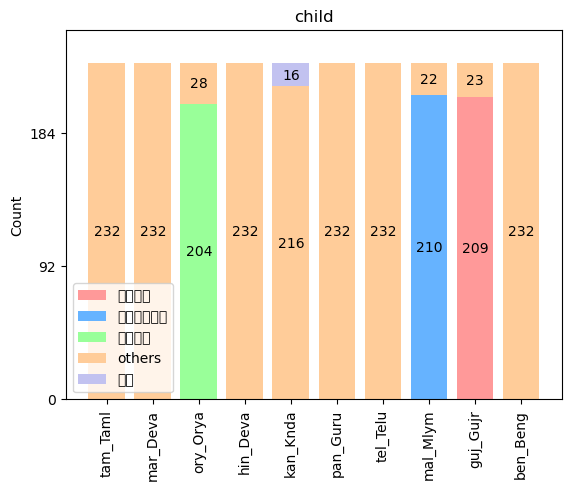

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

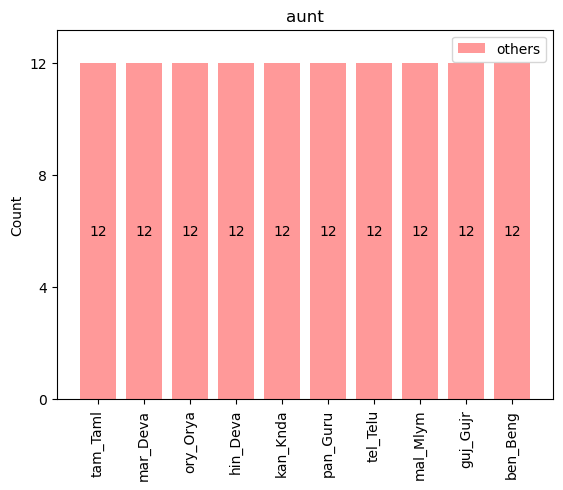

findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: 

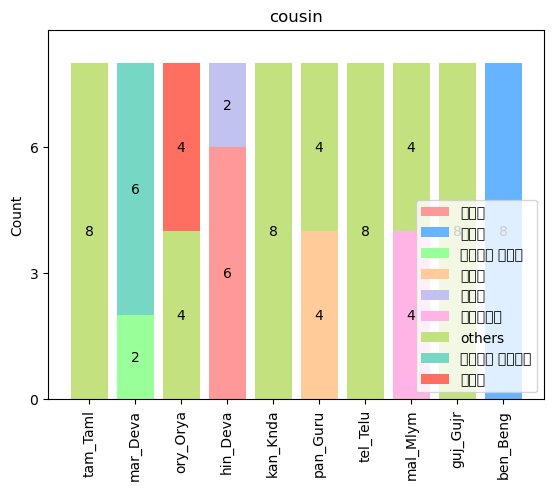

In [286]:
# Function to create stacked bar graph
def create_stacked_bar_graph(data, title):
    languages = list(data.keys())
    categories = set()
    
    # Collect all categories
    for lang in languages:
        categories.update(data[lang].keys())
    
    categories = list(categories)
    
    # Prepare data for plotting
    values = {category: [] for category in categories}
    
    for lang in languages:
        for category in categories:
            values[category].append(data[lang].get(category, 0))
    
    # Plotting
    fig, ax = plt.subplots()
    
    bottom = [0] * len(languages)
    # Define custom colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76d7c4','#ff6f61','#6b5b95']
    for i, category in enumerate(categories):
        bars = ax.bar(languages, values[category], label=category, bottom=bottom, color=colors[i % len(colors)])
        bottom = [i + j for i, j in zip(bottom, values[category])]
        
        # Adding labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                            xytext=(0, 0),  # 0 points vertical offset
                            textcoords="offset points",
                            ha='center', va='center')
    
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.legend()
    # set x -ticks and y ticks
    ax.set_xticks(languages)
    ax.set_yticks(range(0, max(bottom) * 2, max(bottom) * 2 //5))
    ax.set_xticklabels(languages)
    ax.set_yticklabels(range(0, max(bottom) * 2, max(bottom) * 2 //5))
    
    # Adding gap at the top of the y-axis
    ax.set_ylim(0, max(bottom) * 1.1)
    
    plt.xticks(rotation=90)

     
    # Use the Noto Sans font
    # prop = fm.FontProperties(fname=noto_sans)
    # for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #     label.set_fontproperties(prop)

        

    # save the figure as png
    plt.savefig(f'testset_{title}.png')
    plt.show()
    
    # # Use a font that supports the required characters
    # plt.rcParams['font.family'] = 'Noto Sans'
    
    # plt.show()


# Create stacked bar graphs for each level 1 word
for key in len_dict_resultant.keys():
    create_stacked_bar_graph(len_dict_resultant[key], key)

# Conclusion


if no dataset thn no reln_csv in translated